In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:\\Users\\ASUS\\Desktop\\MY PROJECT\\TS_SALES\\train.csv")
store = pd.read_csv("C:\\Users\\ASUS\\Desktop\\MY PROJECT\\TS_SALES\\stores.csv")
# store was previously called data1
holiday = pd.read_csv("C:\\Users\\ASUS\\Desktop\\MY PROJECT\\TS_SALES\\holidays_events.csv")
oil = pd.read_csv("C:\\Users\\ASUS\\Desktop\\MY PROJECT\\TS_SALES\\oil.csv")
transactions = pd.read_csv("C:\\Users\\ASUS\\Desktop\\MY PROJECT\\TS_SALES\\transactions.csv")

## Exploratory Data Analysis

In [3]:
data.head()

id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0

In [4]:
data.shape

(3000888, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [6]:
data.describe()

id     store_nbr         sales   onpromotion
count  3.000888e+06  3.000888e+06  3.000888e+06  3.000888e+06
mean   1.500444e+06  2.750000e+01  3.577757e+02  2.602770e+00
std    8.662819e+05  1.558579e+01  1.101998e+03  1.221888e+01
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00
25%    7.502218e+05  1.400000e+01  0.000000e+00  0.000000e+00
50%    1.500444e+06  2.750000e+01  1.100000e+01  0.000000e+00
75%    2.250665e+06  4.100000e+01  1.958473e+02  0.000000e+00
max    3.000887e+06  5.400000e+01  1.247170e+05  7.410000e+02

In [7]:
data['onpromotion'].value_counts()

0      2389559
1       174551
2        79386
3        45862
4        31659
        ...   
313          1
452          1
642          1
305          1
425          1
Name: onpromotion, Length: 362, dtype: int64

In [8]:
# MISSING VALUES
data.isna().sum()

## Key takeaway ##
# 1. No missing value

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [9]:
print(data['date'].unique())
print(data['date'].nunique())
print(data.shape[0]/data['date'].nunique())

## Key takeaway ##
## Key takeaway ##
# 1. No missing value
# 1. there are 1684 unique dates
# 2. each date is repeated 1782 times 

['2013-01-01' '2013-01-02' '2013-01-03' ... '2017-08-13' '2017-08-14'
 '2017-08-15']
1684
1782.0


In [10]:
len(data['family'].unique())

33

In [11]:
print(data.head(50))

    id        date  store_nbr                      family  sales  onpromotion
0    0  2013-01-01          1                  AUTOMOTIVE    0.0            0
1    1  2013-01-01          1                   BABY CARE    0.0            0
2    2  2013-01-01          1                      BEAUTY    0.0            0
3    3  2013-01-01          1                   BEVERAGES    0.0            0
4    4  2013-01-01          1                       BOOKS    0.0            0
5    5  2013-01-01          1                BREAD/BAKERY    0.0            0
6    6  2013-01-01          1                 CELEBRATION    0.0            0
7    7  2013-01-01          1                    CLEANING    0.0            0
8    8  2013-01-01          1                       DAIRY    0.0            0
9    9  2013-01-01          1                        DELI    0.0            0
10  10  2013-01-01          1                        EGGS    0.0            0
11  11  2013-01-01          1                FROZEN FOODS    0.0

In [12]:
print(data['store_nbr'].unique())
print(data['store_nbr'].nunique())

print(data['store_nbr'].value_counts())
# number of unique dates
55572/33


## Key takeaway ##
# 1. No missing value
# 1. there are 1684 unique dates
# 2. each date is repeated 1782 times 
# 1. there are 54 stores with each store having 55572 entries
# 2. for each date we have data of all 33 family items 

[ 1 10 11 12 13 14 15 16 17 18 19  2 20 21 22 23 24 25 26 27 28 29  3 30
 31 32 33 34 35 36 37 38 39  4 40 41 42 43 44 45 46 47 48 49  5 50 51 52
 53 54  6  7  8  9]
54
1     55572
46    55572
36    55572
37    55572
38    55572
39    55572
4     55572
40    55572
41    55572
42    55572
43    55572
44    55572
45    55572
47    55572
10    55572
48    55572
49    55572
5     55572
50    55572
51    55572
52    55572
53    55572
54    55572
6     55572
7     55572
8     55572
35    55572
34    55572
33    55572
32    55572
11    55572
12    55572
13    55572
14    55572
15    55572
16    55572
17    55572
18    55572
19    55572
2     55572
20    55572
21    55572
22    55572
23    55572
24    55572
25    55572
26    55572
27    55572
28    55572
29    55572
3     55572
30    55572
31    55572
9     55572
Name: store_nbr, dtype: int64


1684.0

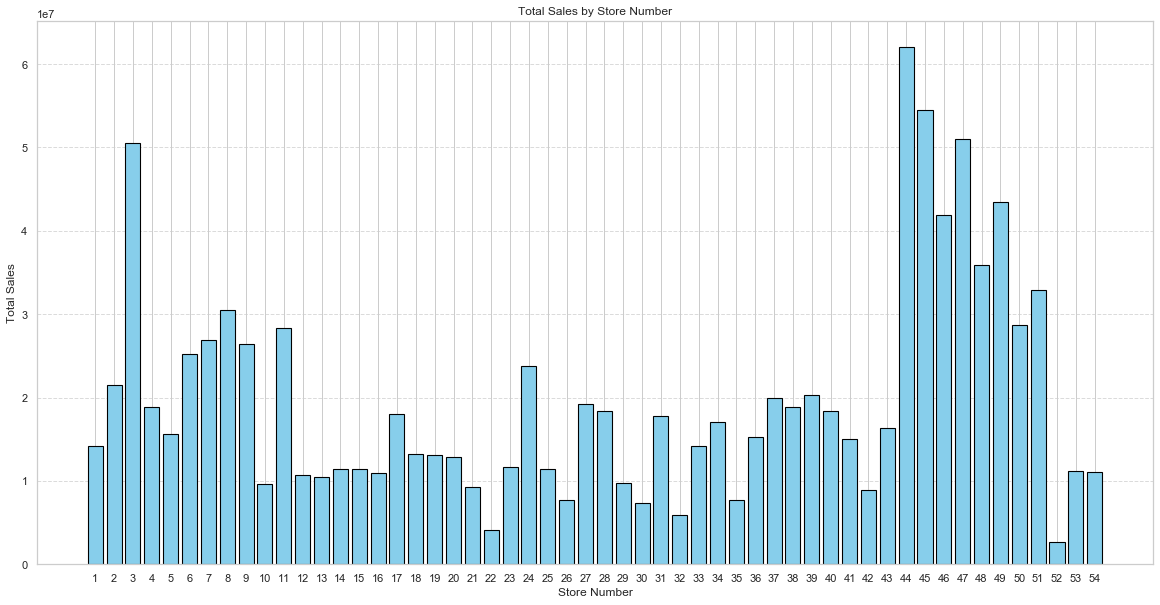

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
df = data.groupby('store_nbr').sum()
df1 = df.groupby('store_nbr')['sales'].sum()

# Reset index to get 'store_nbr' as a column again
df1 = df1.reset_index()

plt.figure(figsize=(20,10))
bars = plt.bar(df1['store_nbr'], df1['sales'], color='skyblue', edgecolor='black', linewidth=1.1)

plt.xlabel('Store Number')
plt.ylabel('Total Sales')
plt.title('Total Sales by Store Number')

# Customize x-axis ticks for better readability
plt.xticks(df1['store_nbr'])

# Adding grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding a legend if needed
# plt.legend(['Total Sales'])

plt.savefig('C:\\Users\\ASUS\\Desktop\\total_sales_by_store.png')
plt.show()

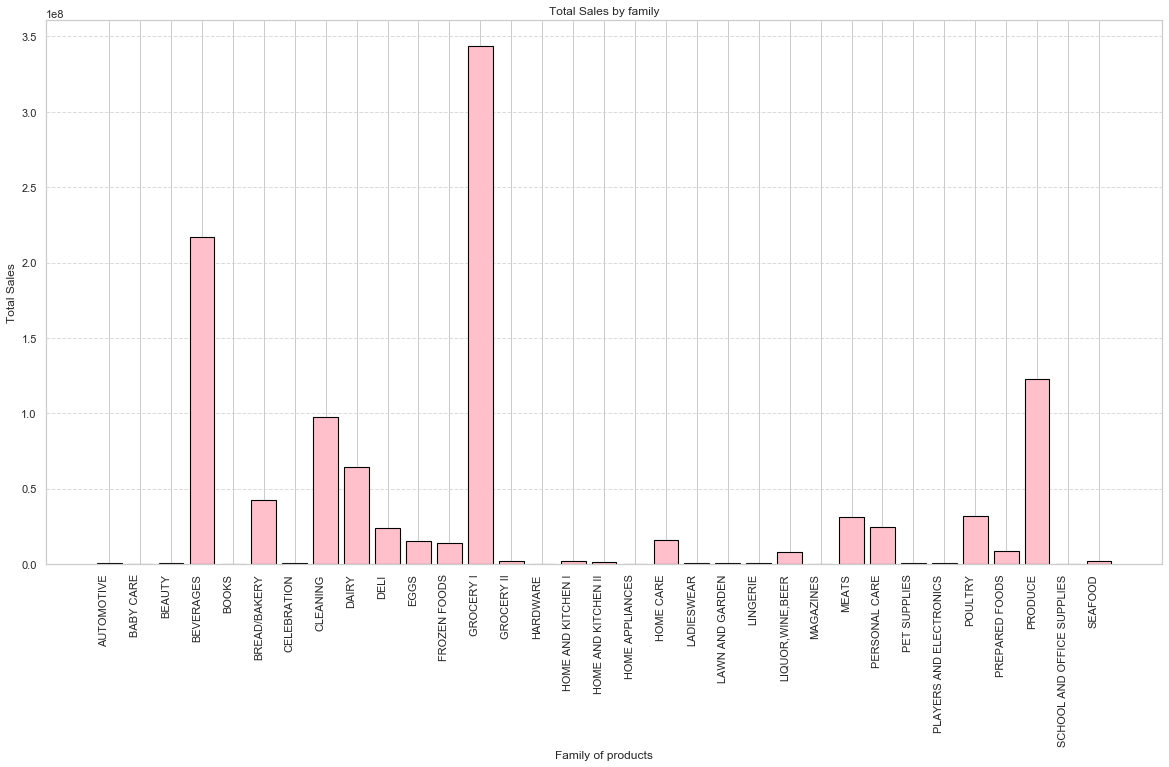

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
df = data.groupby('family').sum()
df1 = df.groupby('family')['sales'].sum()

# Reset index to get 'store_nbr' as a column again
df1 = df1.reset_index()

plt.figure(figsize=(20,10))
bars = plt.bar(df1['family'], df1['sales'], color='pink', edgecolor='black', linewidth=1.1)

plt.xlabel('Family of products')
plt.ylabel('Total Sales')
plt.title('Total Sales by family')

# Customize x-axis ticks for better readability
plt.xticks(df1['family'], rotation=90, ha='right')

# Adding grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding a legend if needed
# plt.legend(['Total Sales'])

plt.savefig('C:\\Users\\ASUS\\Desktop\\total_sales_by_category.png')
plt.show()

In [ ]:
df = data.iloc[365:730,].groupby('family').sum()


# Reset index to get 'store_nbr' as a column again
df = df.reset_index()

# Create a bar plot
plt.figure(figsize=(15, 6))  # Adjust these values as needed
plt.bar(df['family'], df['sales'])
plt.xlabel('family')
plt.ylabel('Total Sales')
plt.title('Total Sales by Store Number')
plt.xticks(df['family'],rotation = 45, ha = "right")
plt.show()

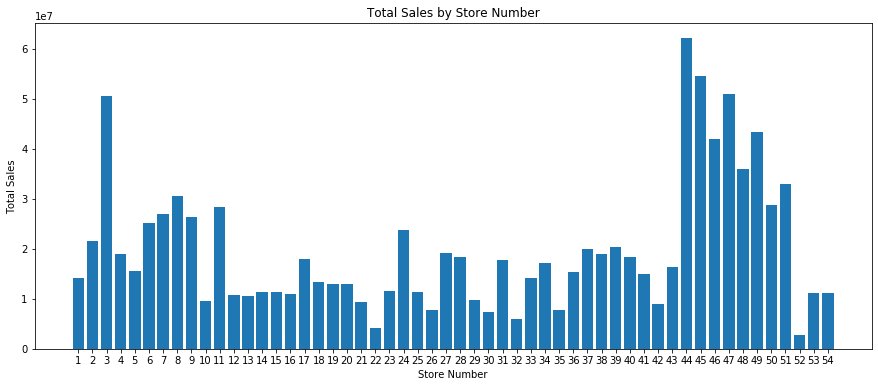

In [108]:
# top 5 stores
df = data.groupby('store_nbr').sum()
df1 = df.groupby('store_nbr')['sales'].sum()

# Reset index to get 'store_nbr' as a column again
df1 = df1.reset_index()

# Create a bar plot
plt.figure(figsize=(15, 6))  # Adjust these values as needed
plt.bar(df1['store_nbr'], df1['sales'])
plt.xlabel('Store Number')
plt.ylabel('Total Sales')
plt.title('Total Sales by Store Number')
plt.xticks(df1['store_nbr'])
plt.show()

## Key takeaway ##
# 1. No missing value
# 1. there are 1684 unique dates
# 2. each date is repeated 1782 times 
# 1. there are 54 stores with each store having 55572 entries
# 2. for each date we have data of all 33 family items 
# 1. stores between 44 to 51 are having good sales
# 2. For evaluation taking 5 stores: 3,11,24,44 and 45


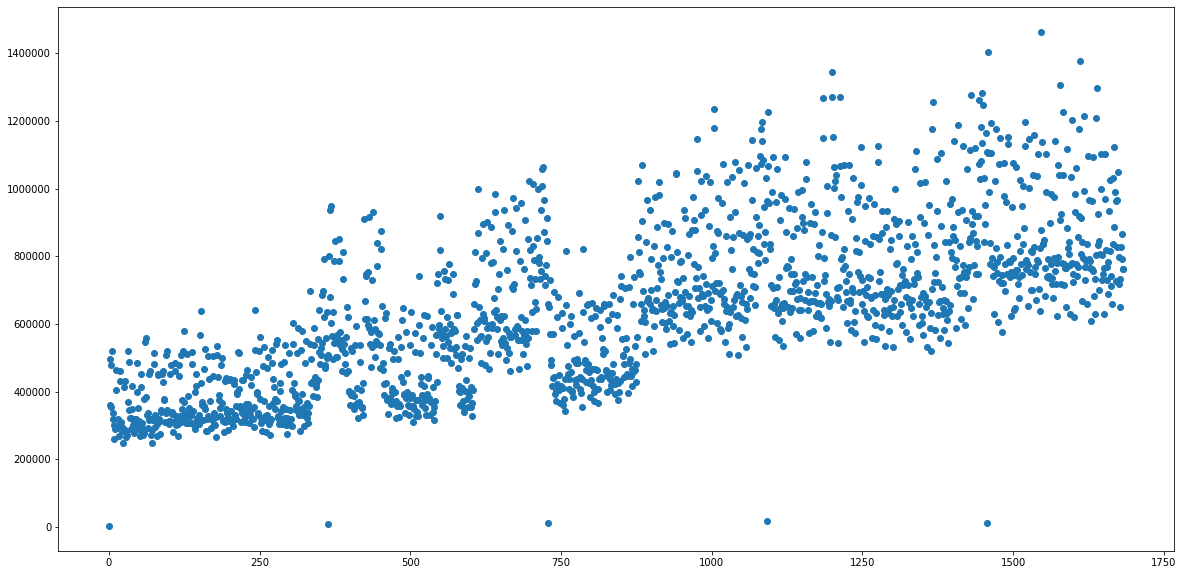

In [109]:
df1 = data.groupby('date').sum().reset_index()
plt.figure(figsize = (20,10))
plt.scatter(df1.index, df1['sales'])

In [110]:
# date
print(data['date'].nunique())
print(data['date'].value_counts())
li = list(data['date'].unique())
li = sorted(li)
li

1684
2013-01-01    1782
2016-01-15    1782
2016-02-08    1782
2016-02-07    1782
2016-02-06    1782
              ... 
2014-07-13    1782
2014-07-12    1782
2014-07-11    1782
2014-07-10    1782
2017-08-15    1782
Name: date, Length: 1684, dtype: int64


['2013-01-01',
 '2013-01-02',
 '2013-01-03',
 '2013-01-04',
 '2013-01-05',
 '2013-01-06',
 '2013-01-07',
 '2013-01-08',
 '2013-01-09',
 '2013-01-10',
 '2013-01-11',
 '2013-01-12',
 '2013-01-13',
 '2013-01-14',
 '2013-01-15',
 '2013-01-16',
 '2013-01-17',
 '2013-01-18',
 '2013-01-19',
 '2013-01-20',
 '2013-01-21',
 '2013-01-22',
 '2013-01-23',
 '2013-01-24',
 '2013-01-25',
 '2013-01-26',
 '2013-01-27',
 '2013-01-28',
 '2013-01-29',
 '2013-01-30',
 '2013-01-31',
 '2013-02-01',
 '2013-02-02',
 '2013-02-03',
 '2013-02-04',
 '2013-02-05',
 '2013-02-06',
 '2013-02-07',
 '2013-02-08',
 '2013-02-09',
 '2013-02-10',
 '2013-02-11',
 '2013-02-12',
 '2013-02-13',
 '2013-02-14',
 '2013-02-15',
 '2013-02-16',
 '2013-02-17',
 '2013-02-18',
 '2013-02-19',
 '2013-02-20',
 '2013-02-21',
 '2013-02-22',
 '2013-02-23',
 '2013-02-24',
 '2013-02-25',
 '2013-02-26',
 '2013-02-27',
 '2013-02-28',
 '2013-03-01',
 '2013-03-02',
 '2013-03-03',
 '2013-03-04',
 '2013-03-05',
 '2013-03-06',
 '2013-03-07',
 '2013-03-

In [111]:
data.head()

id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0

In [112]:
range(1,5)

range(1, 5)

In [113]:
all_category = list(data['family'].unique())
def get_data(data, store_nos, category):
    df = data[data['store_nbr'].isin(store_nos)]
    df = df[df['family'].isin(category)]
    df['date'] = pd.to_datetime(df['date']) 
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['time'] = range(len(df))
    df = df.reset_index()
    df = df.drop(columns = ['id', 'onpromotion','index'], axis = 1)
    return(df)

In [114]:
df = get_data(data = data, store_nos = [25], category = ['AUTOMOTIVE'])
df

date  store_nbr      family  sales  year  month  day  time
0    2013-01-01         25  AUTOMOTIVE    0.0  2013      1    1     0
1    2013-01-02         25  AUTOMOTIVE    0.0  2013      1    2     1
2    2013-01-03         25  AUTOMOTIVE    1.0  2013      1    3     2
3    2013-01-04         25  AUTOMOTIVE    0.0  2013      1    4     3
4    2013-01-05         25  AUTOMOTIVE    1.0  2013      1    5     4
...         ...        ...         ...    ...   ...    ...  ...   ...
1679 2017-08-11         25  AUTOMOTIVE    9.0  2017      8   11  1679
1680 2017-08-12         25  AUTOMOTIVE    2.0  2017      8   12  1680
1681 2017-08-13         25  AUTOMOTIVE    2.0  2017      8   13  1681
1682 2017-08-14         25  AUTOMOTIVE    0.0  2017      8   14  1682
1683 2017-08-15         25  AUTOMOTIVE    7.0  2017      8   15  1683

[1684 rows x 8 columns]

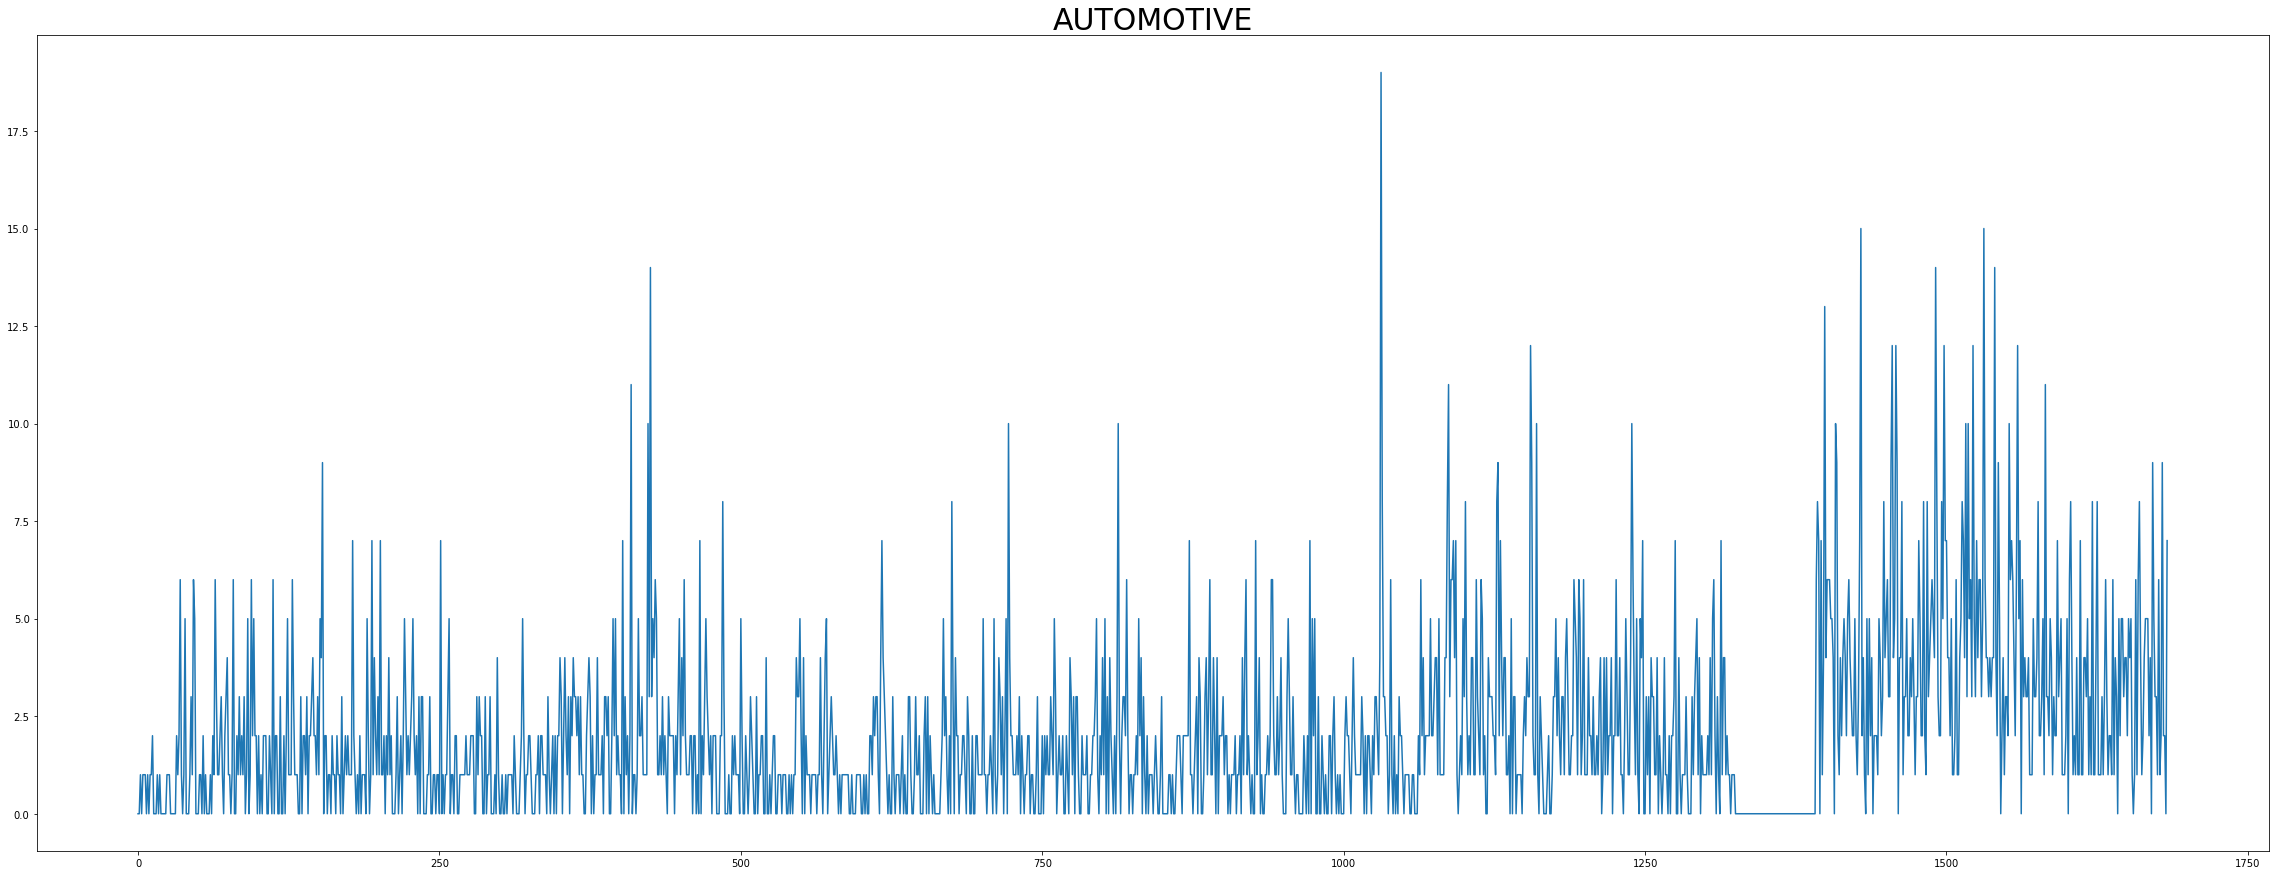

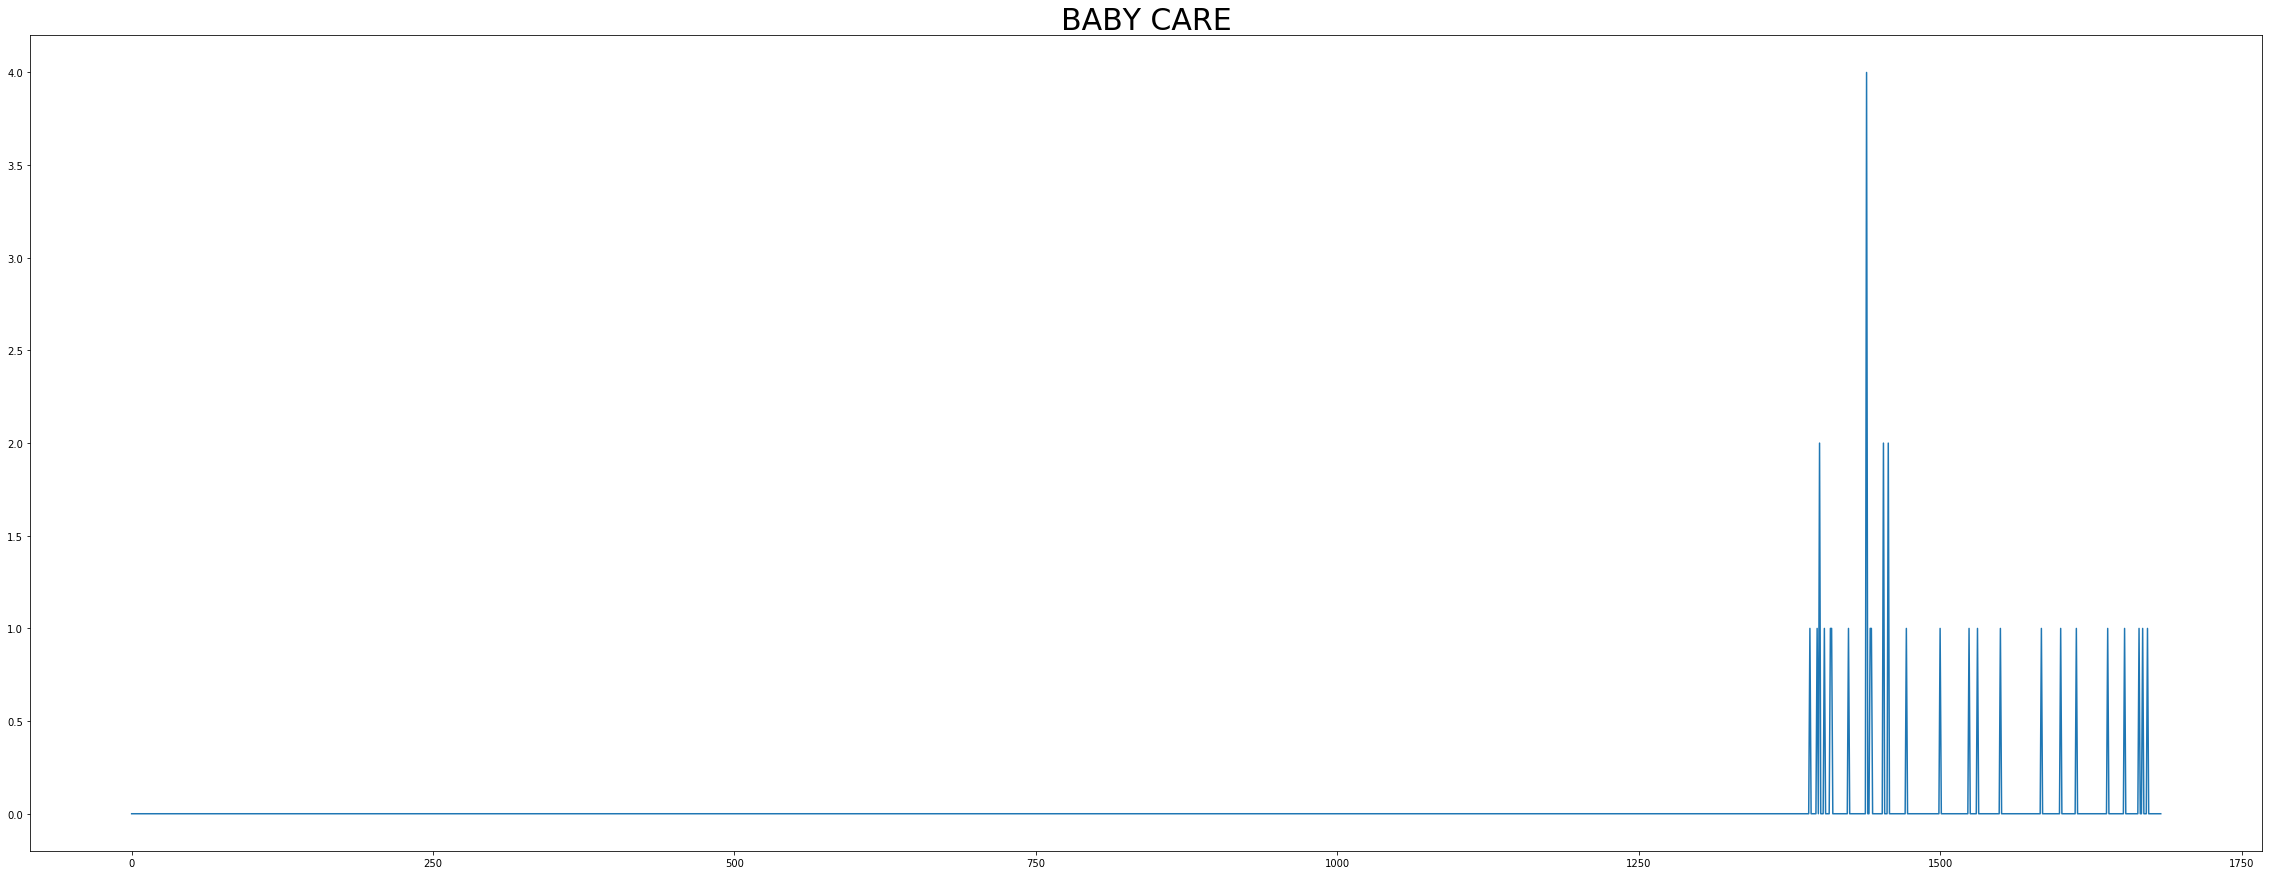

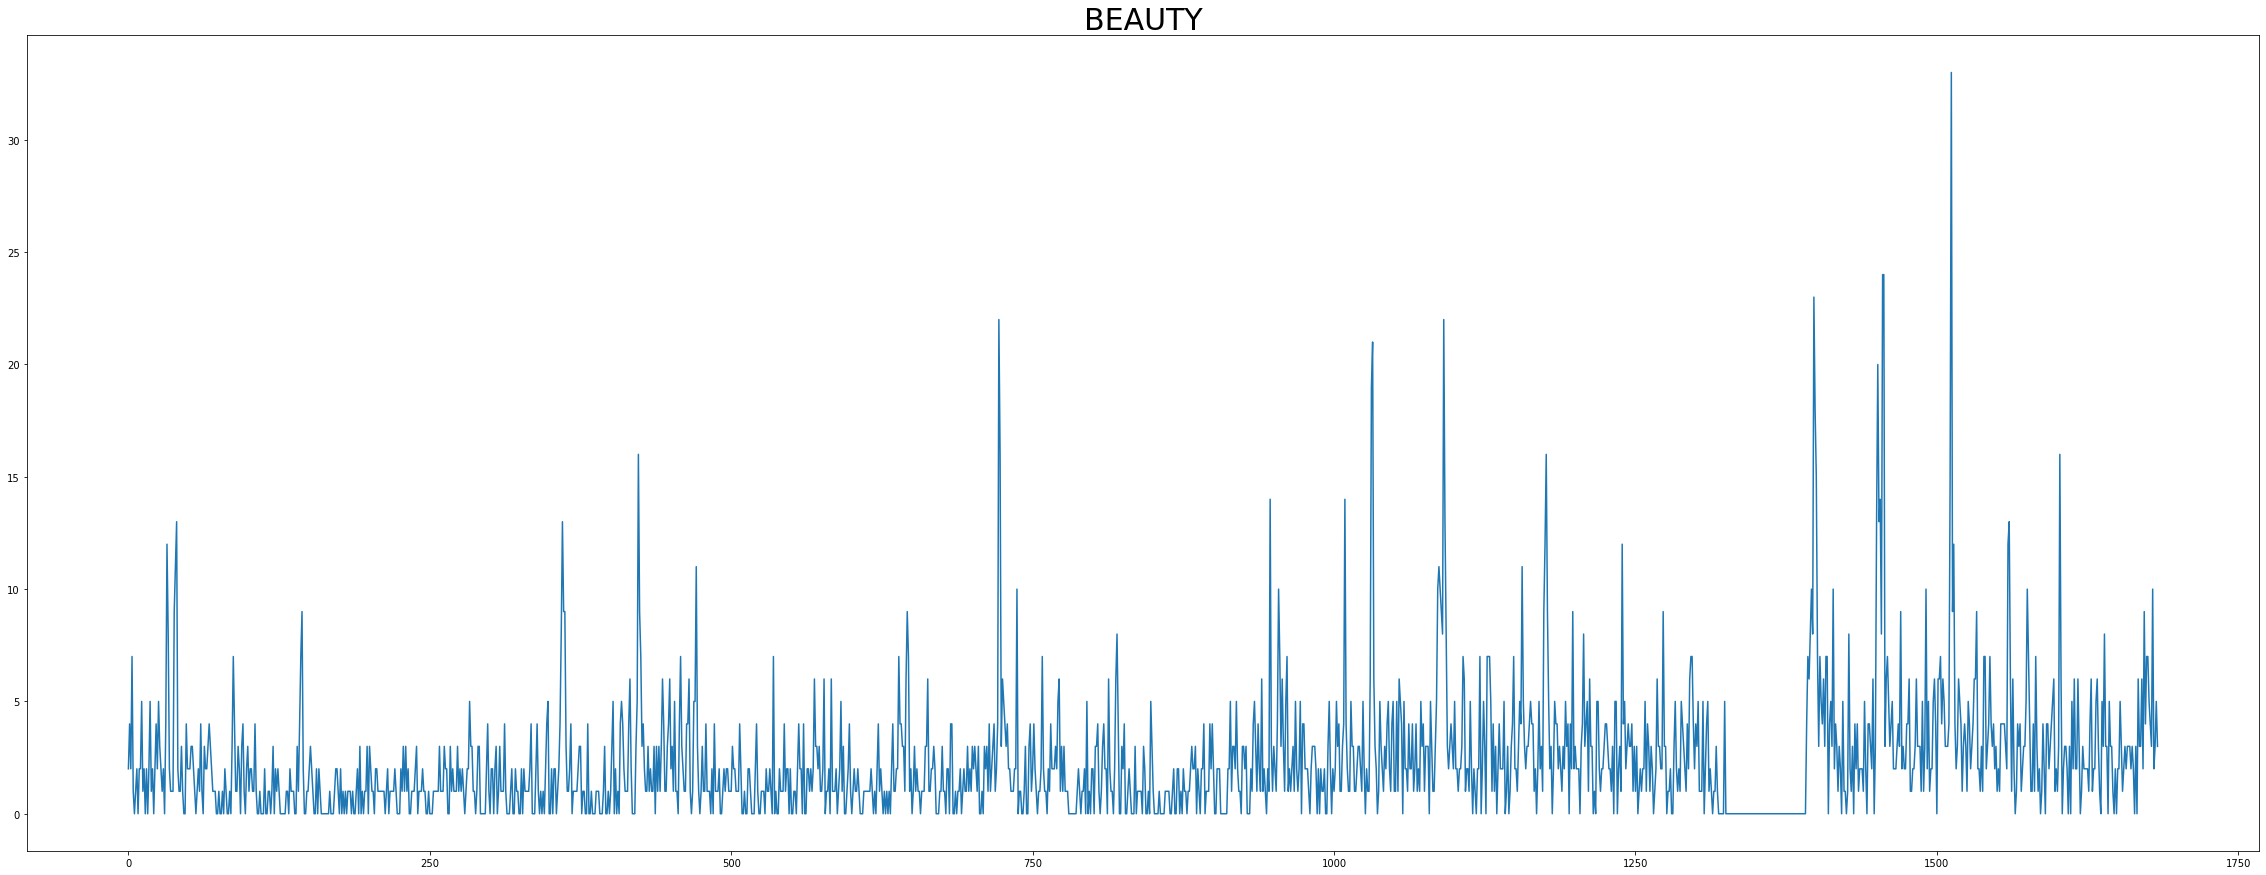

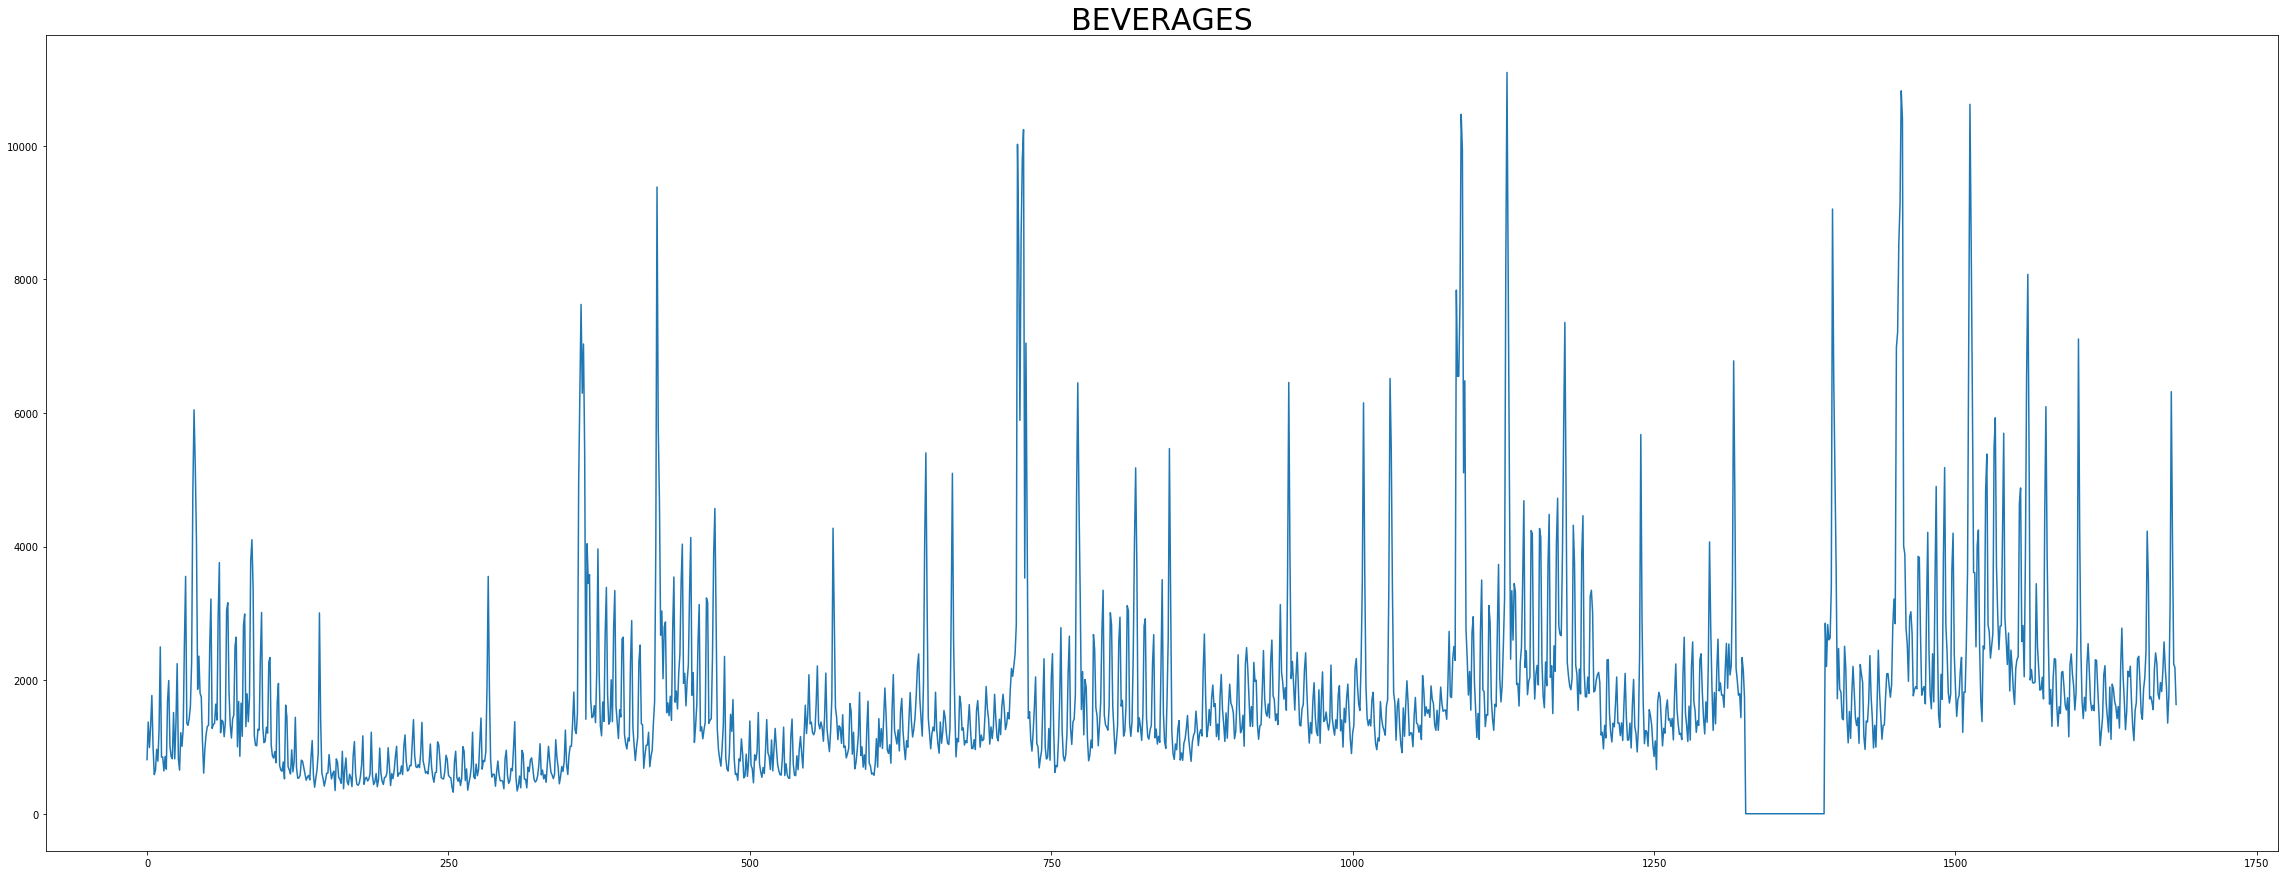

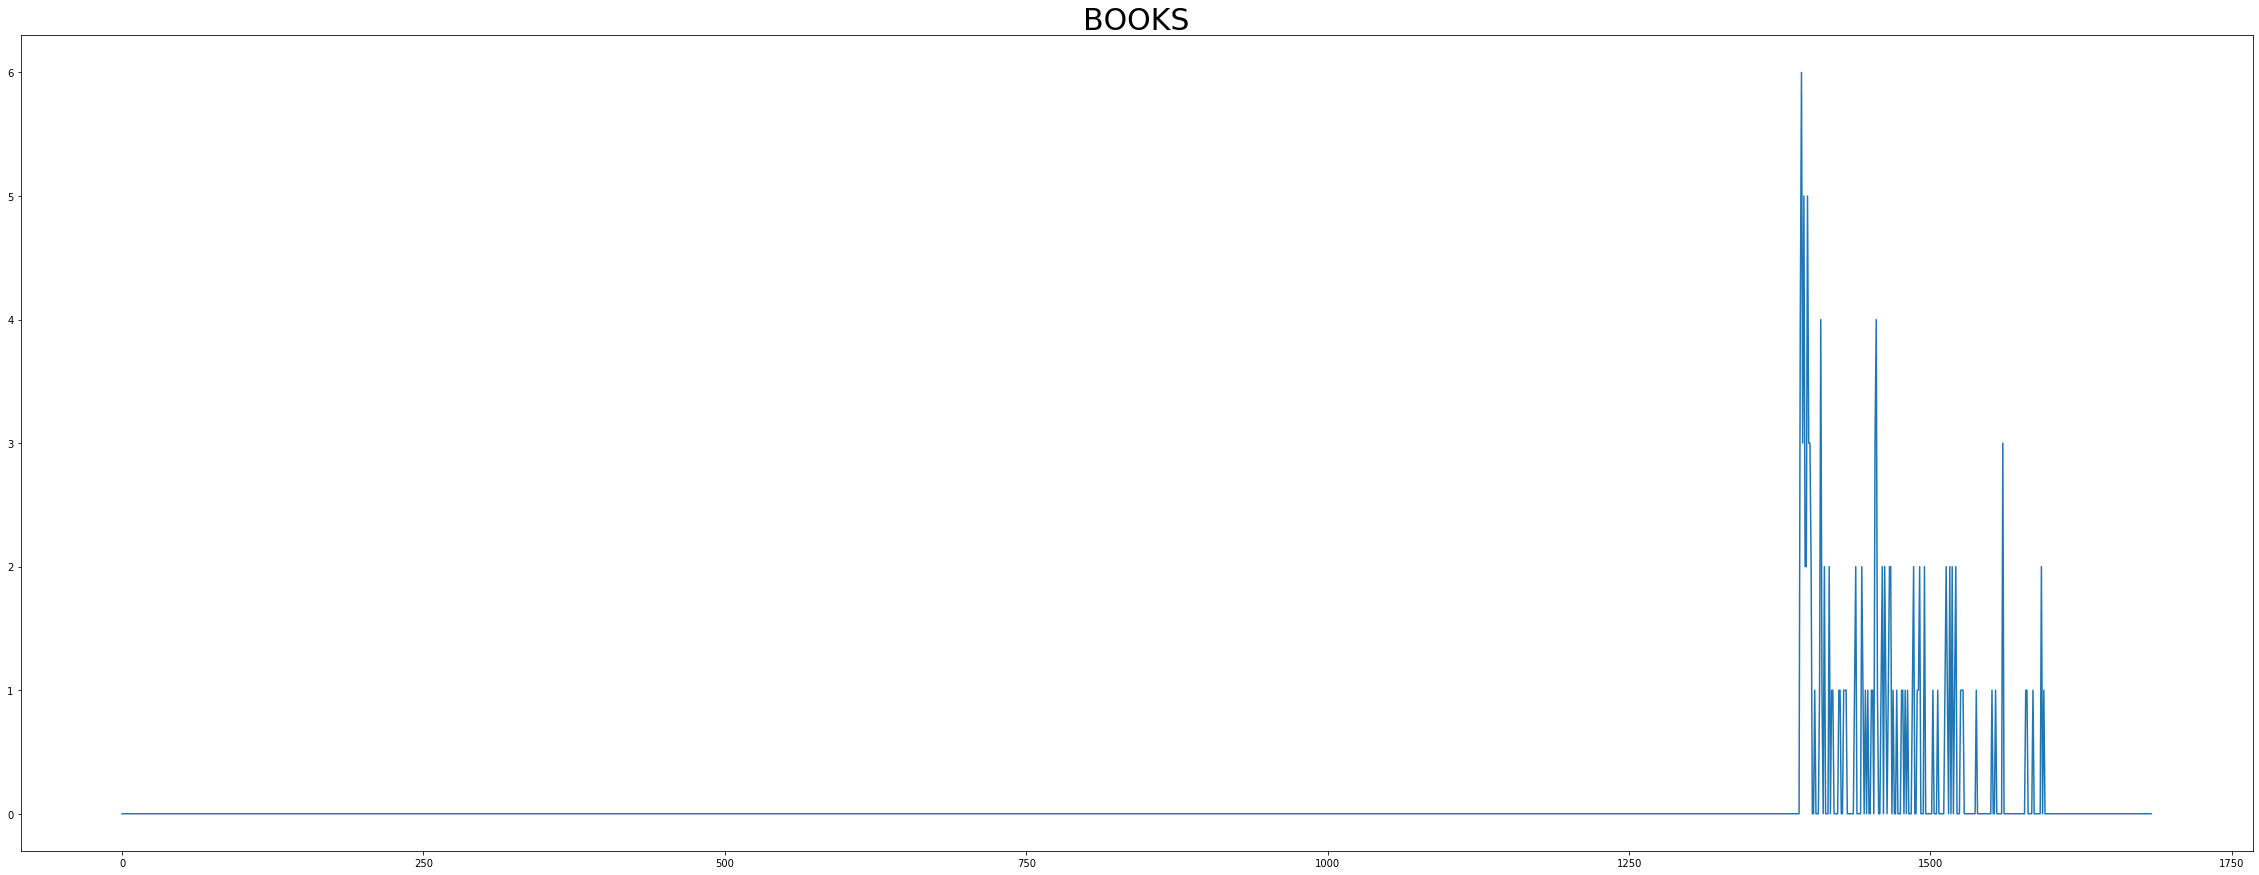

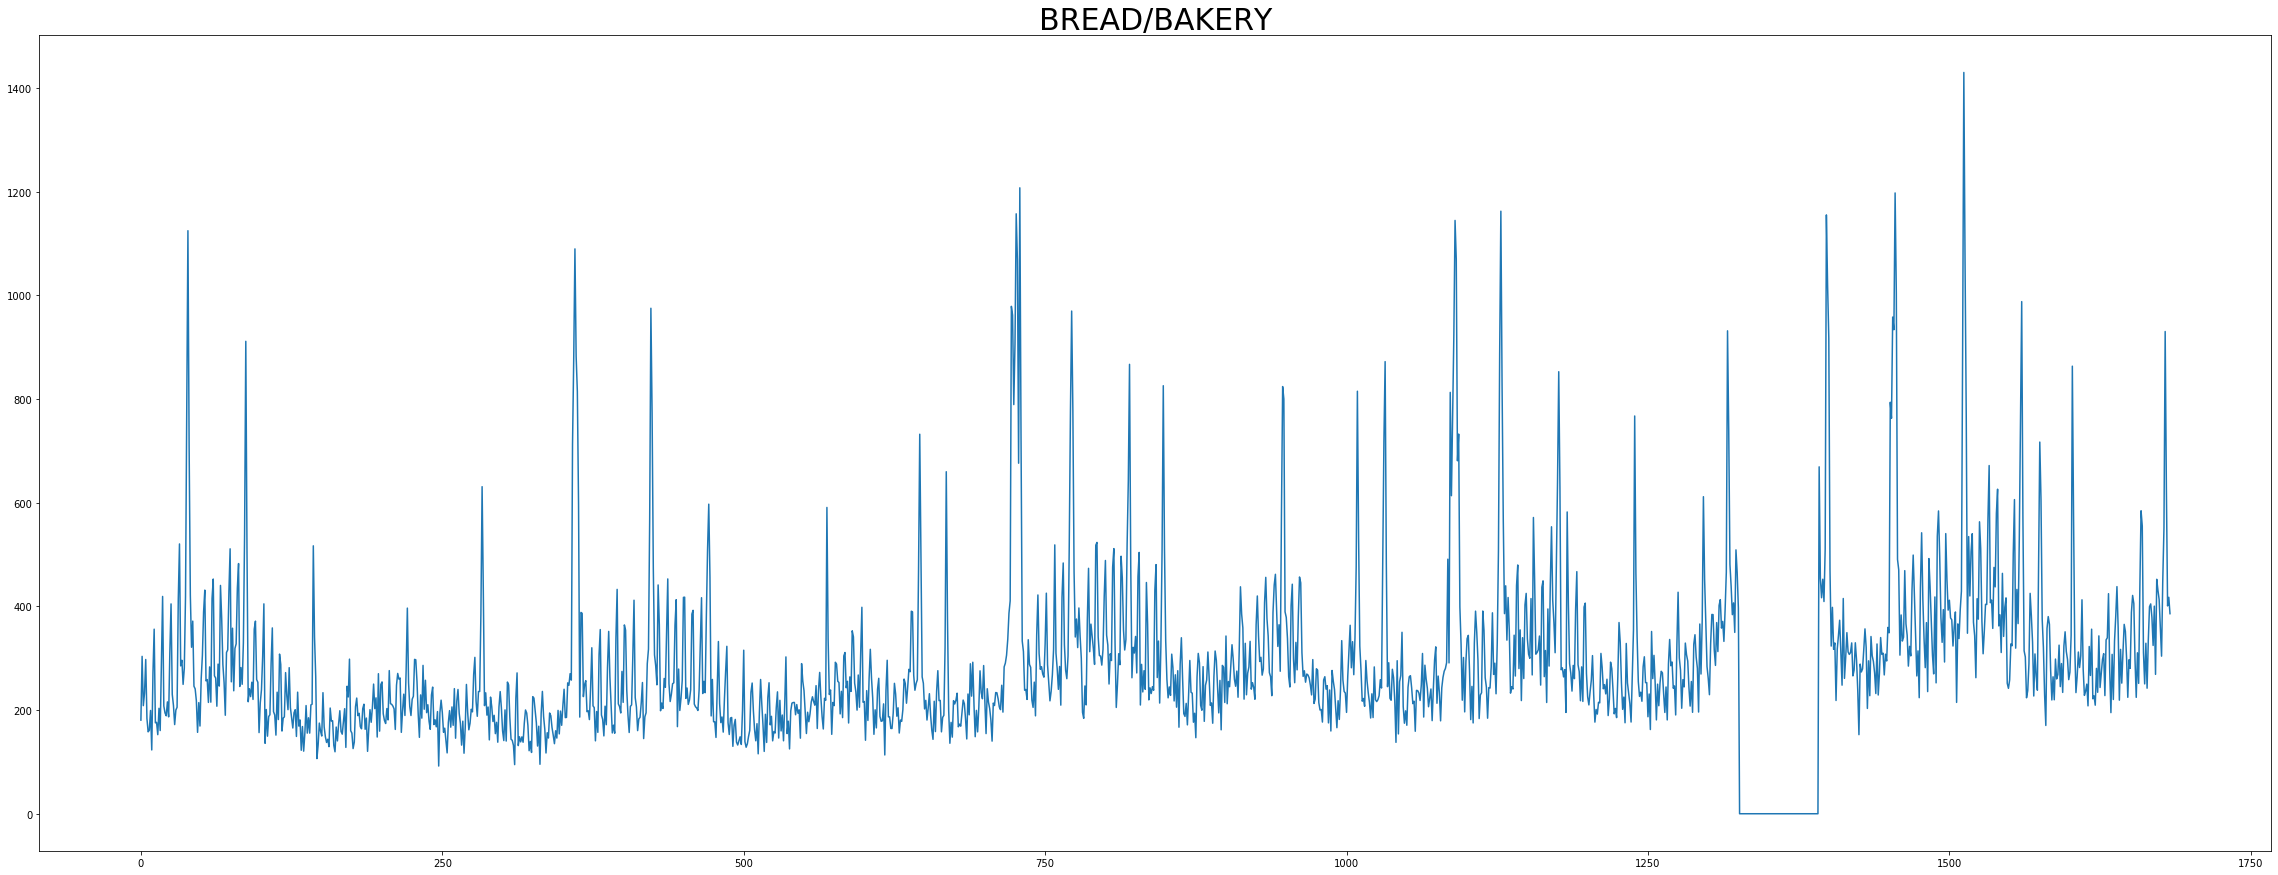

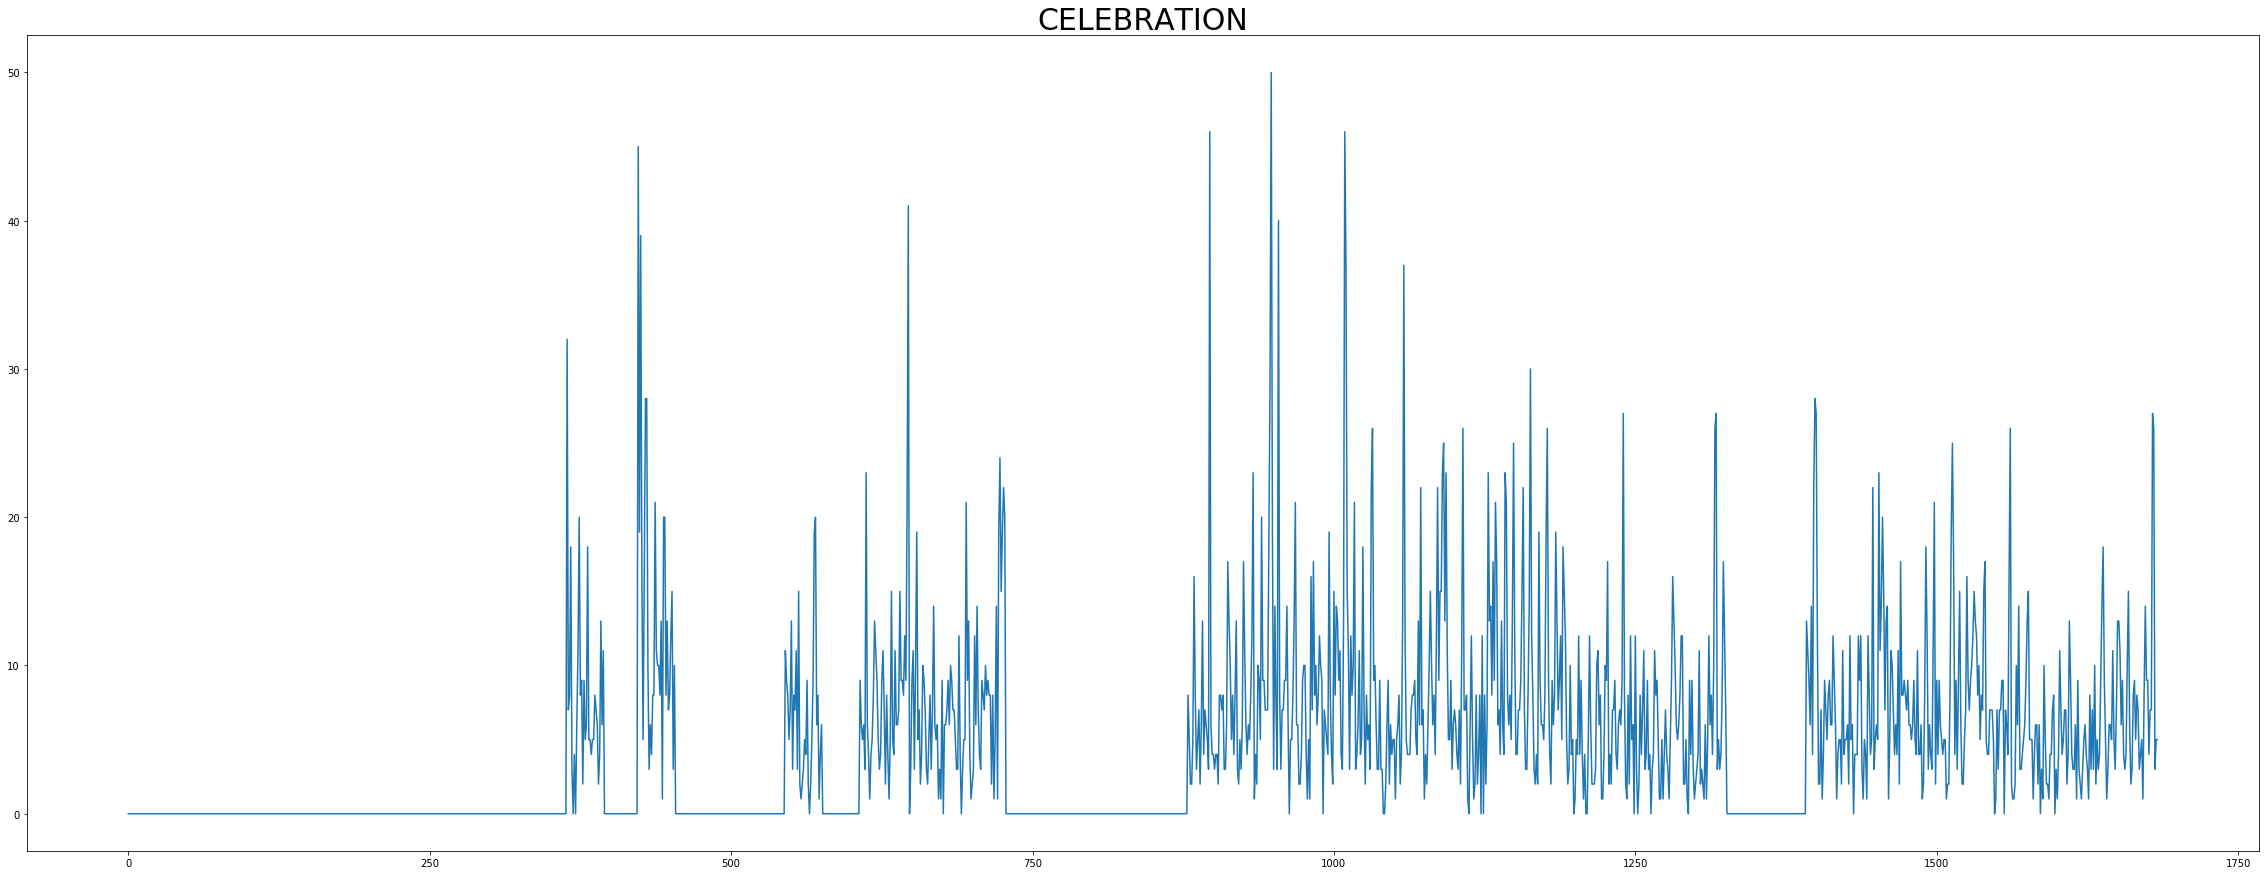

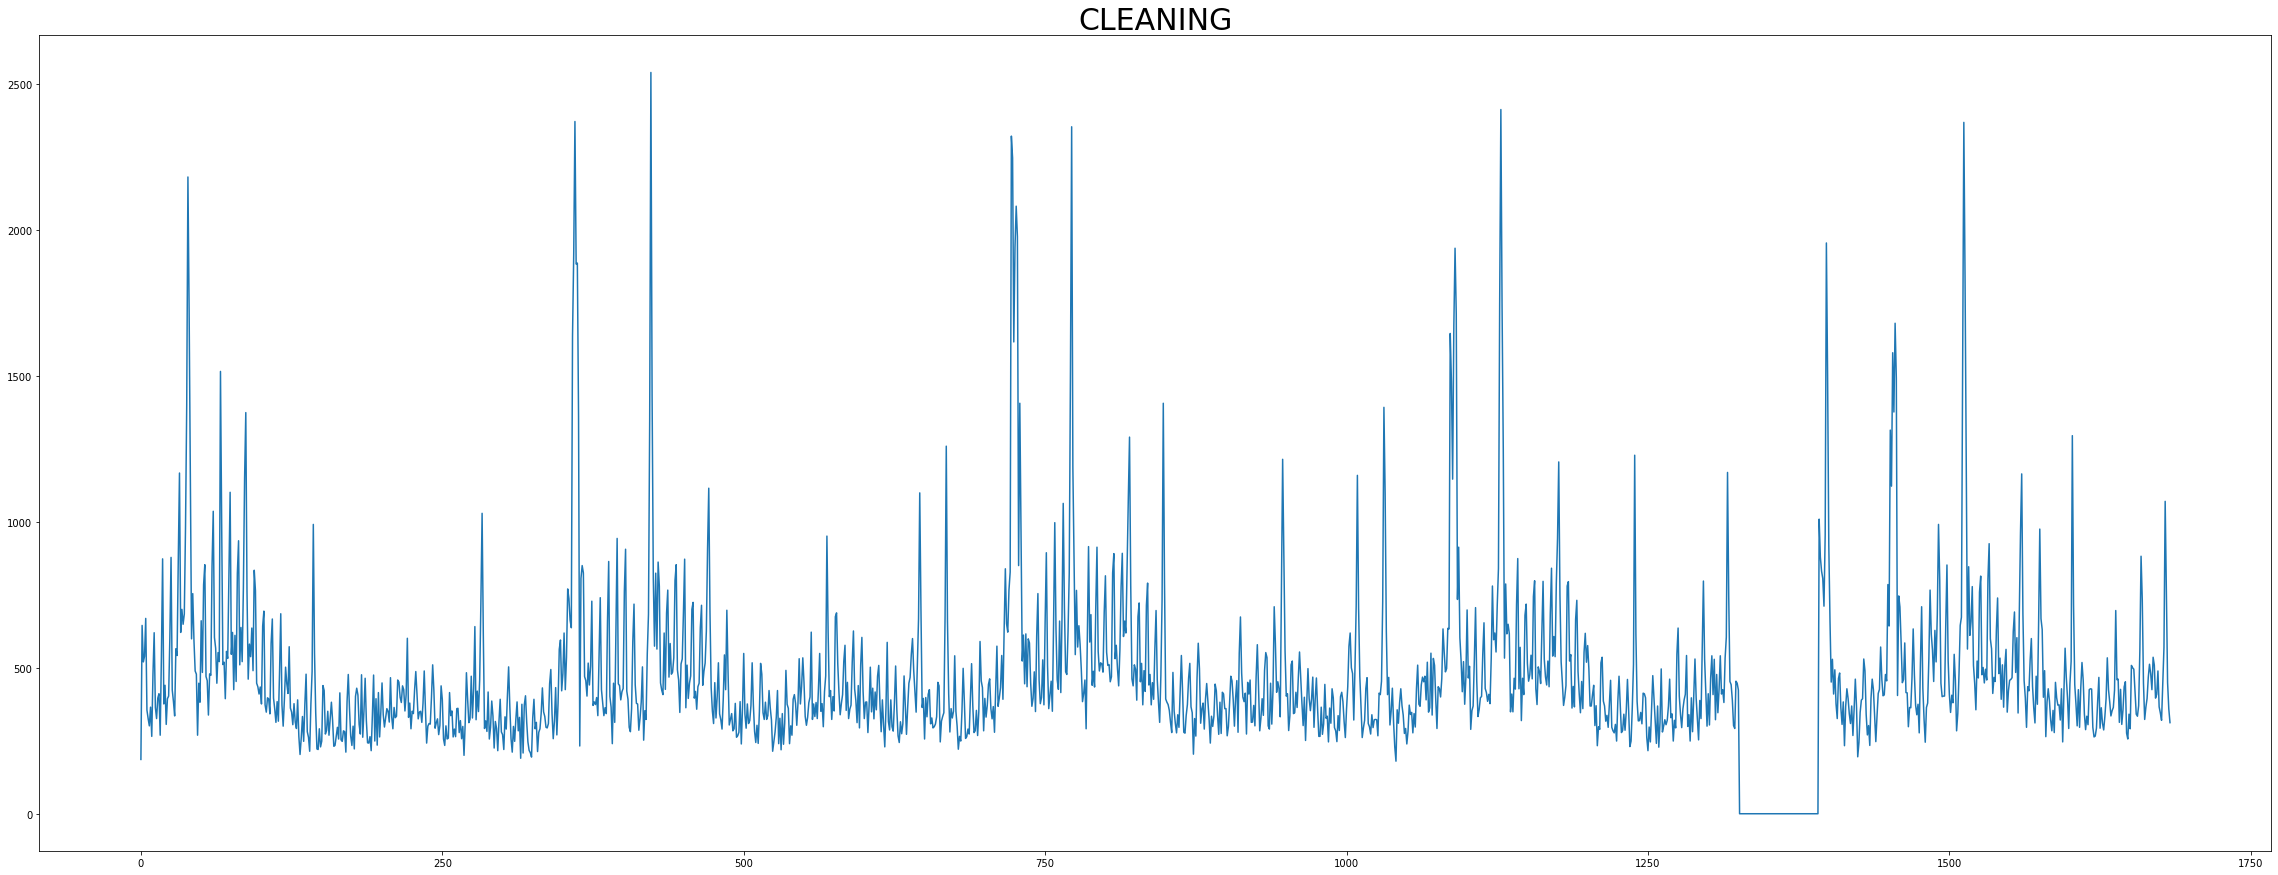

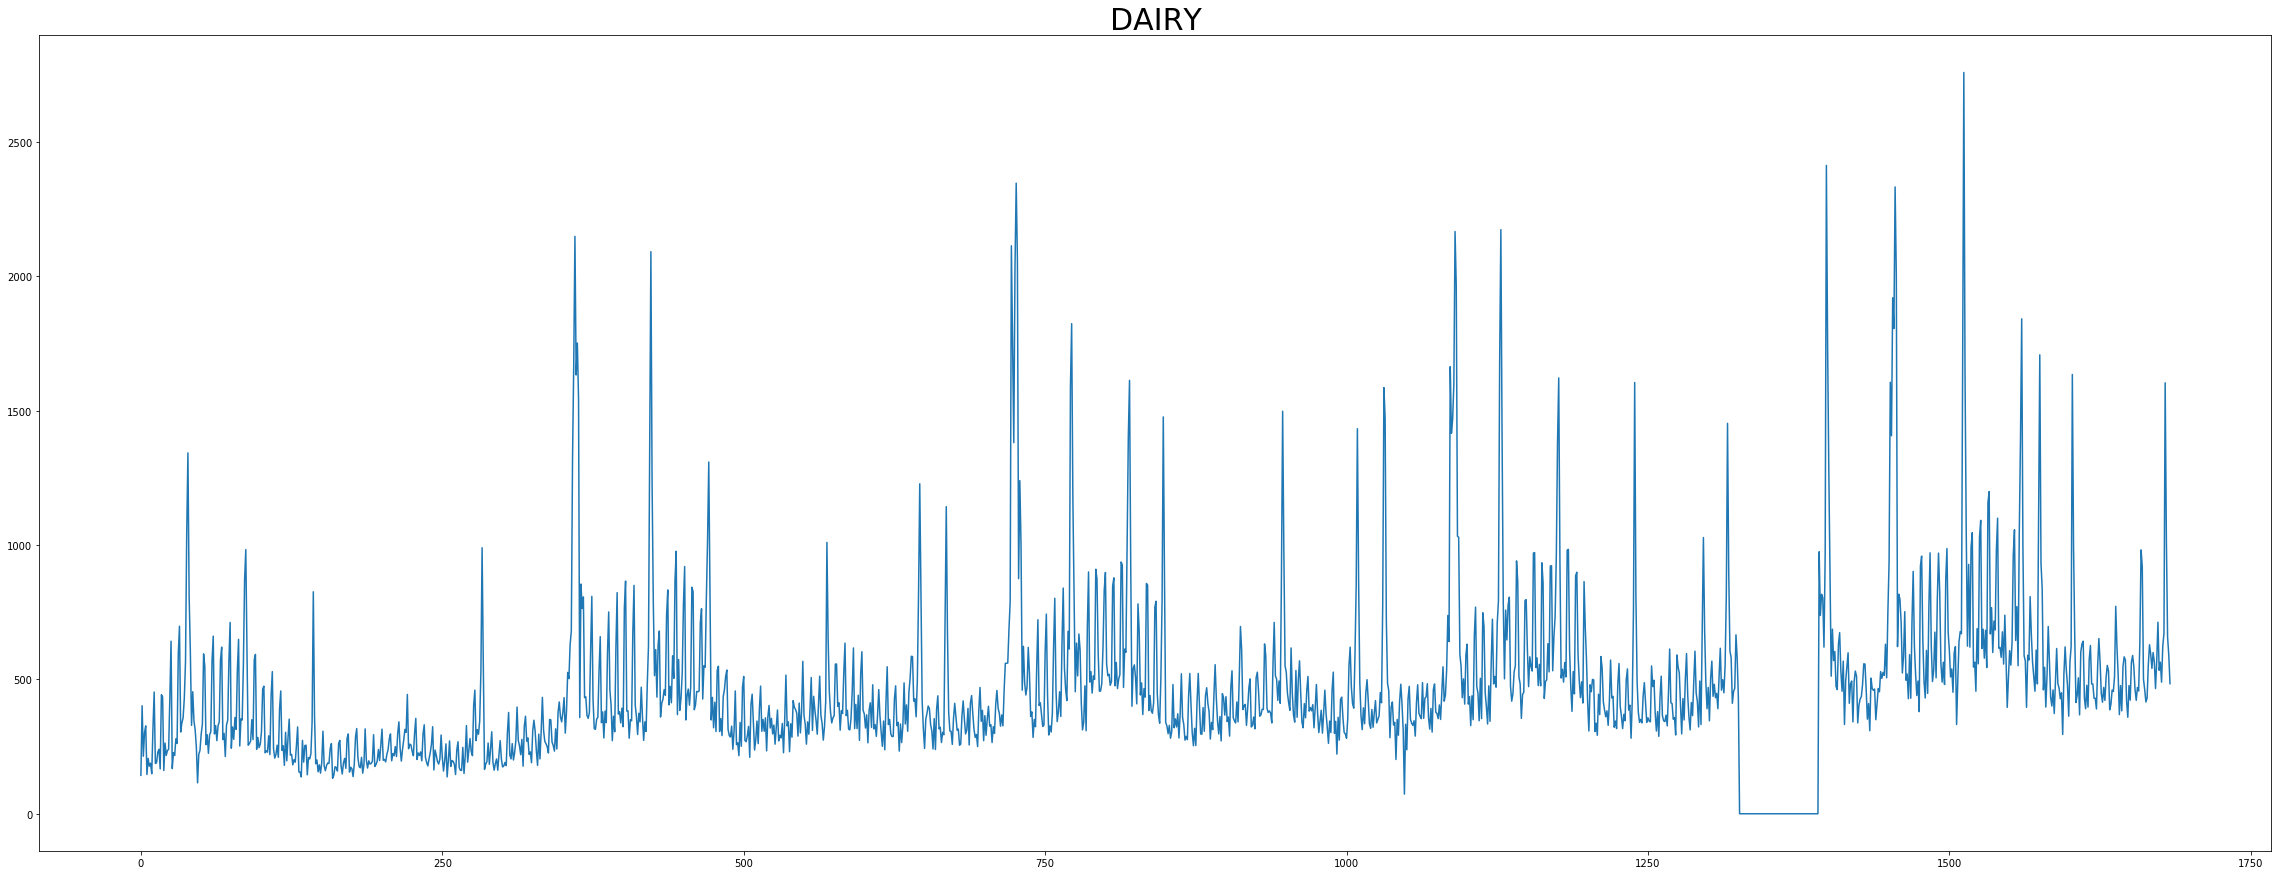

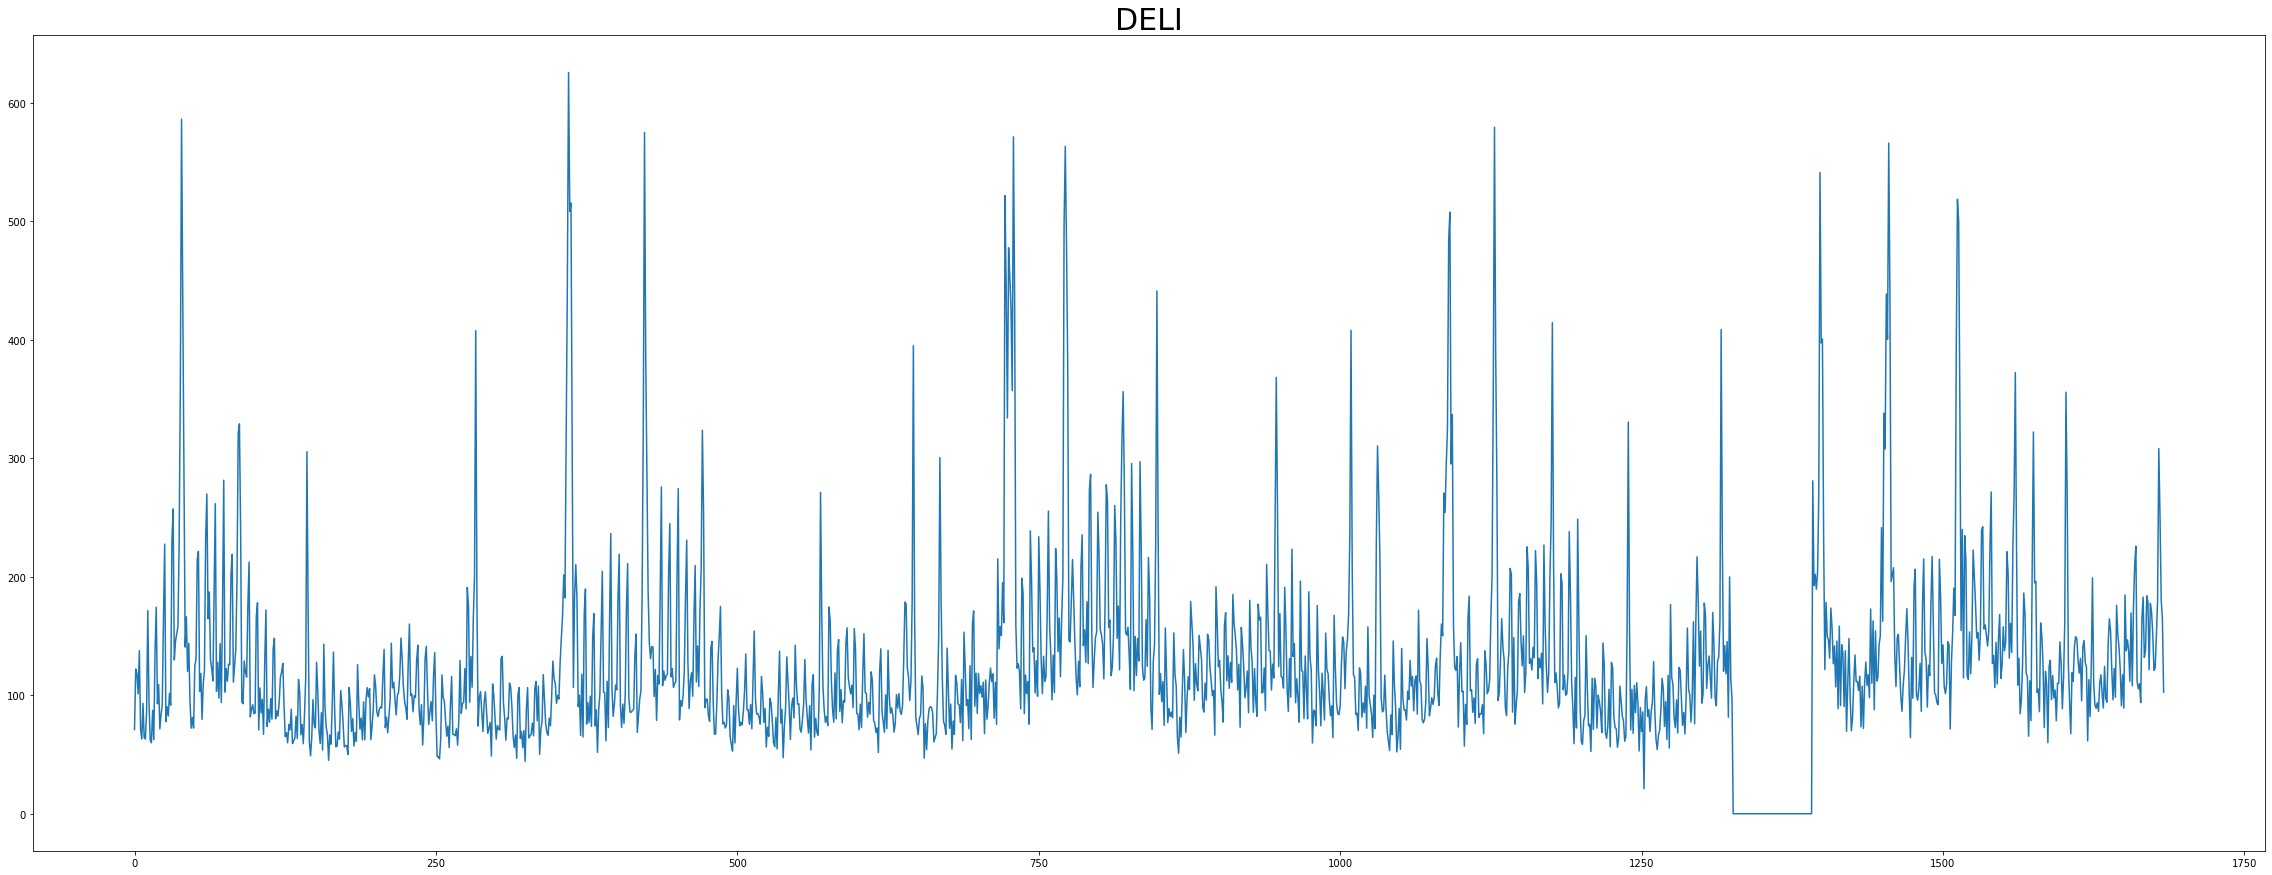

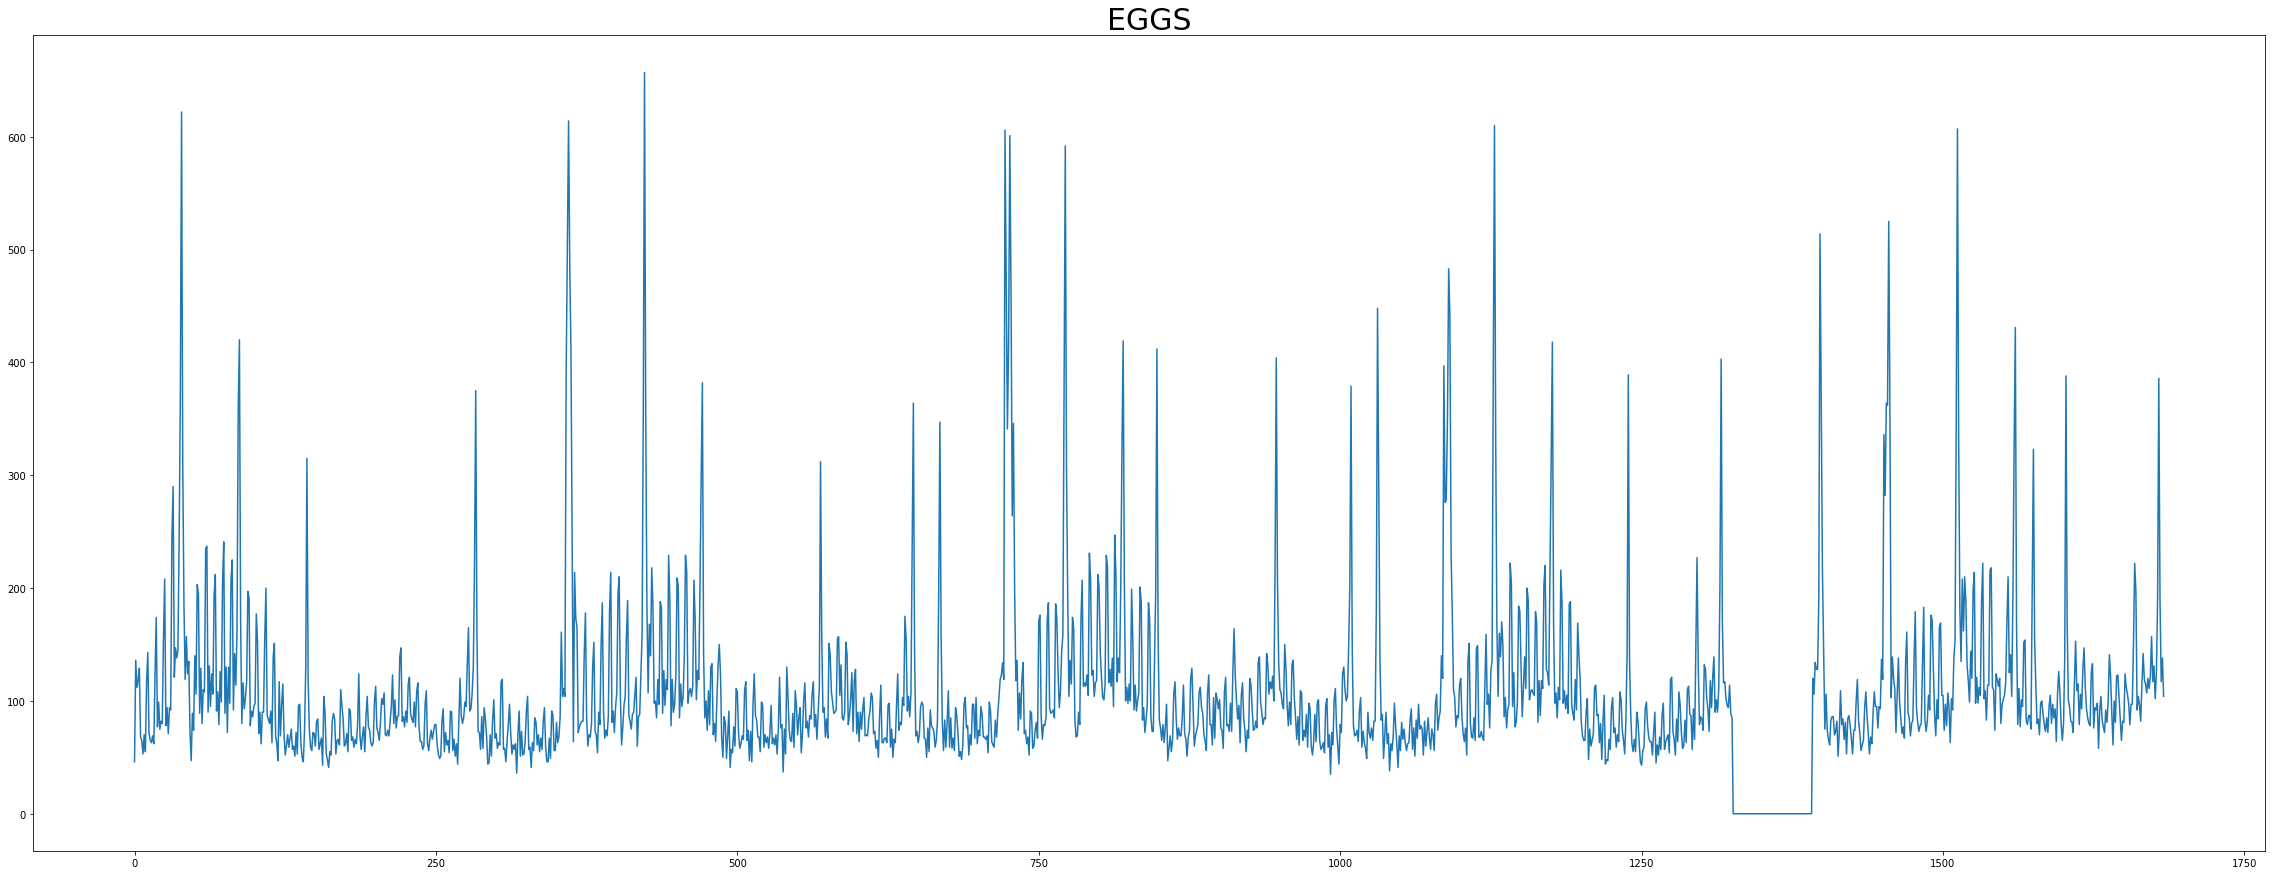

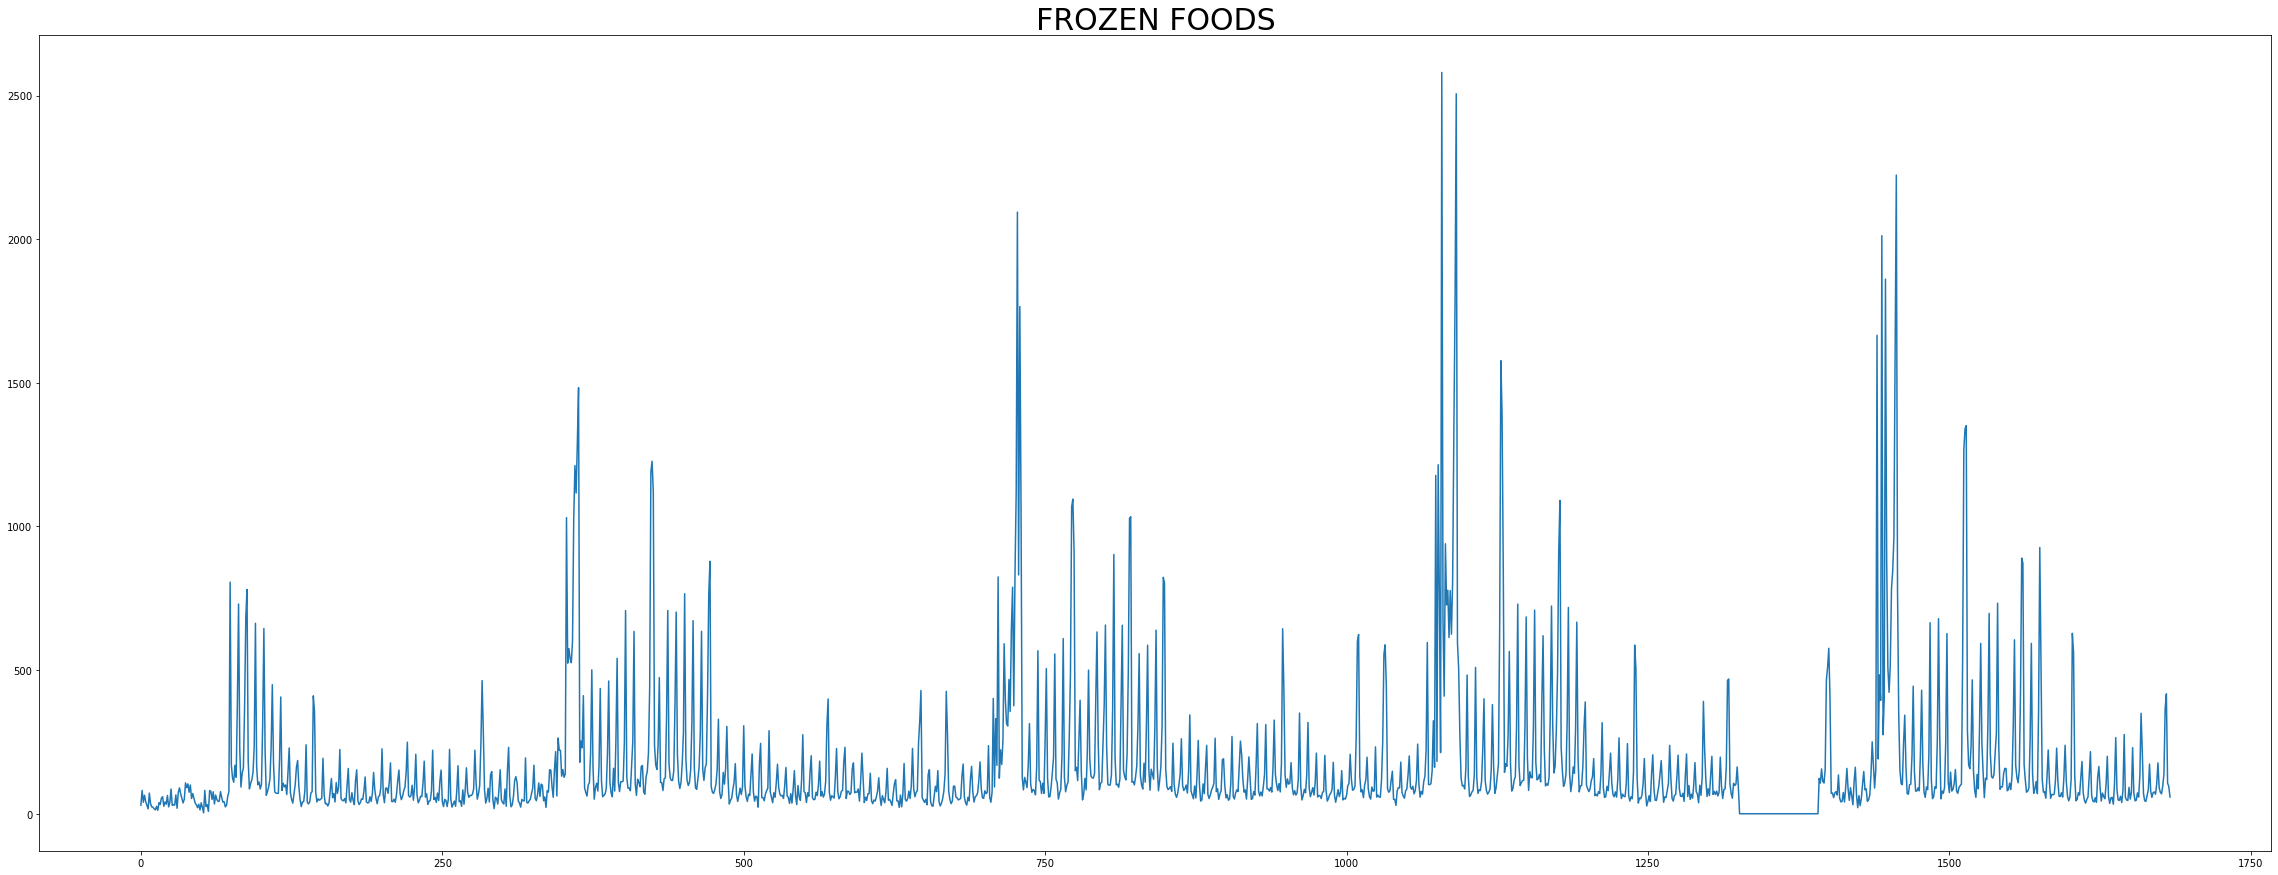

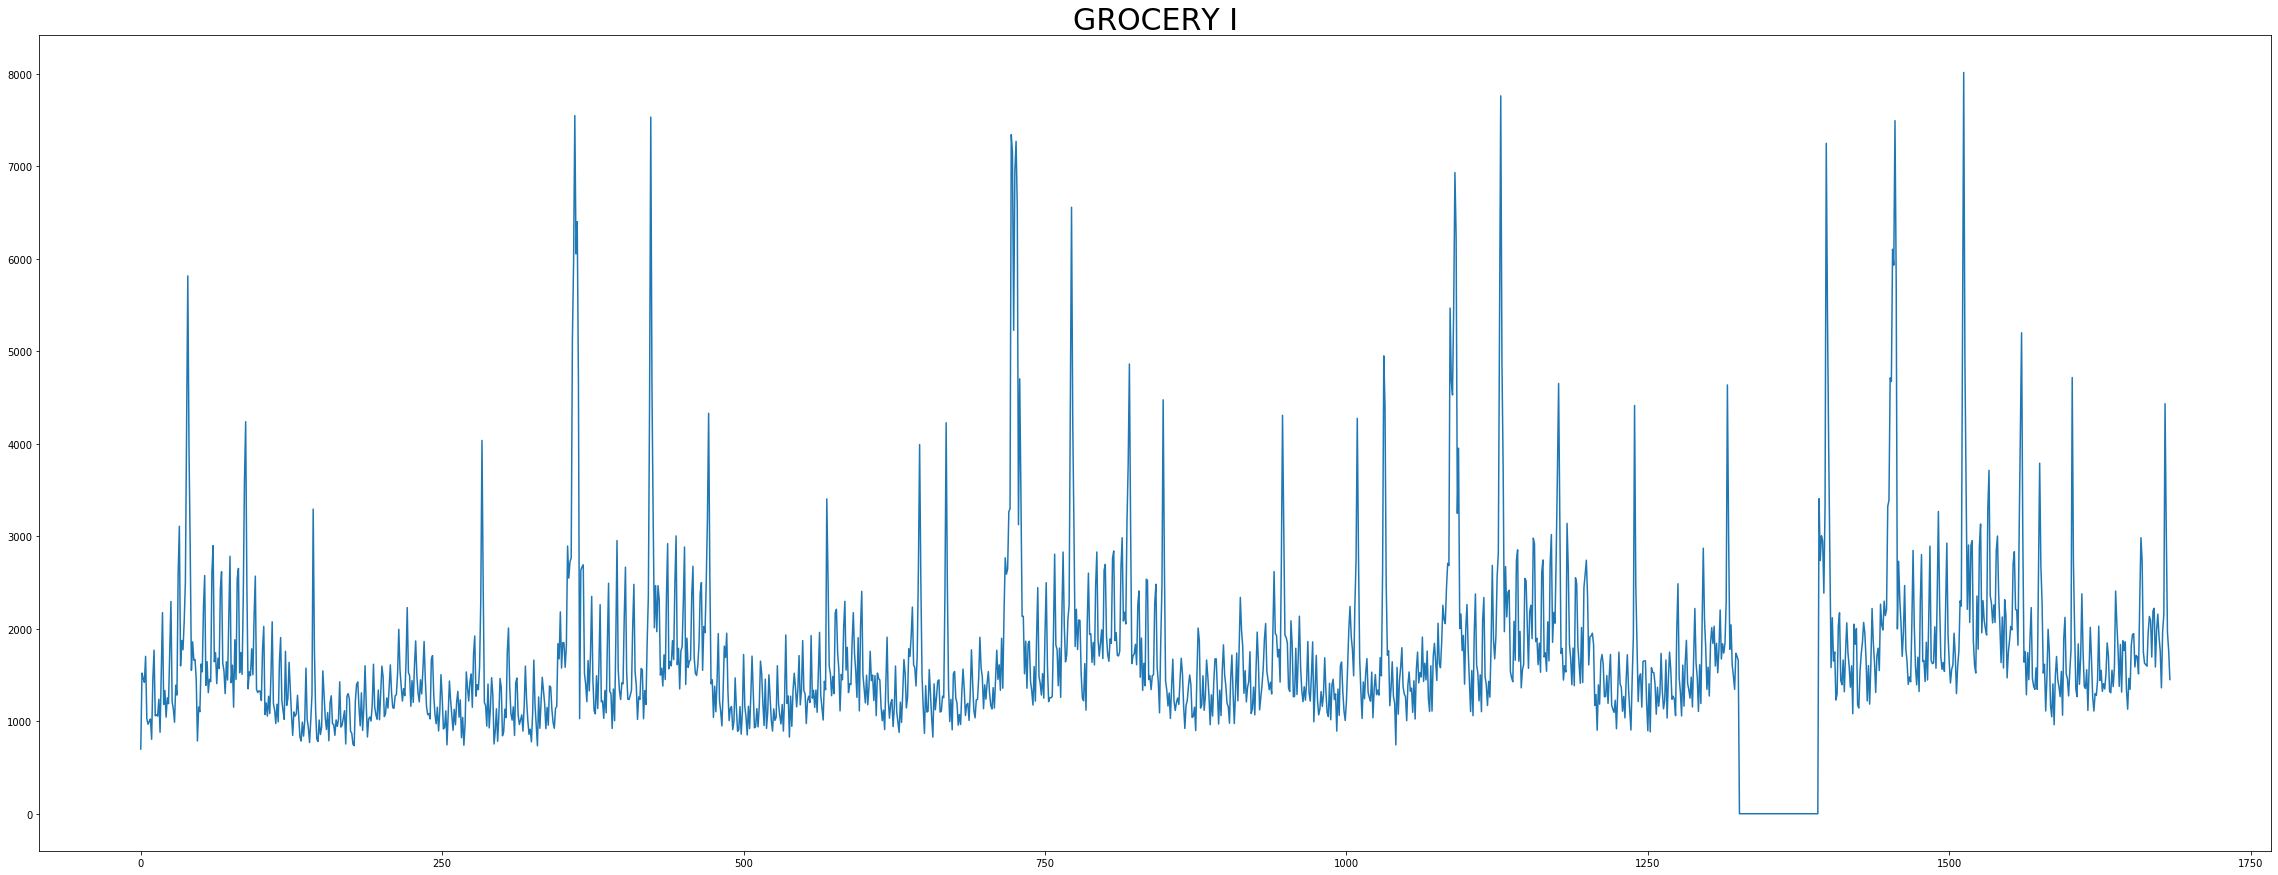

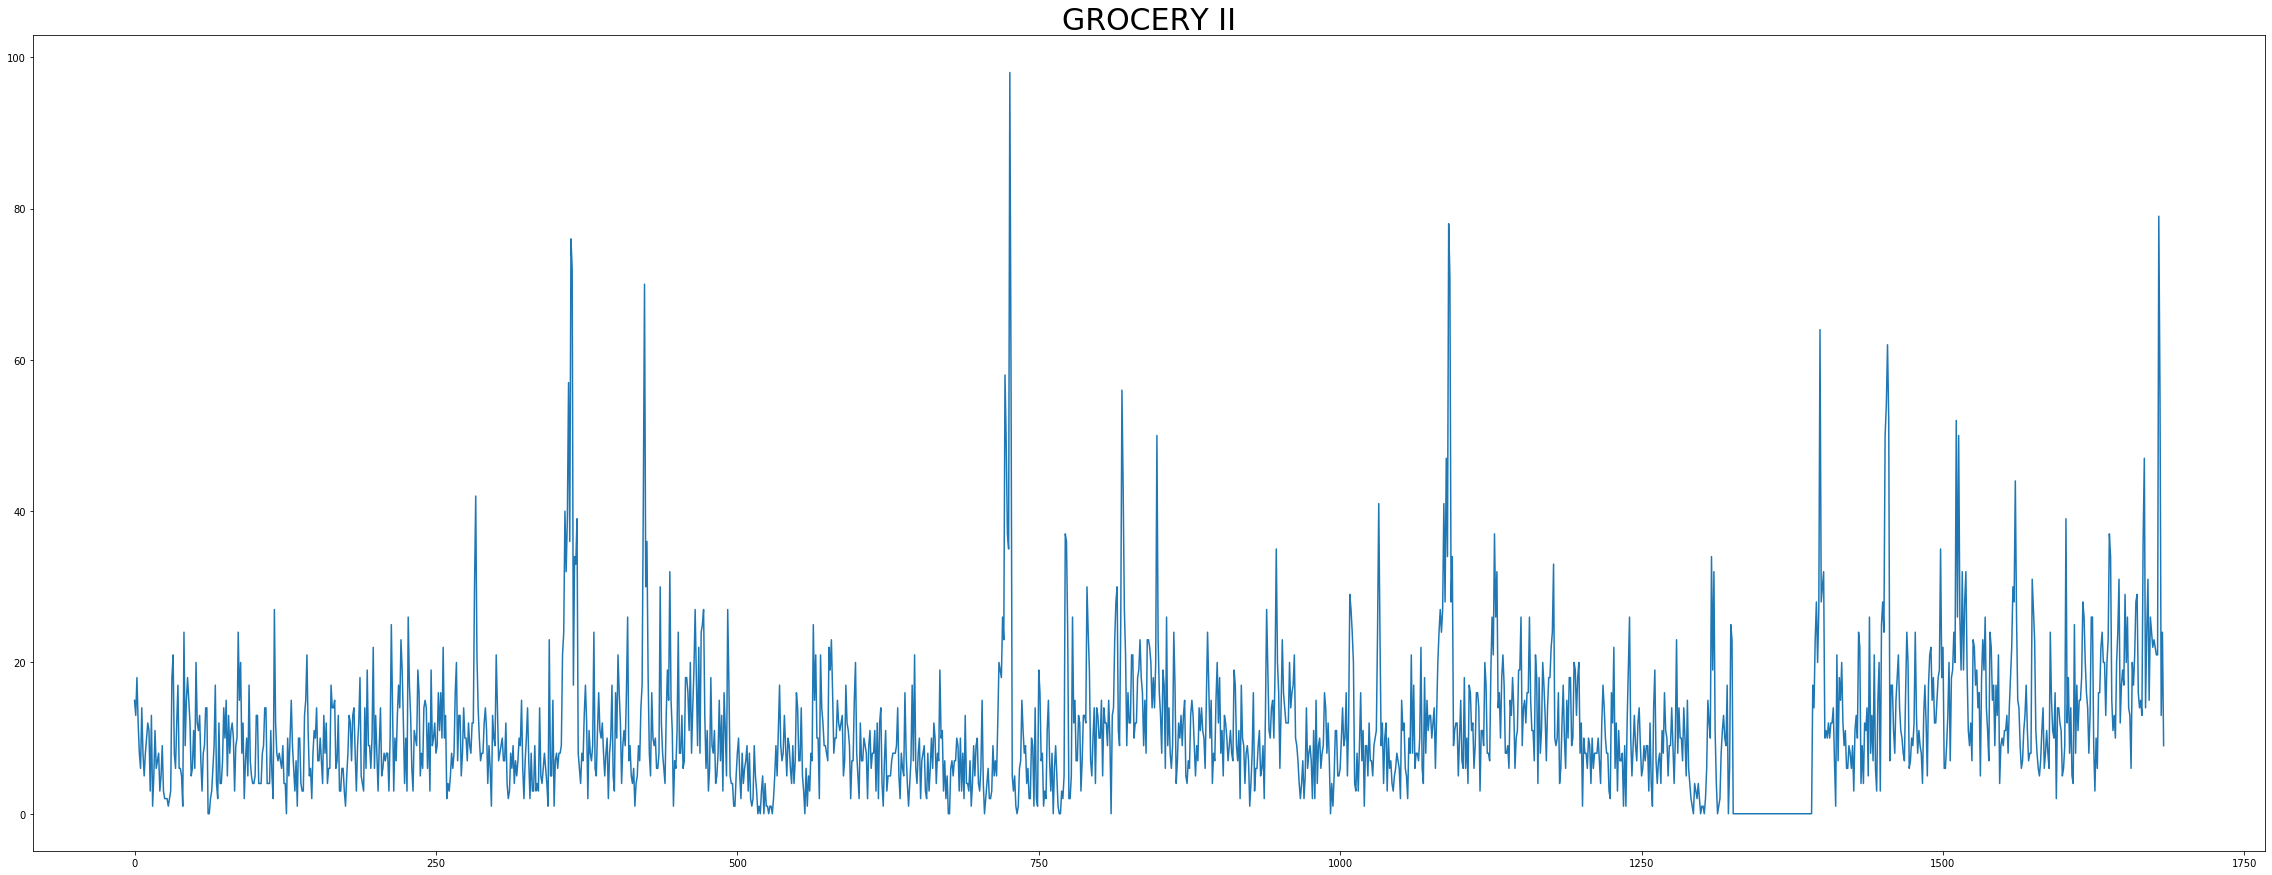

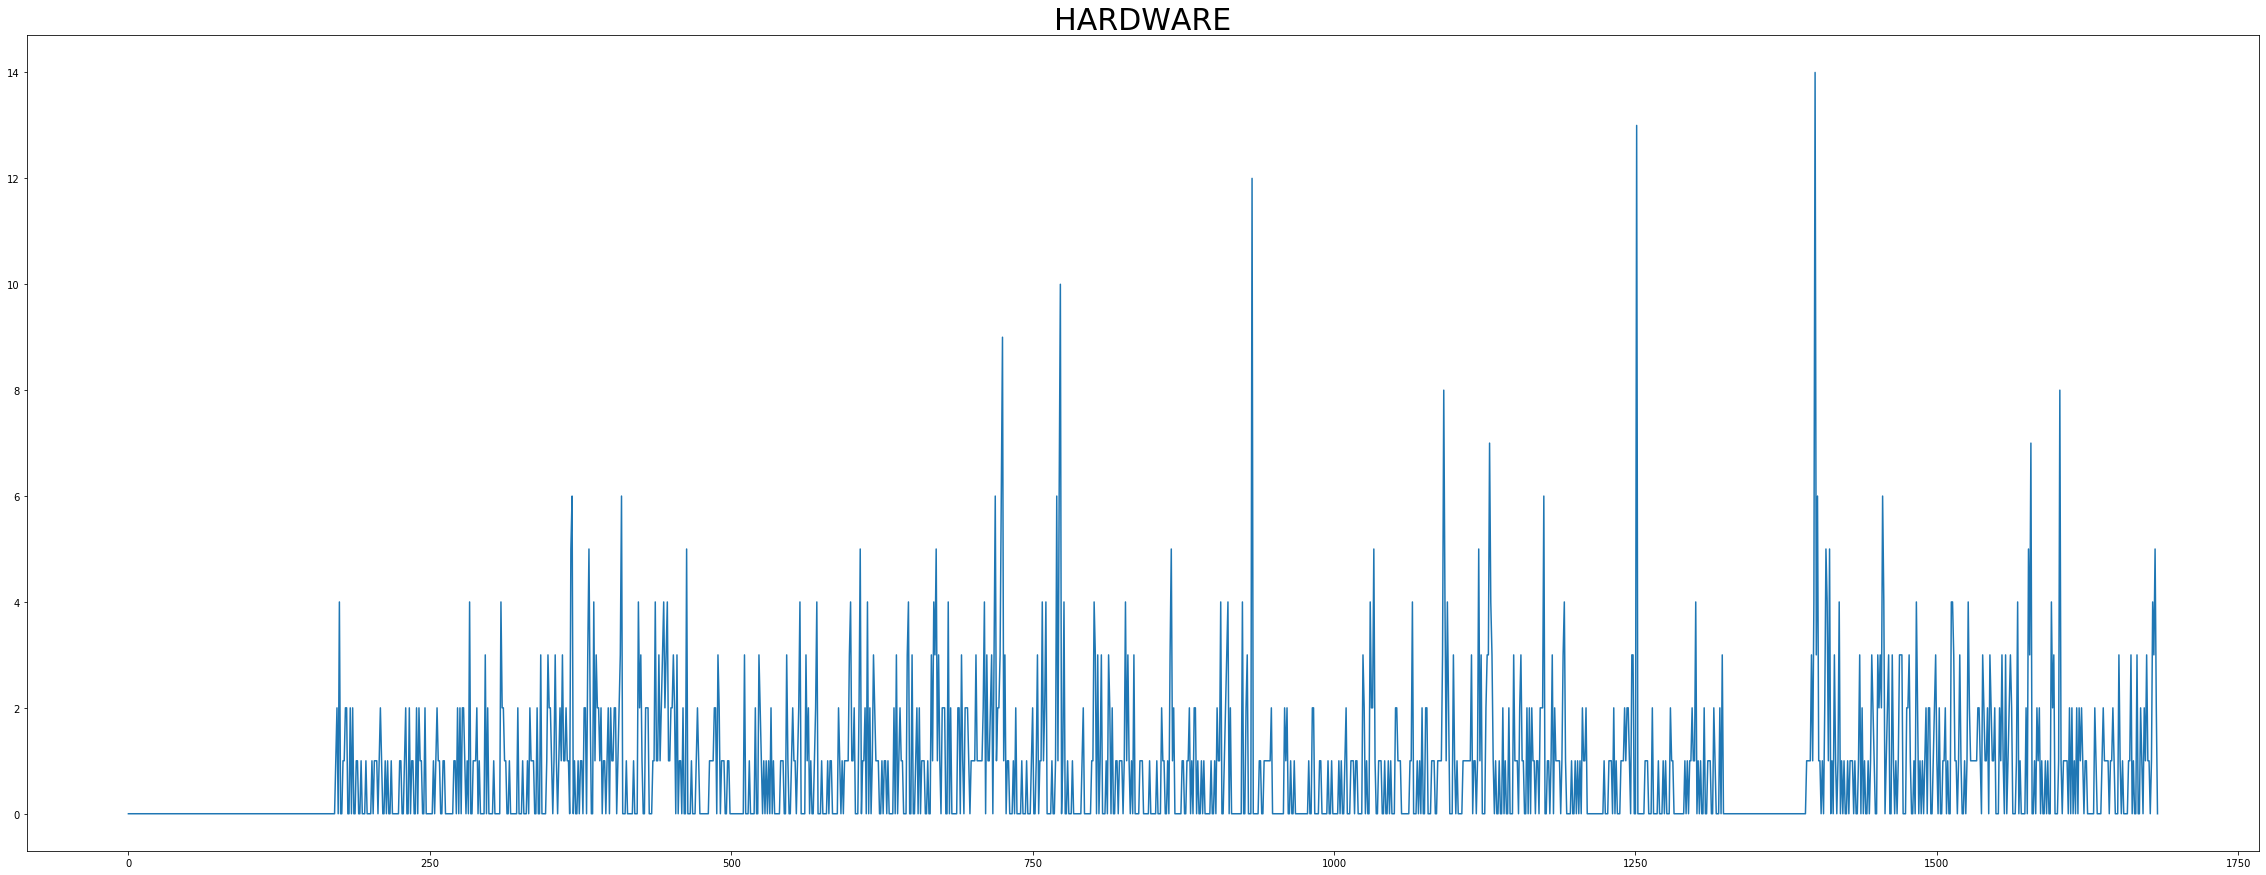

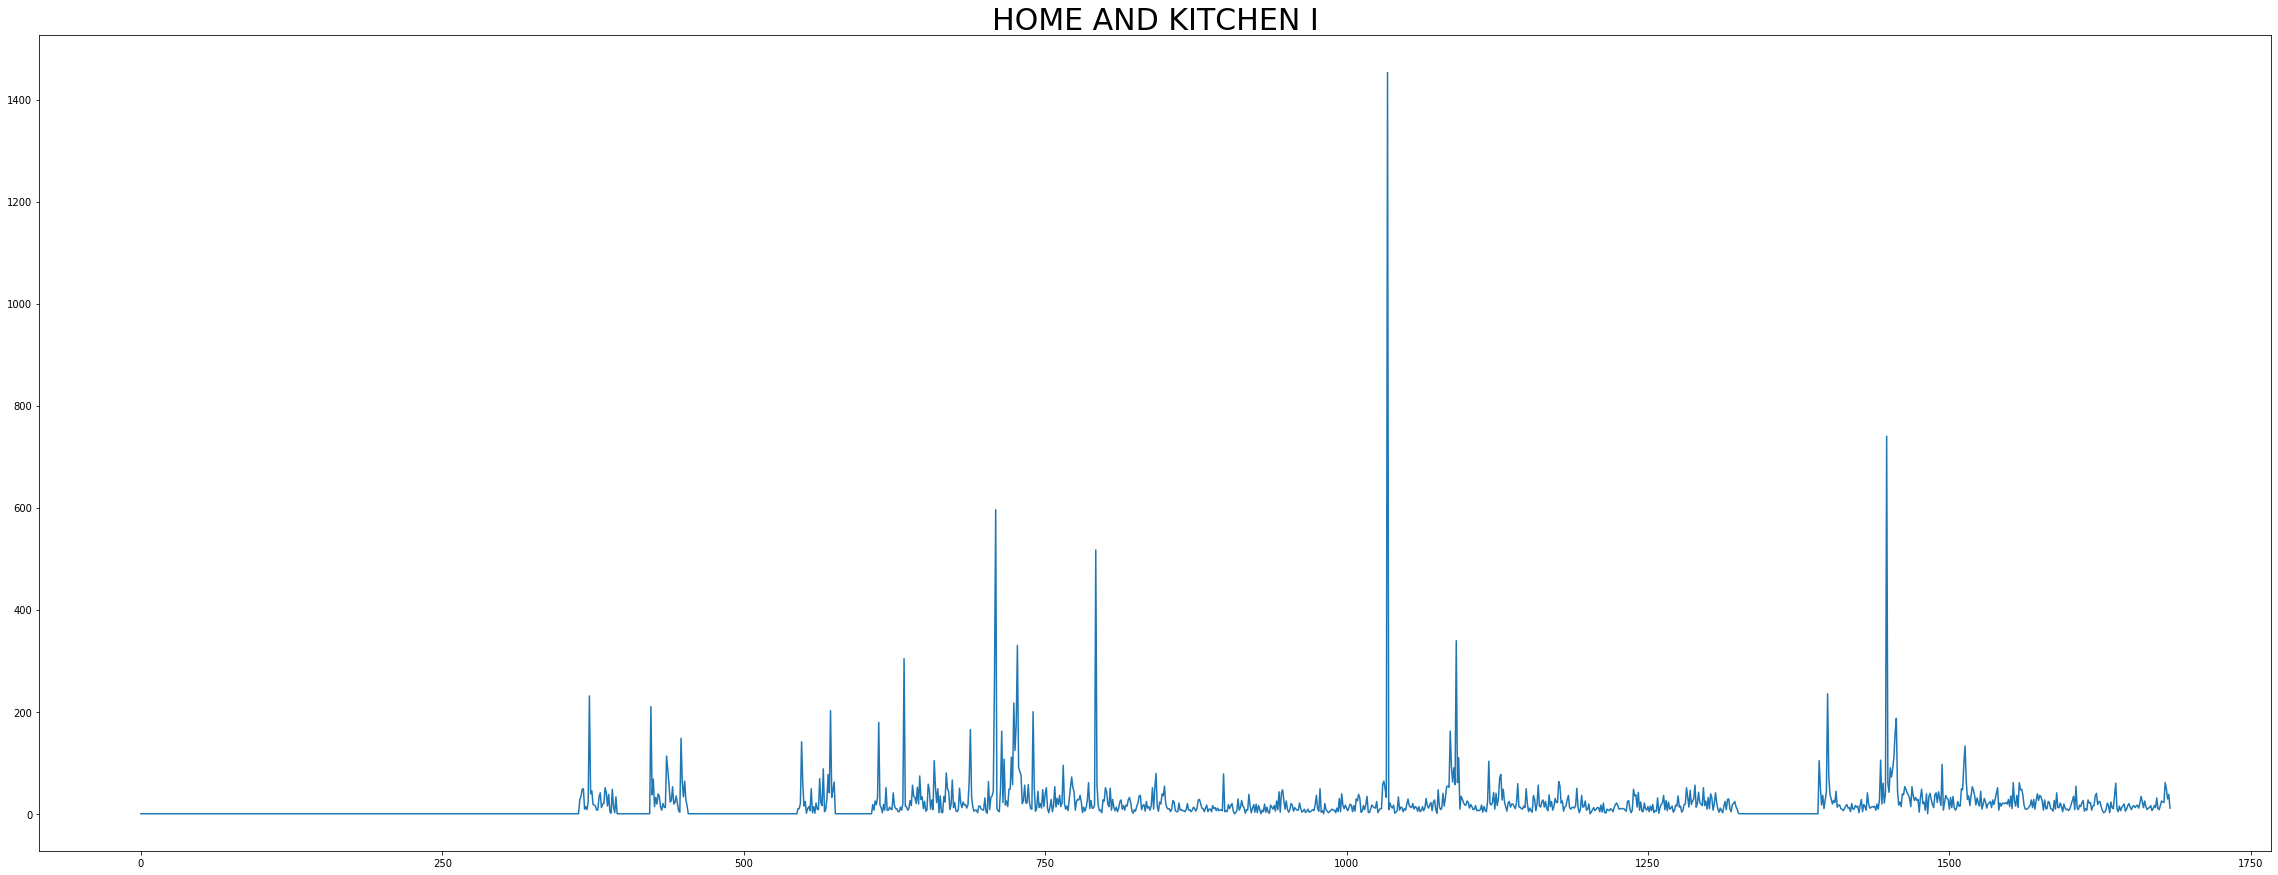

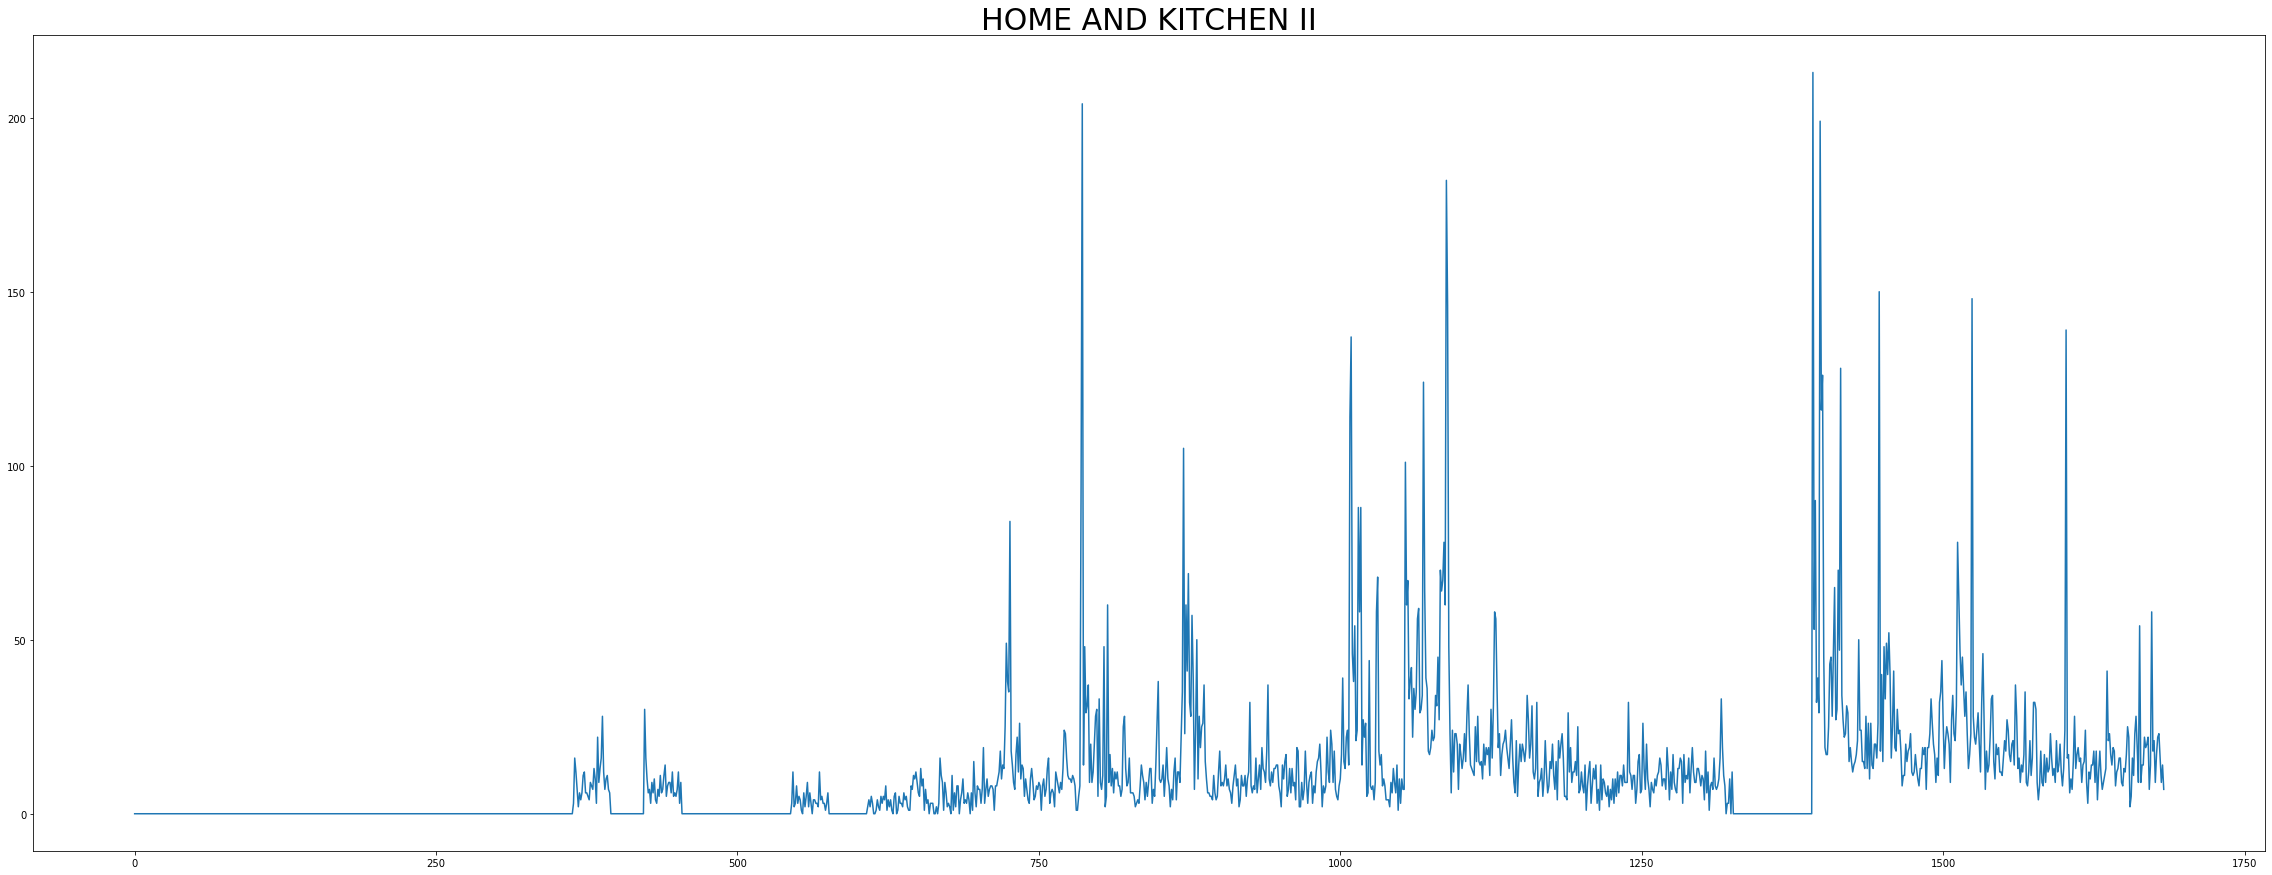

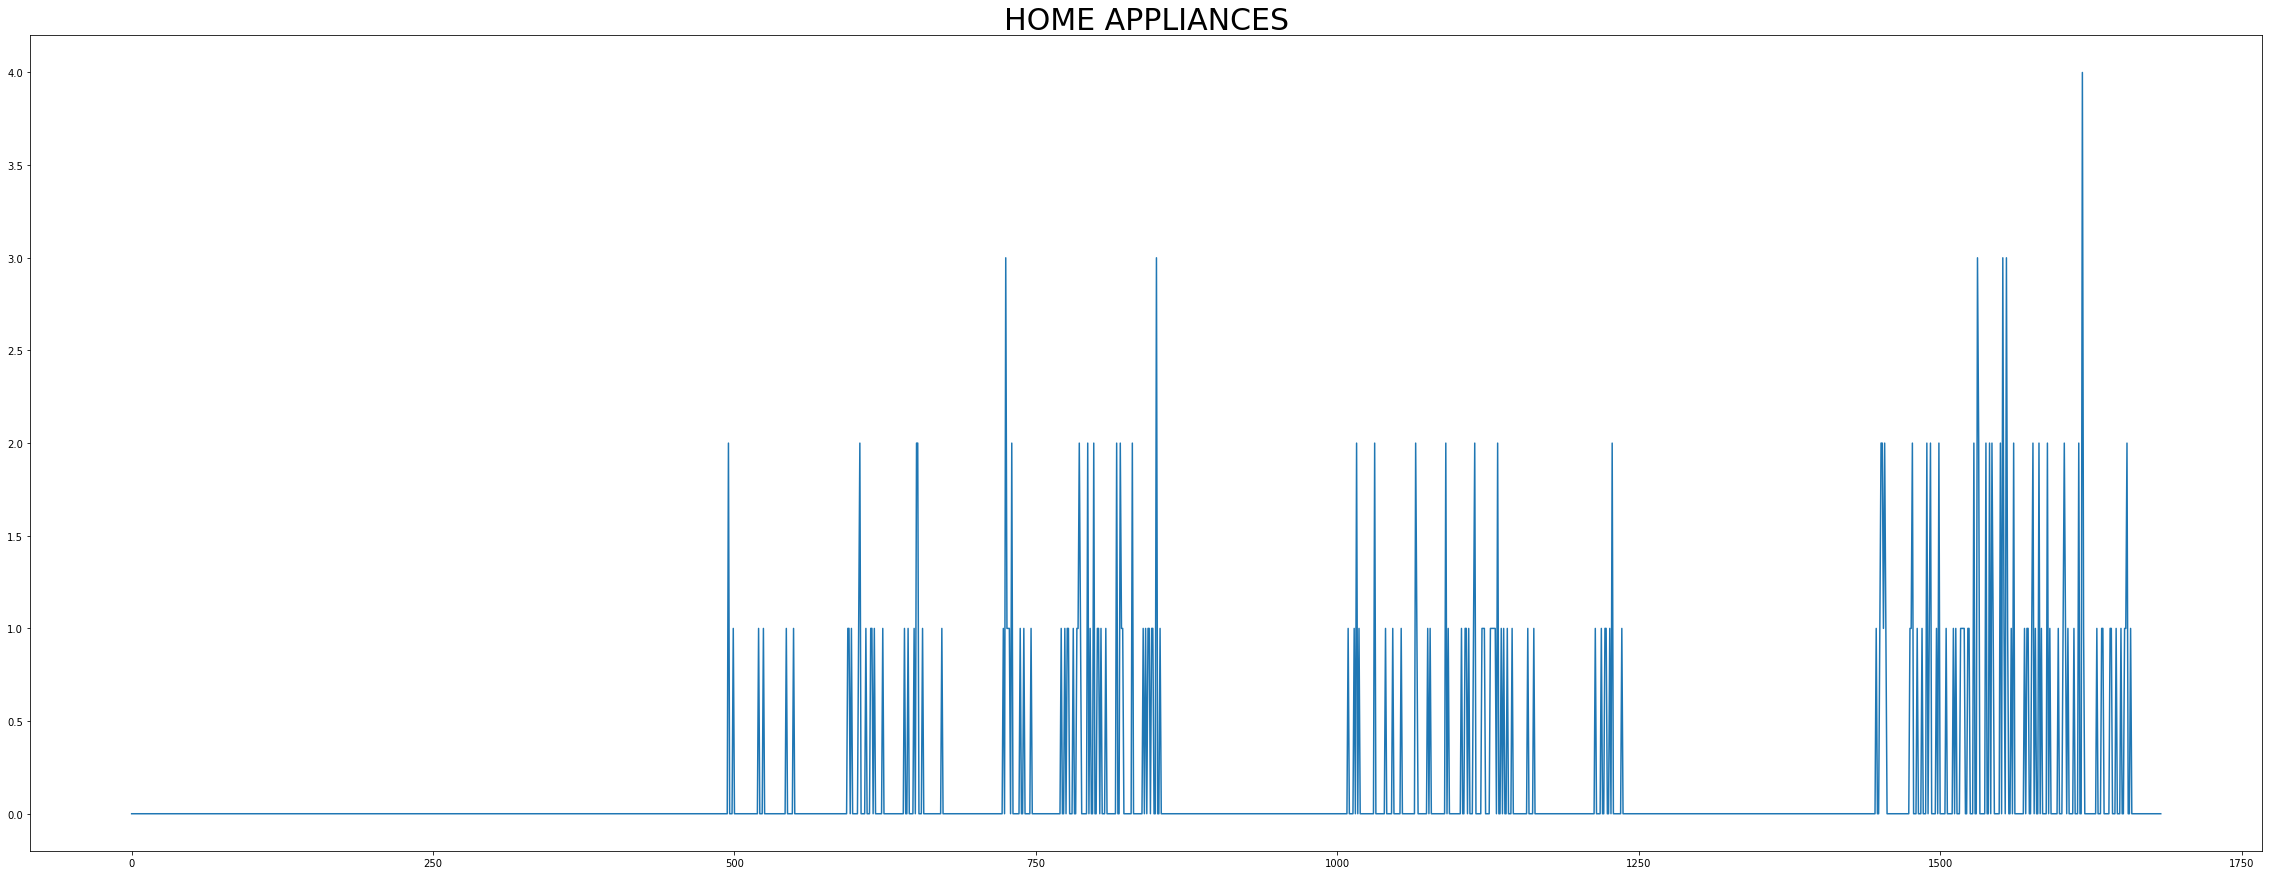

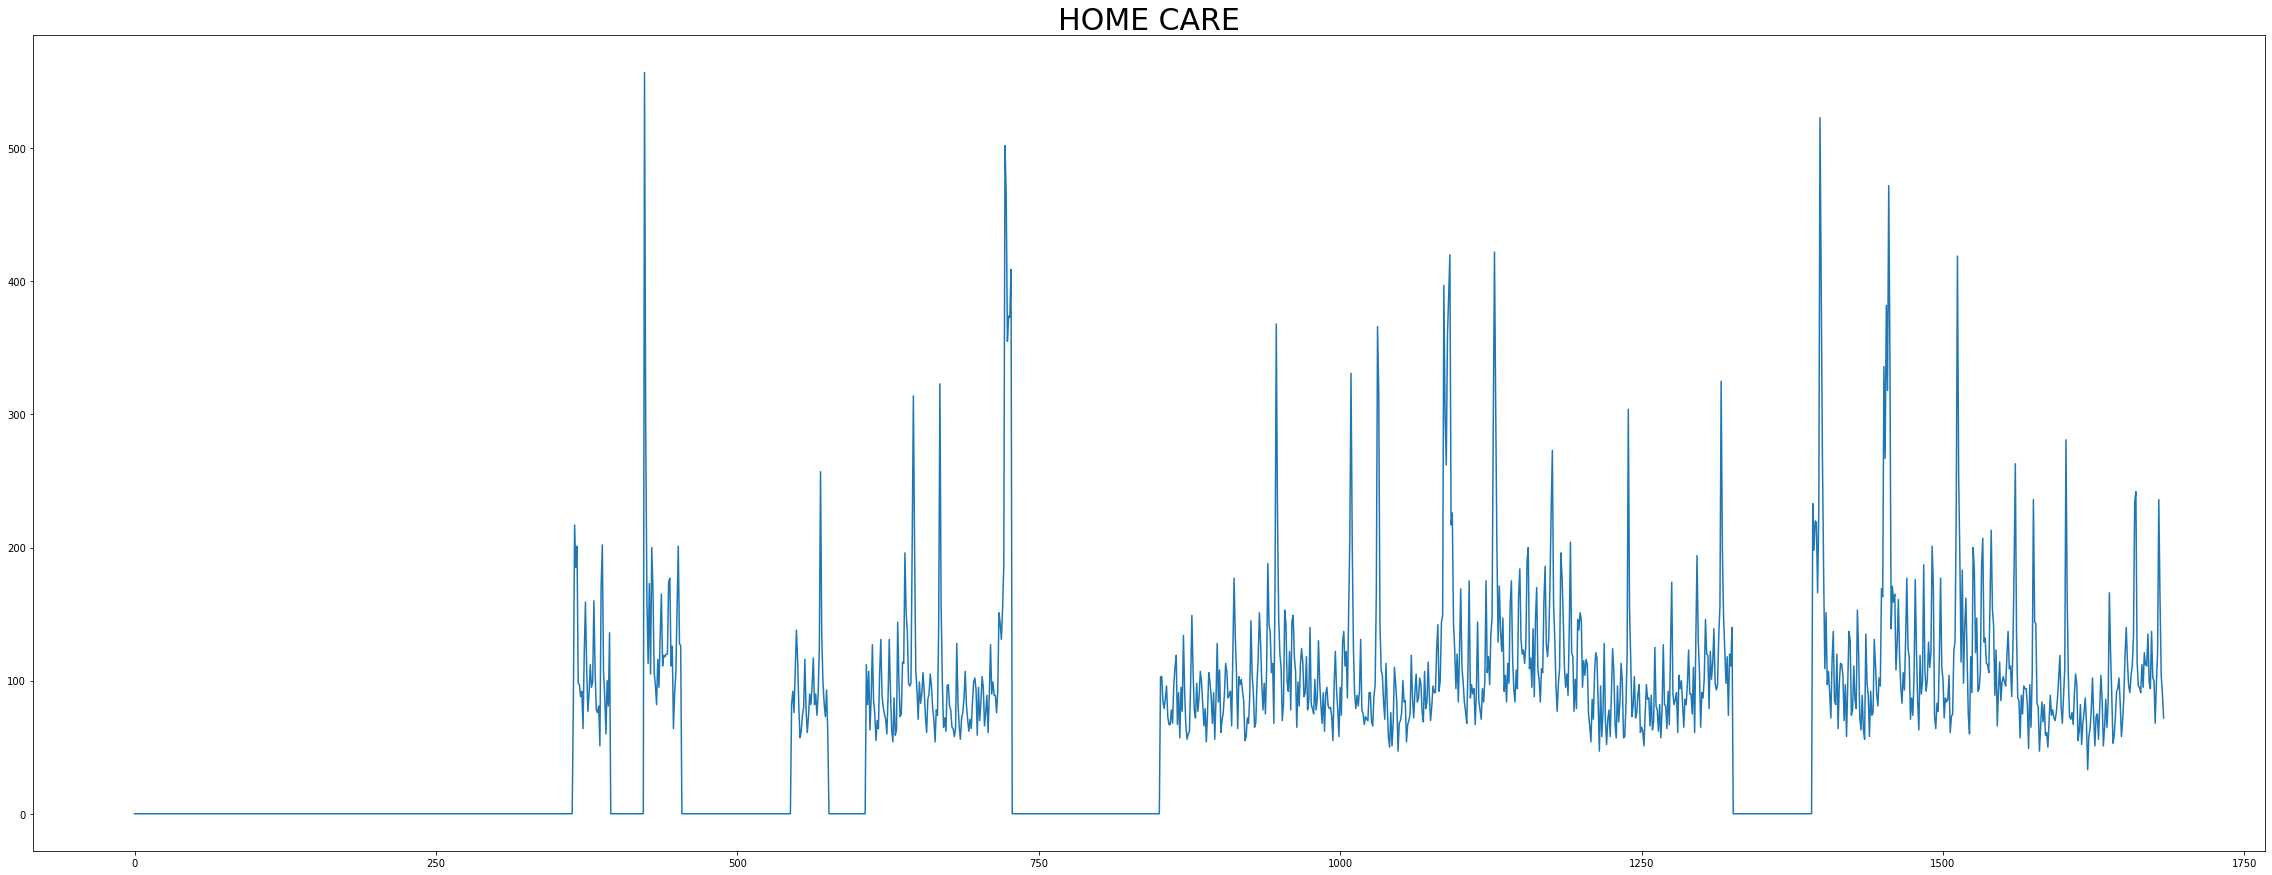

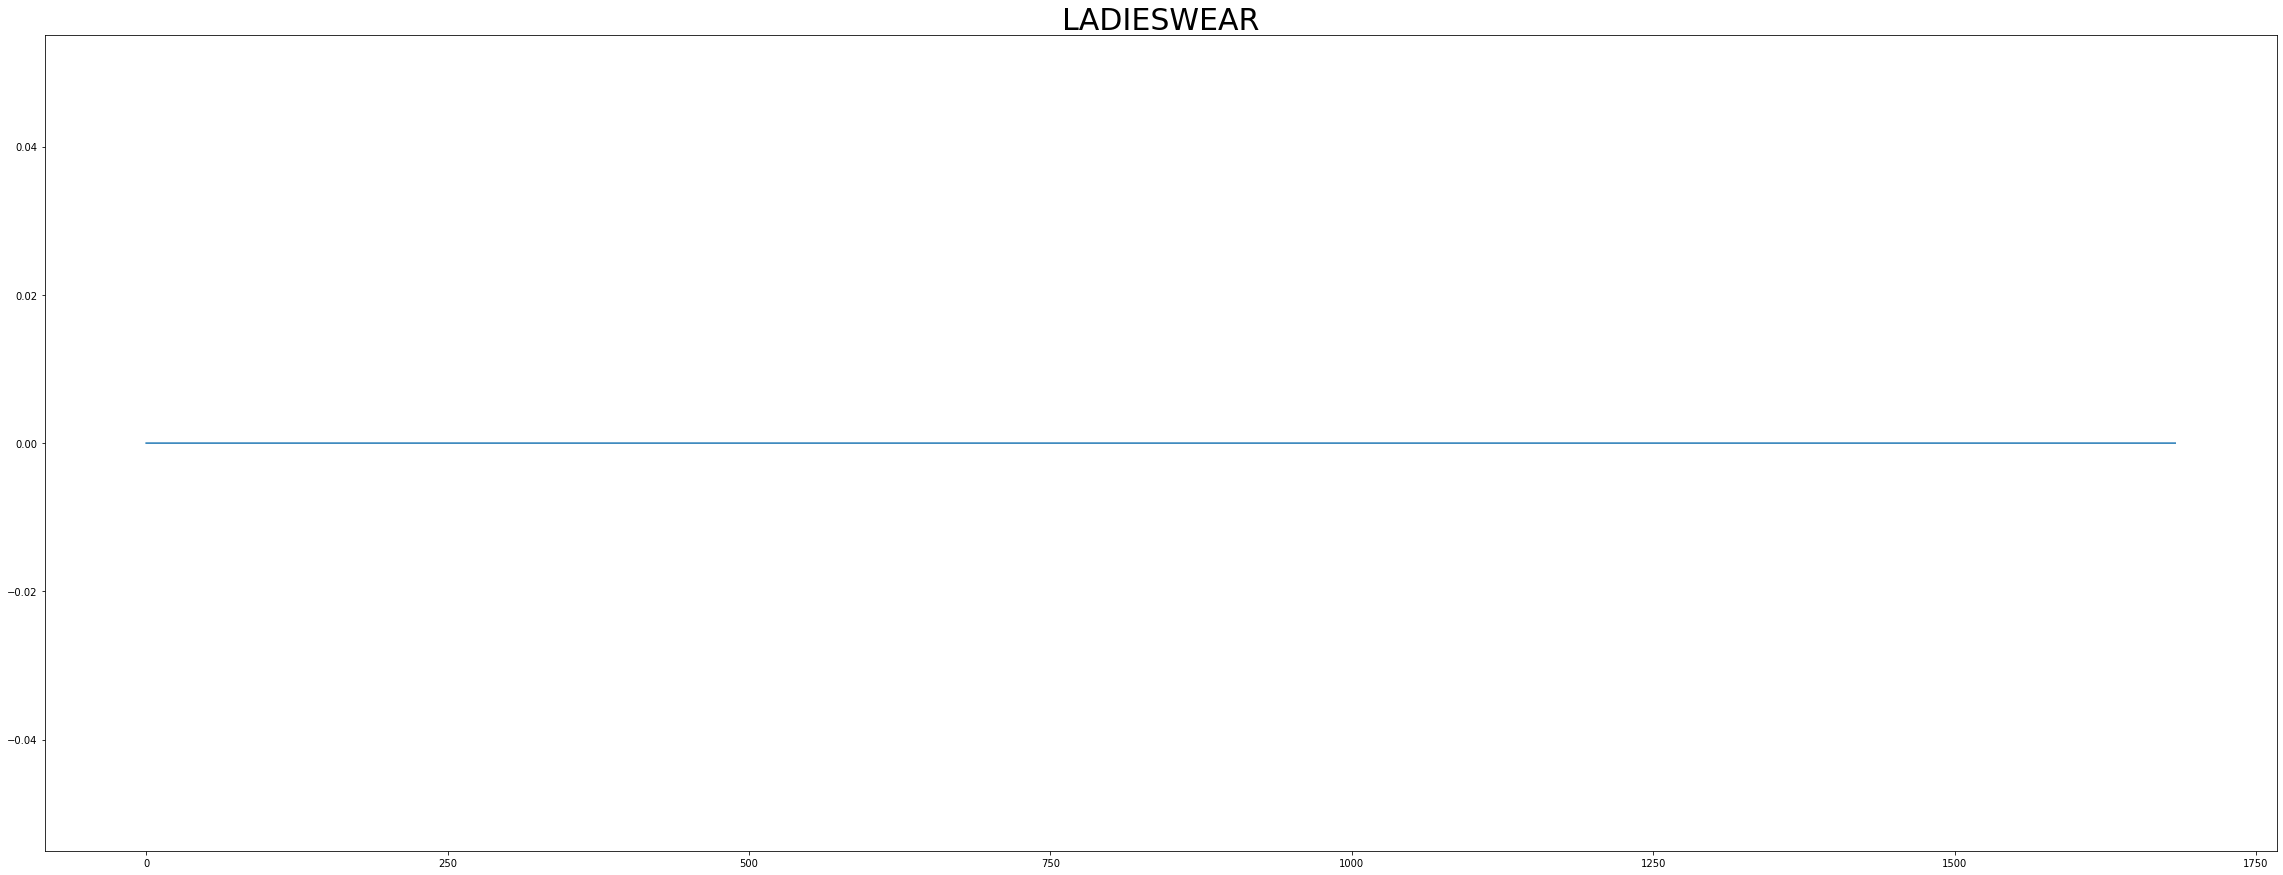

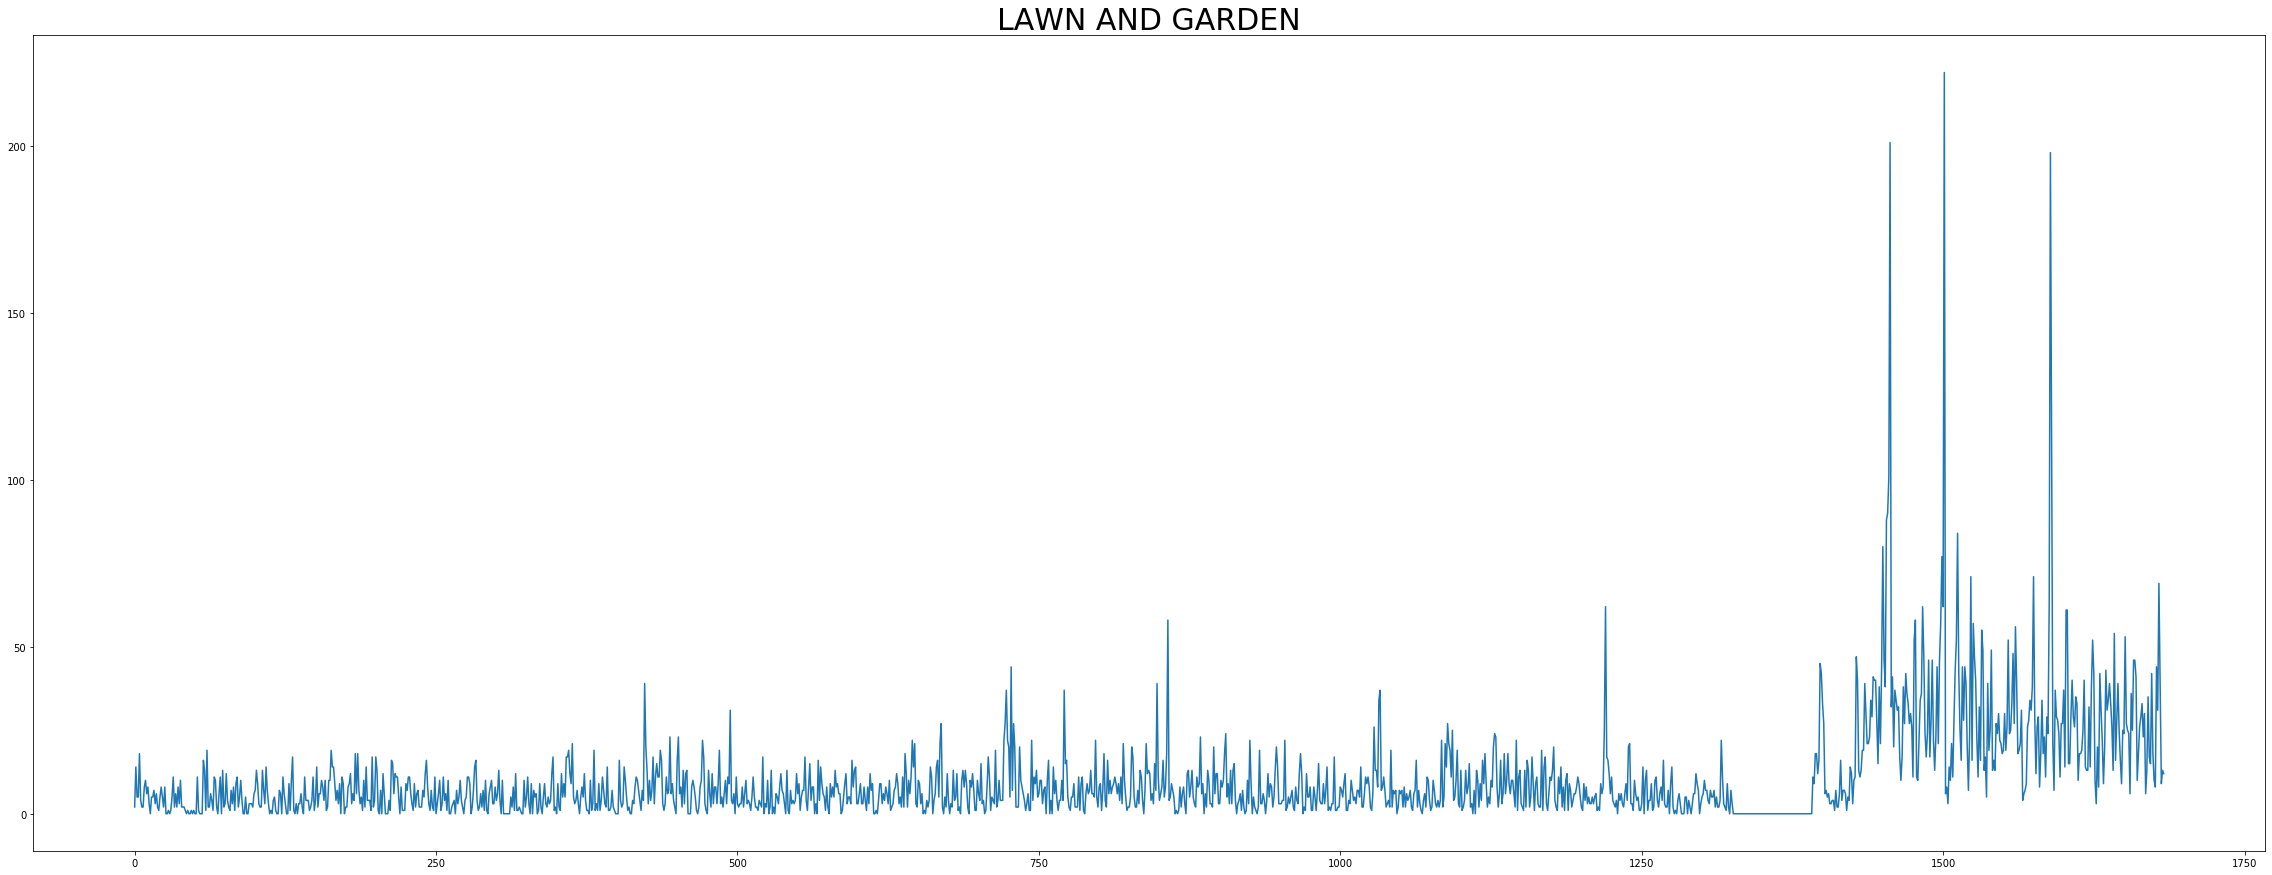

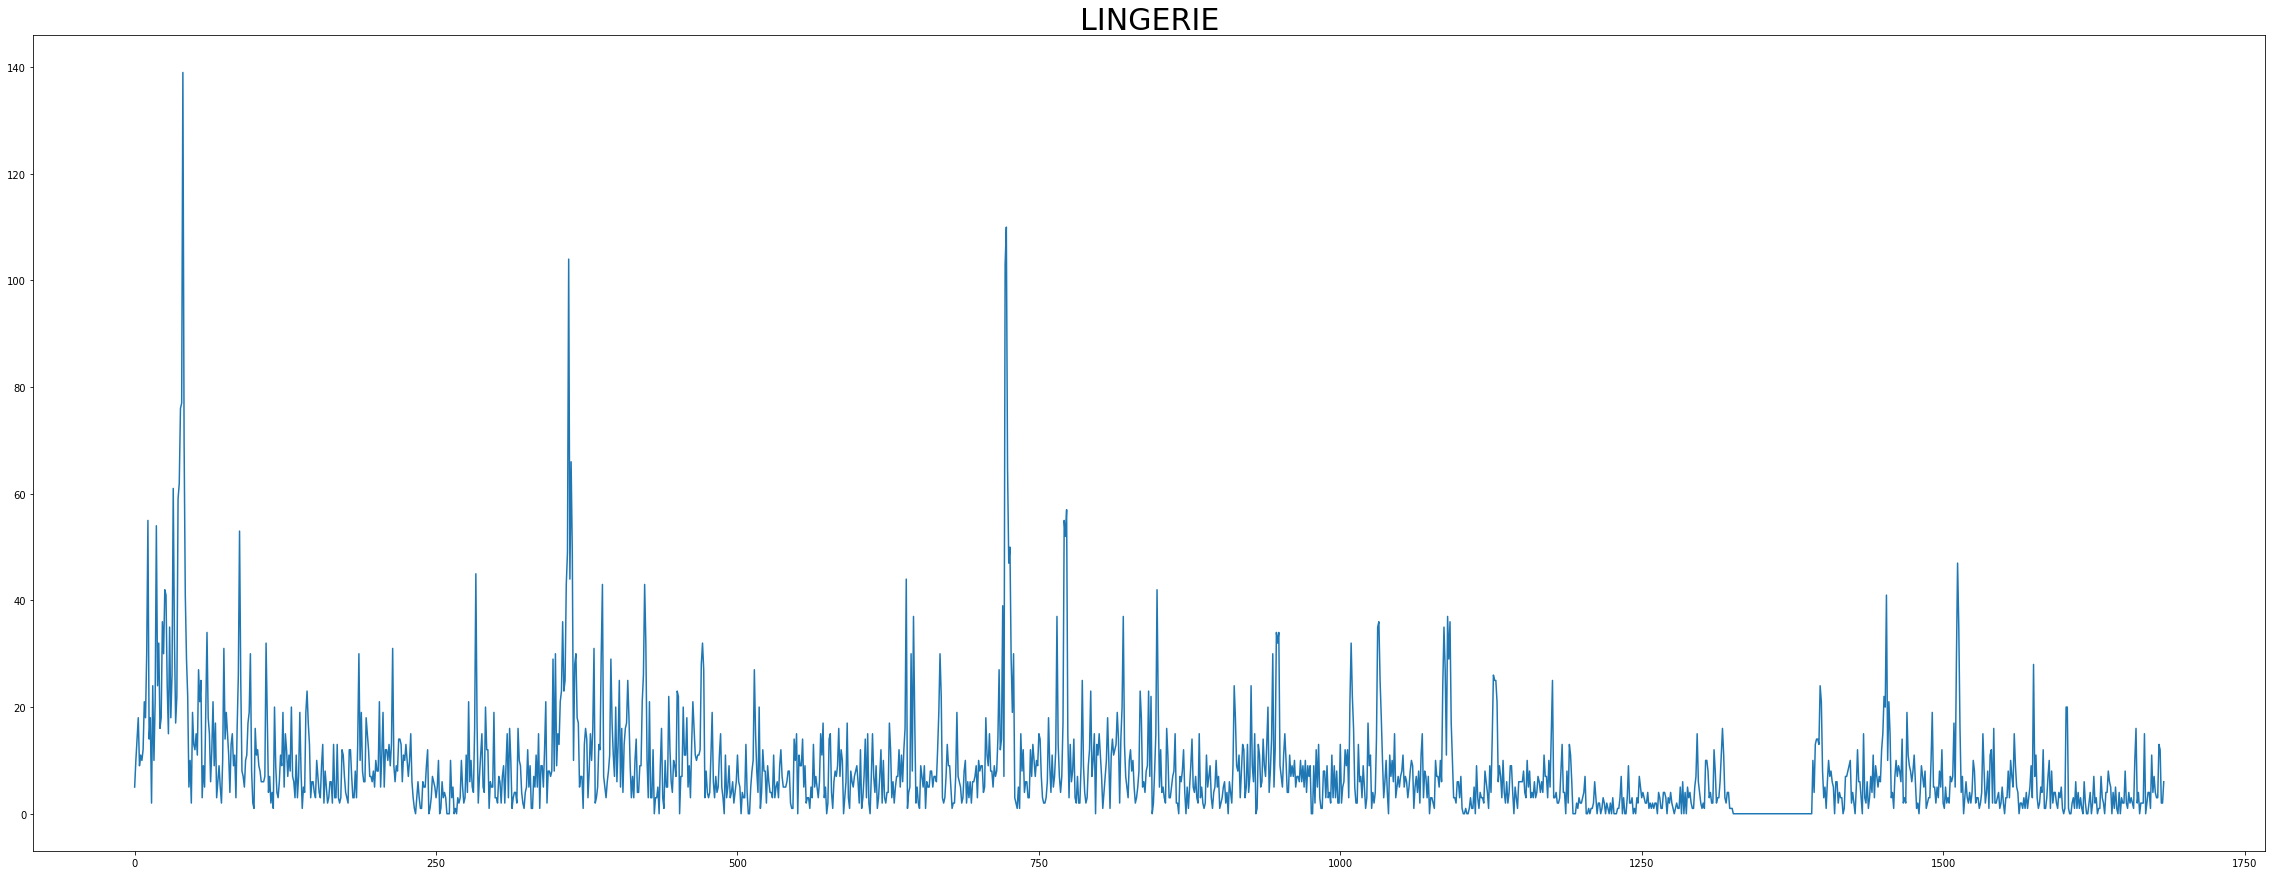

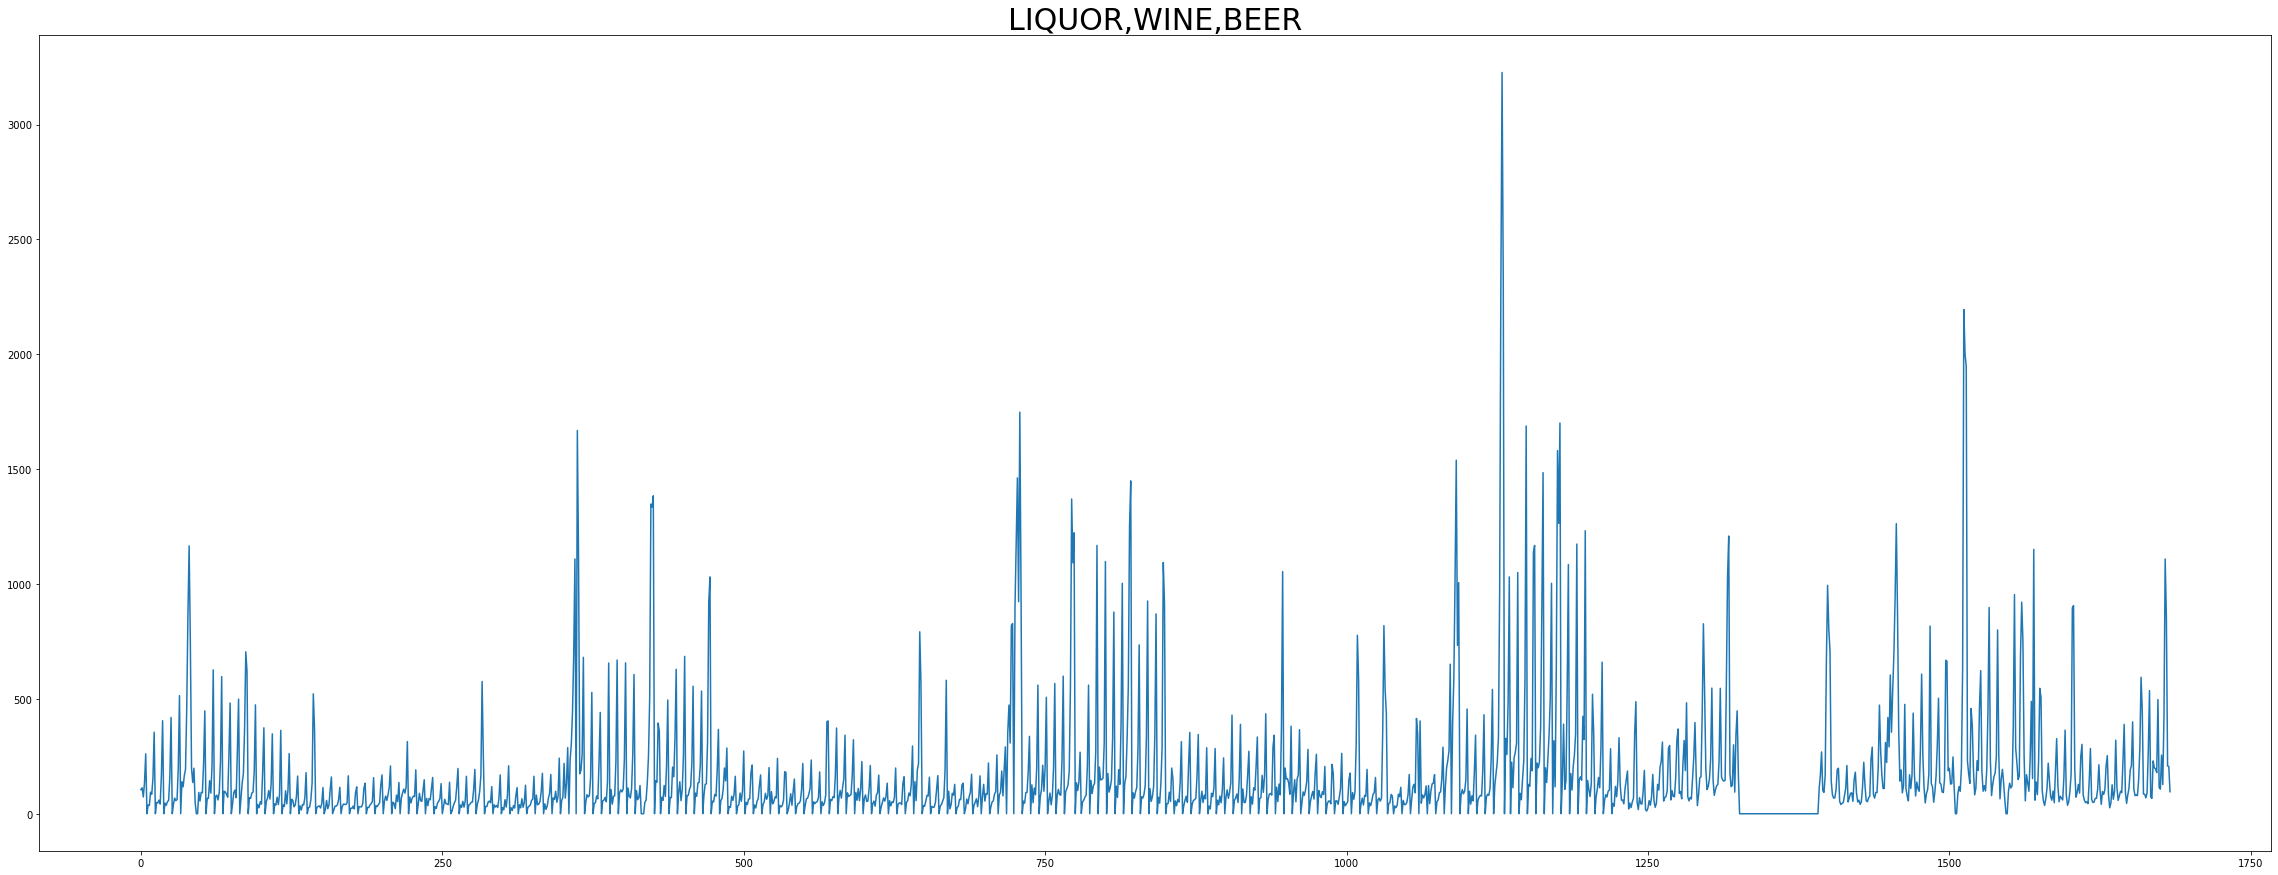

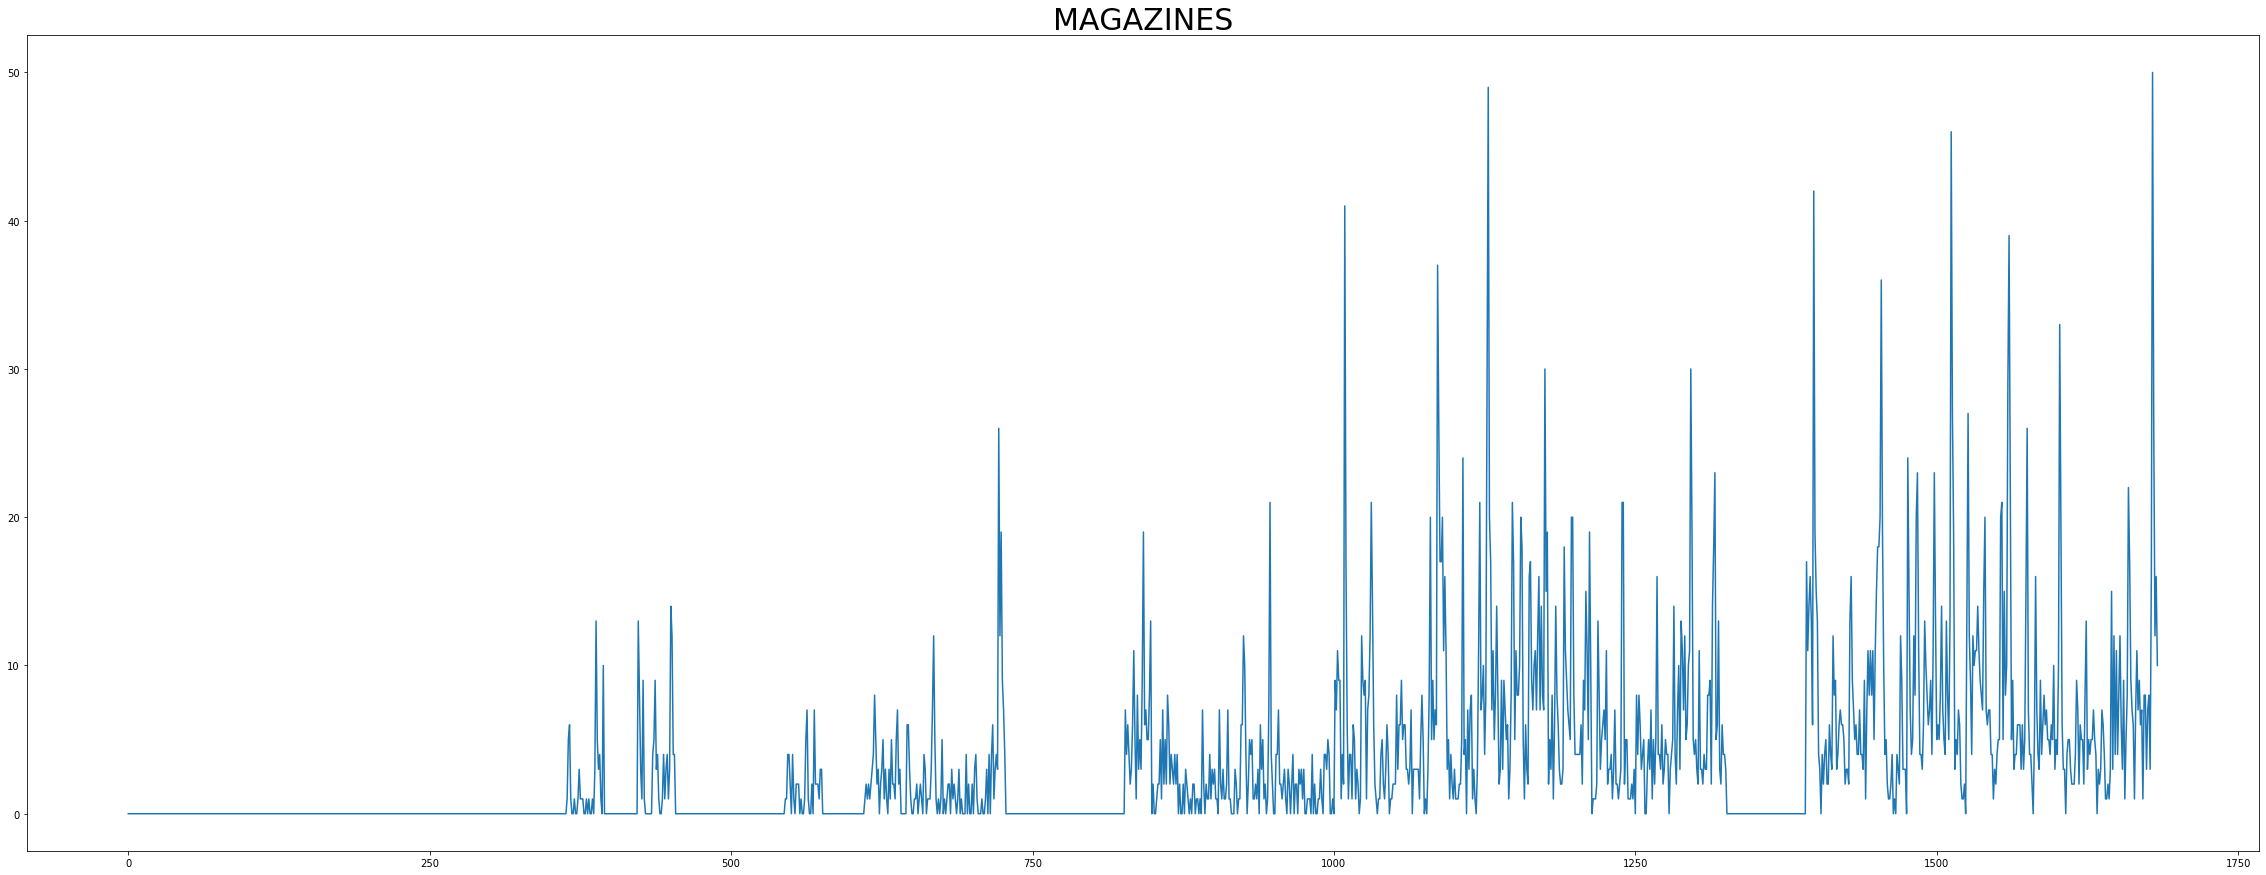

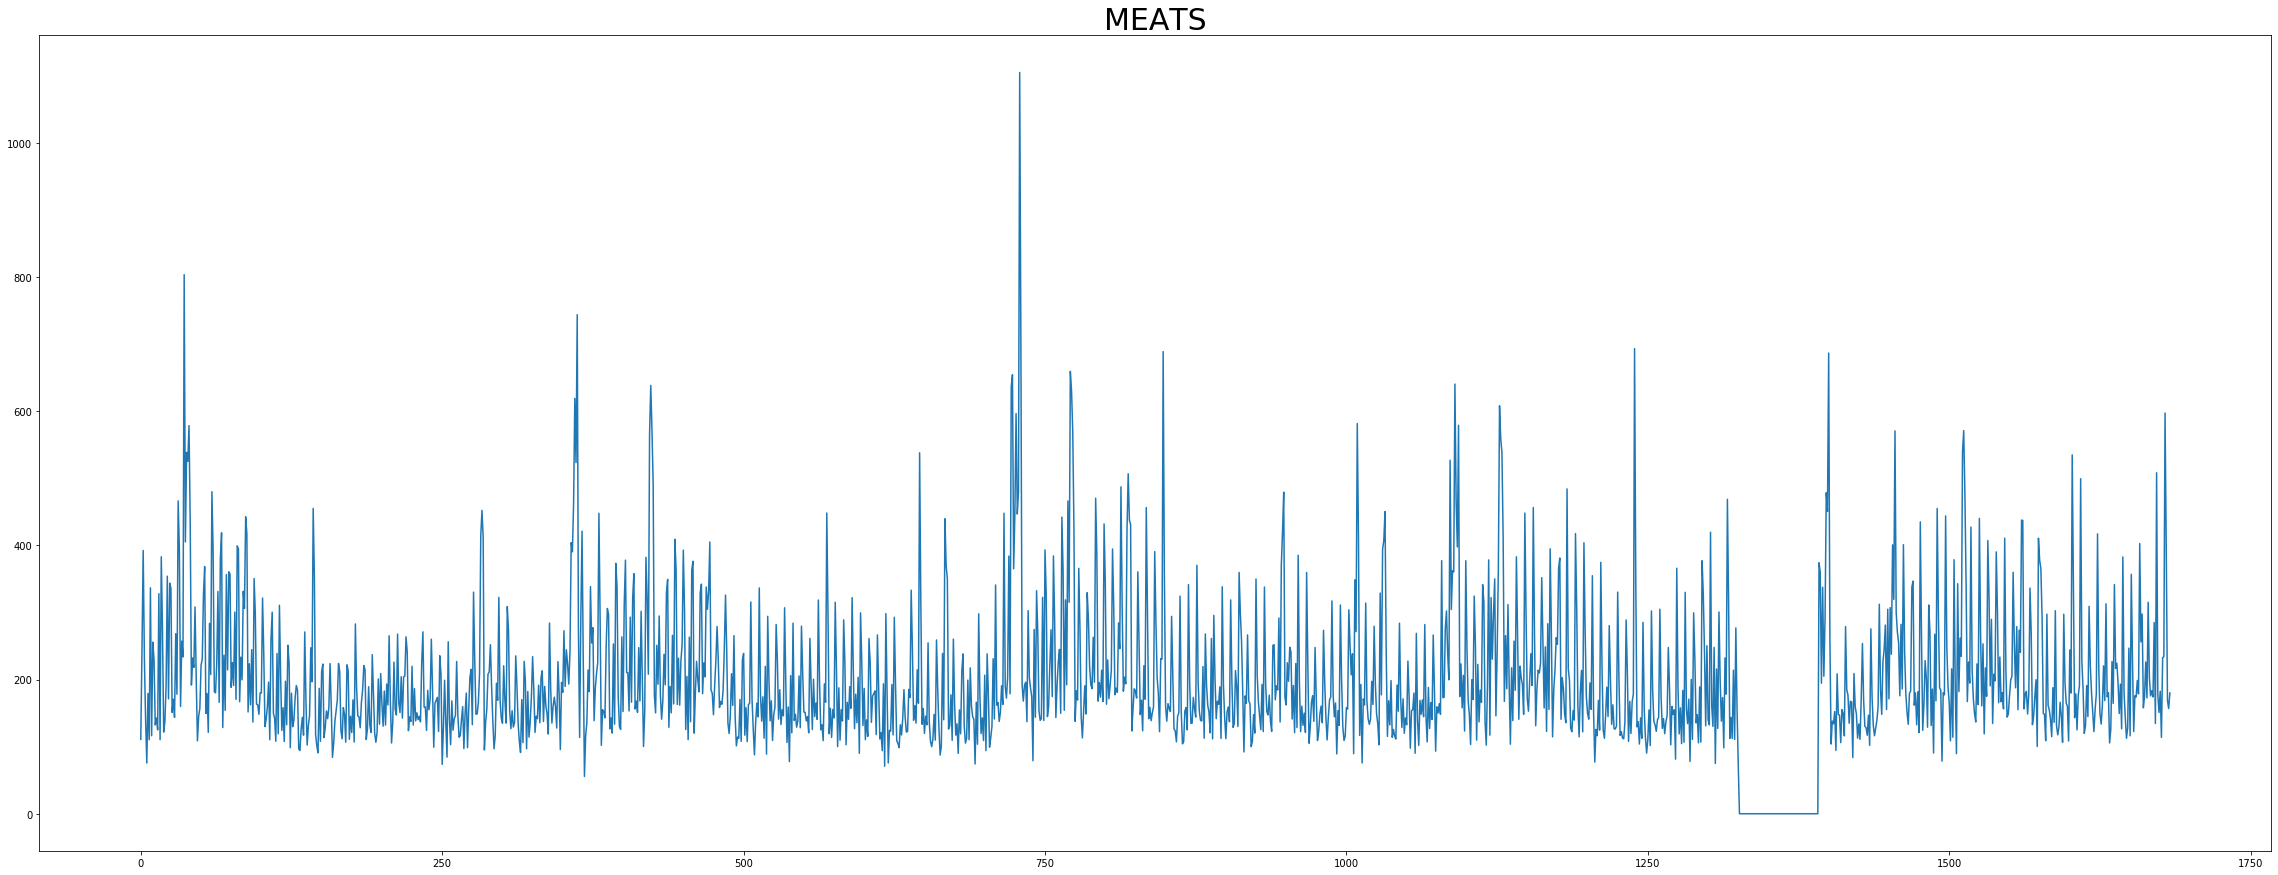

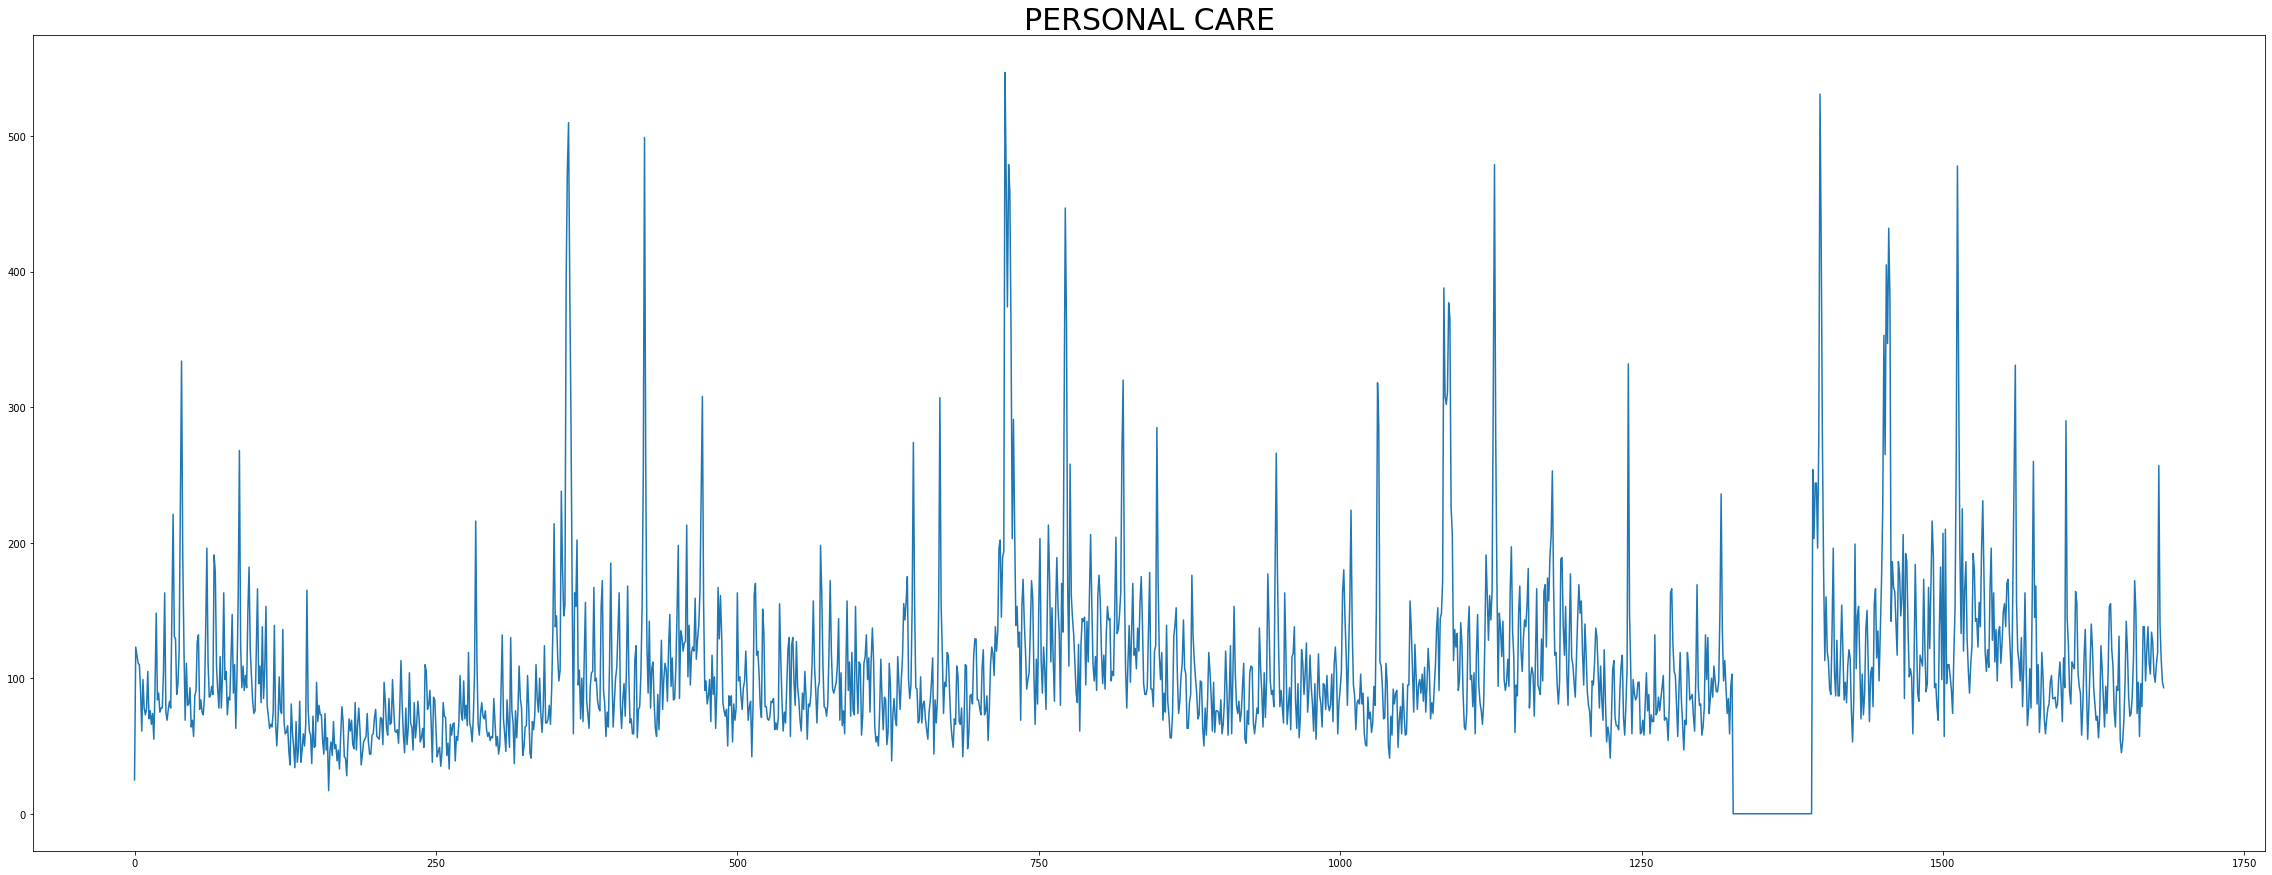

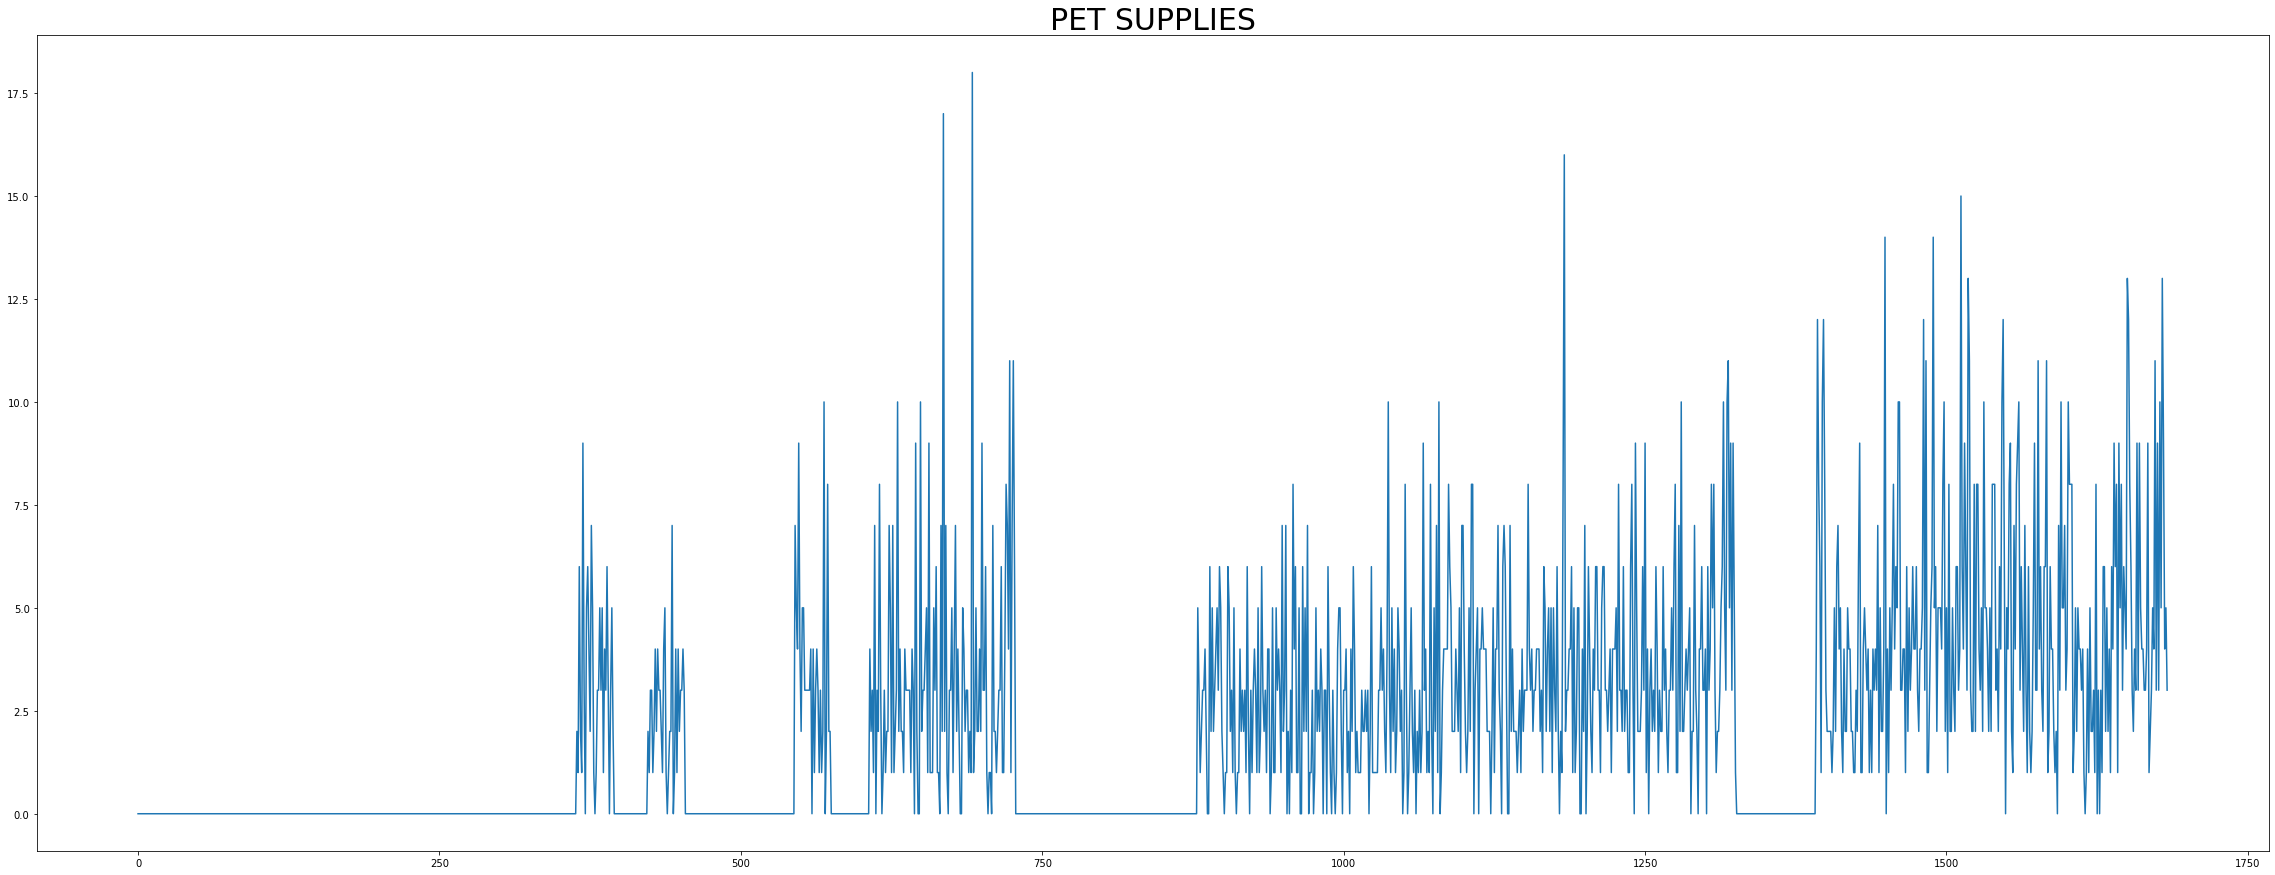

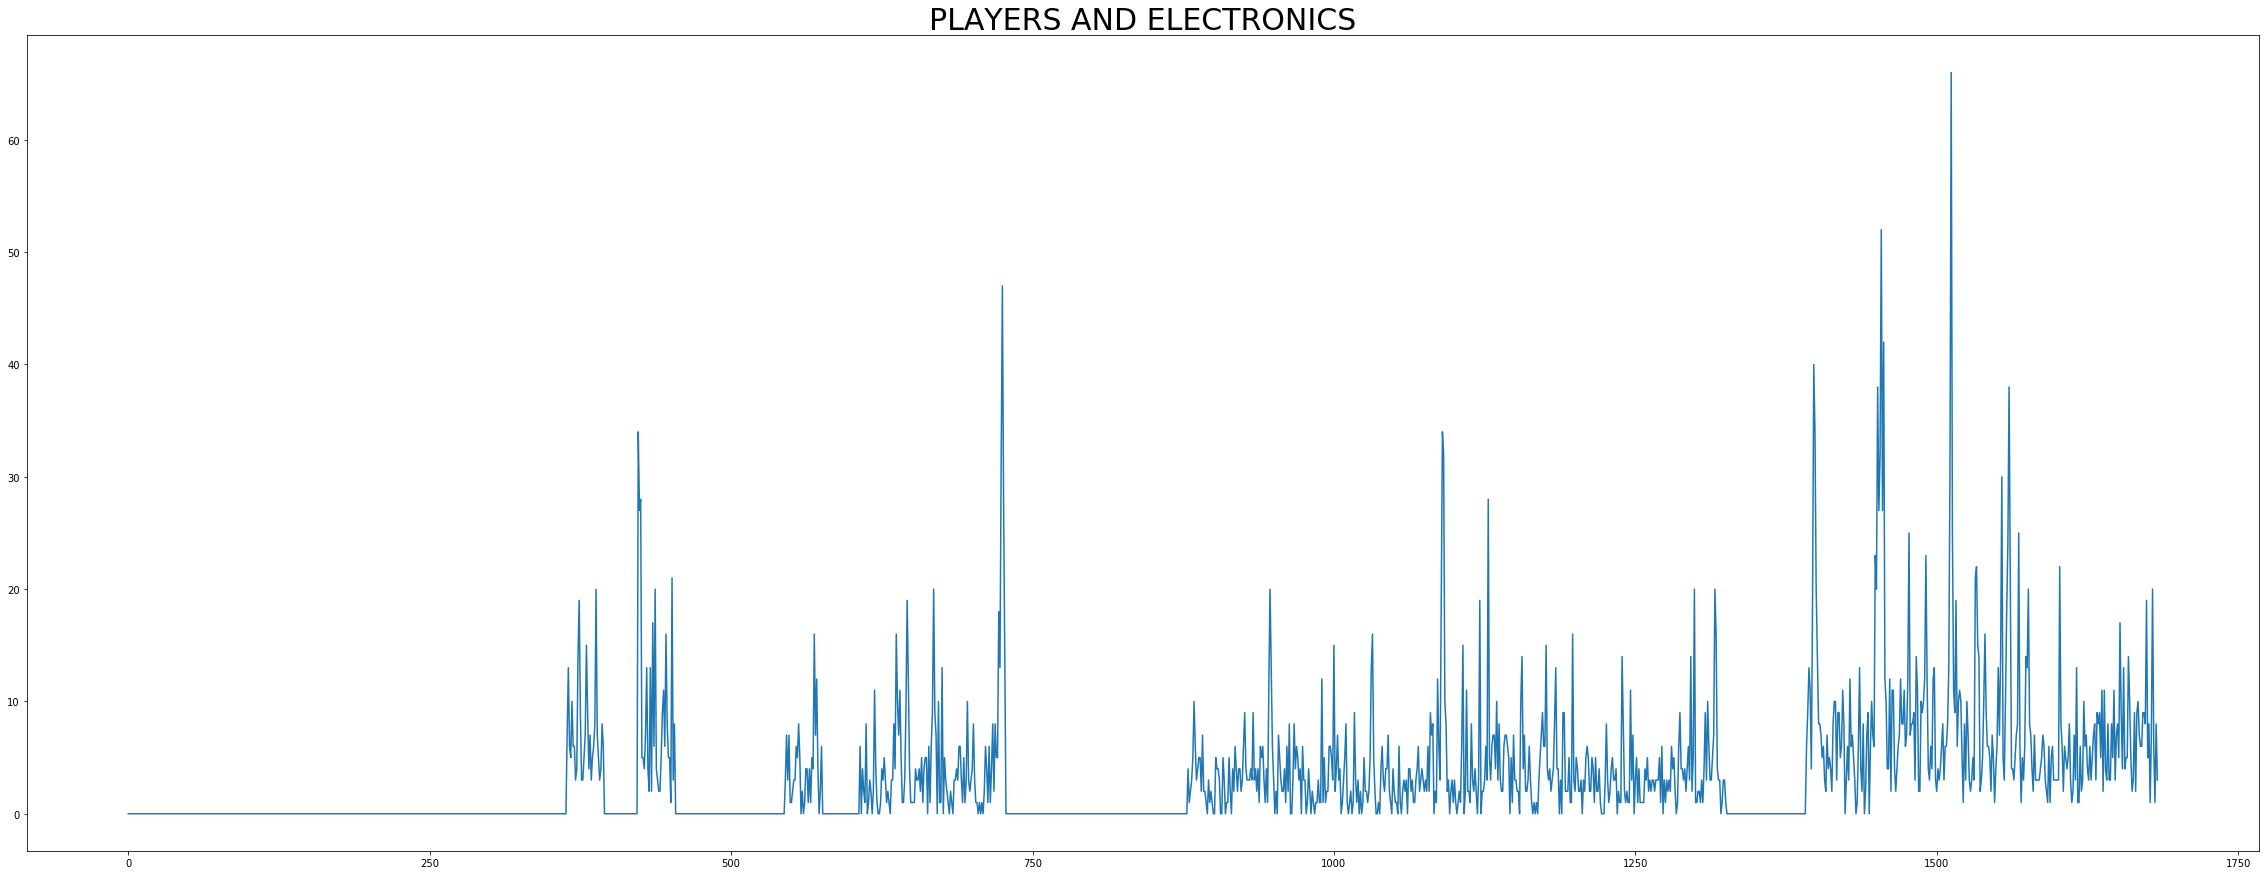

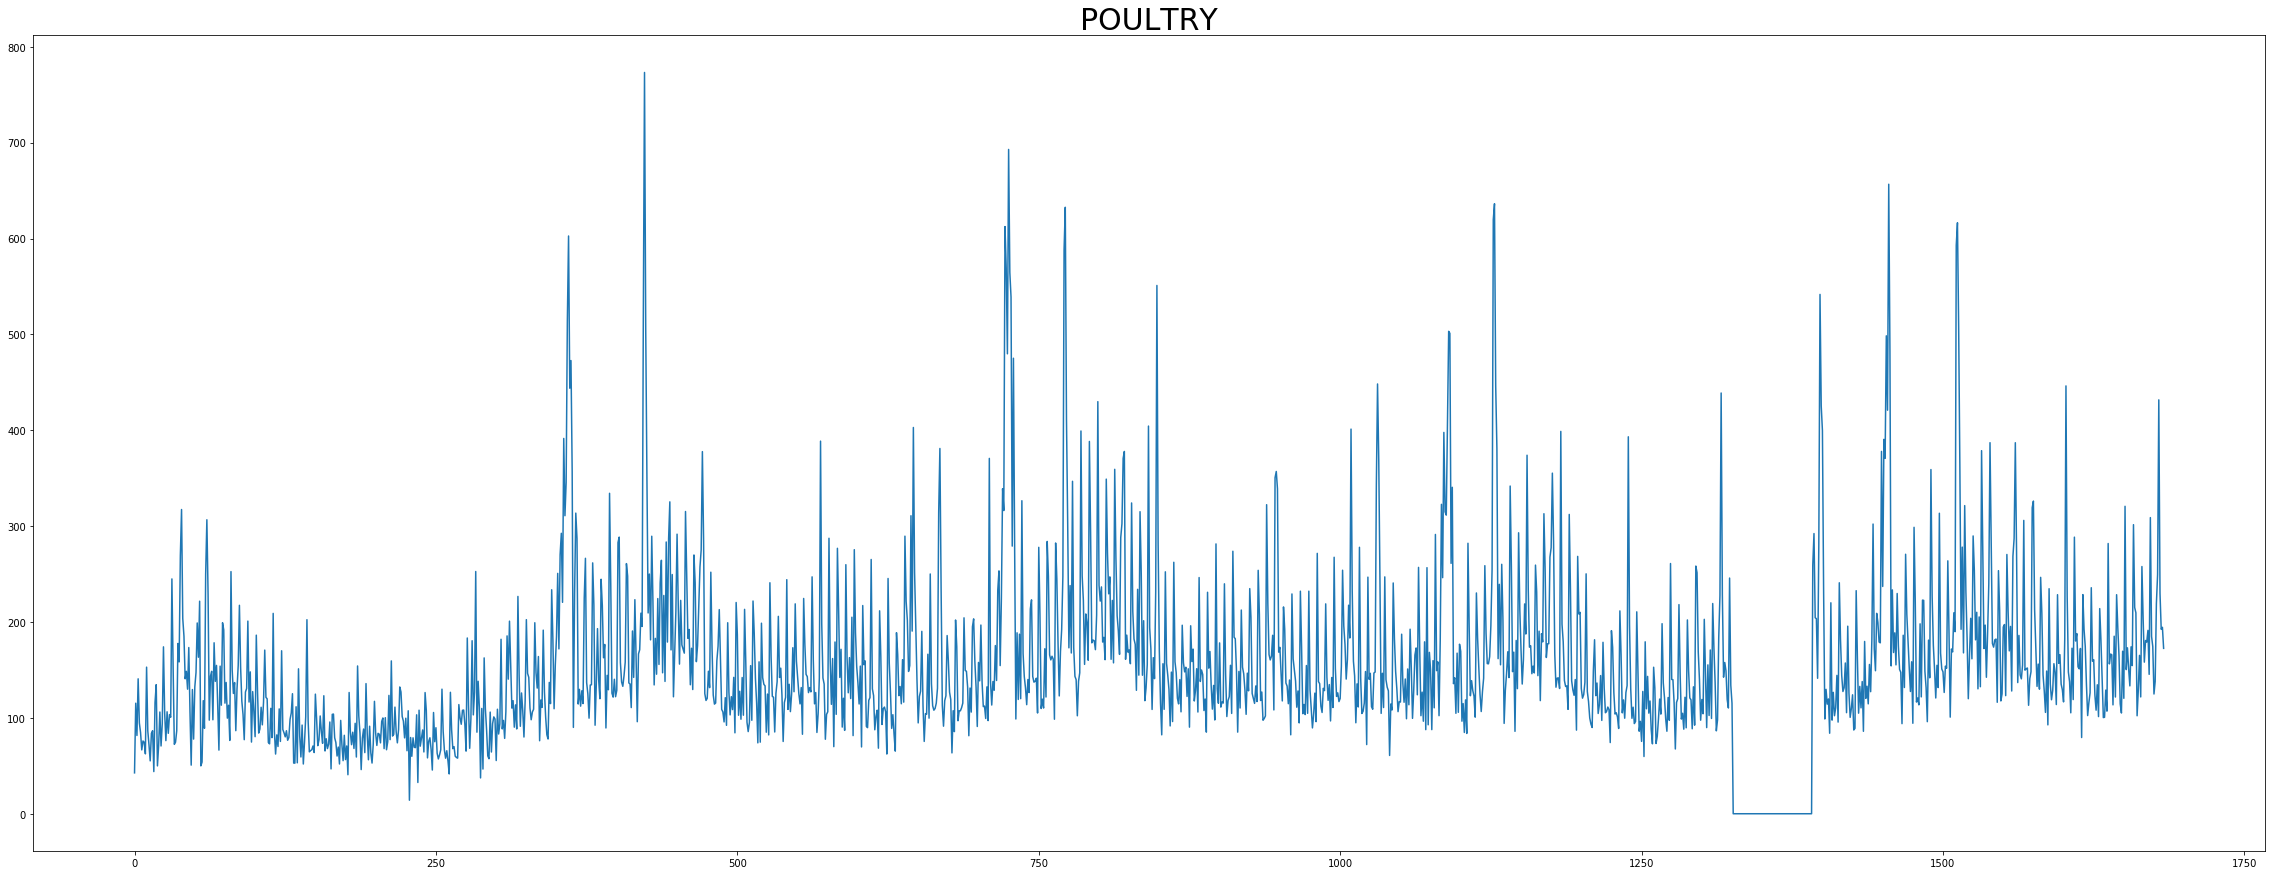

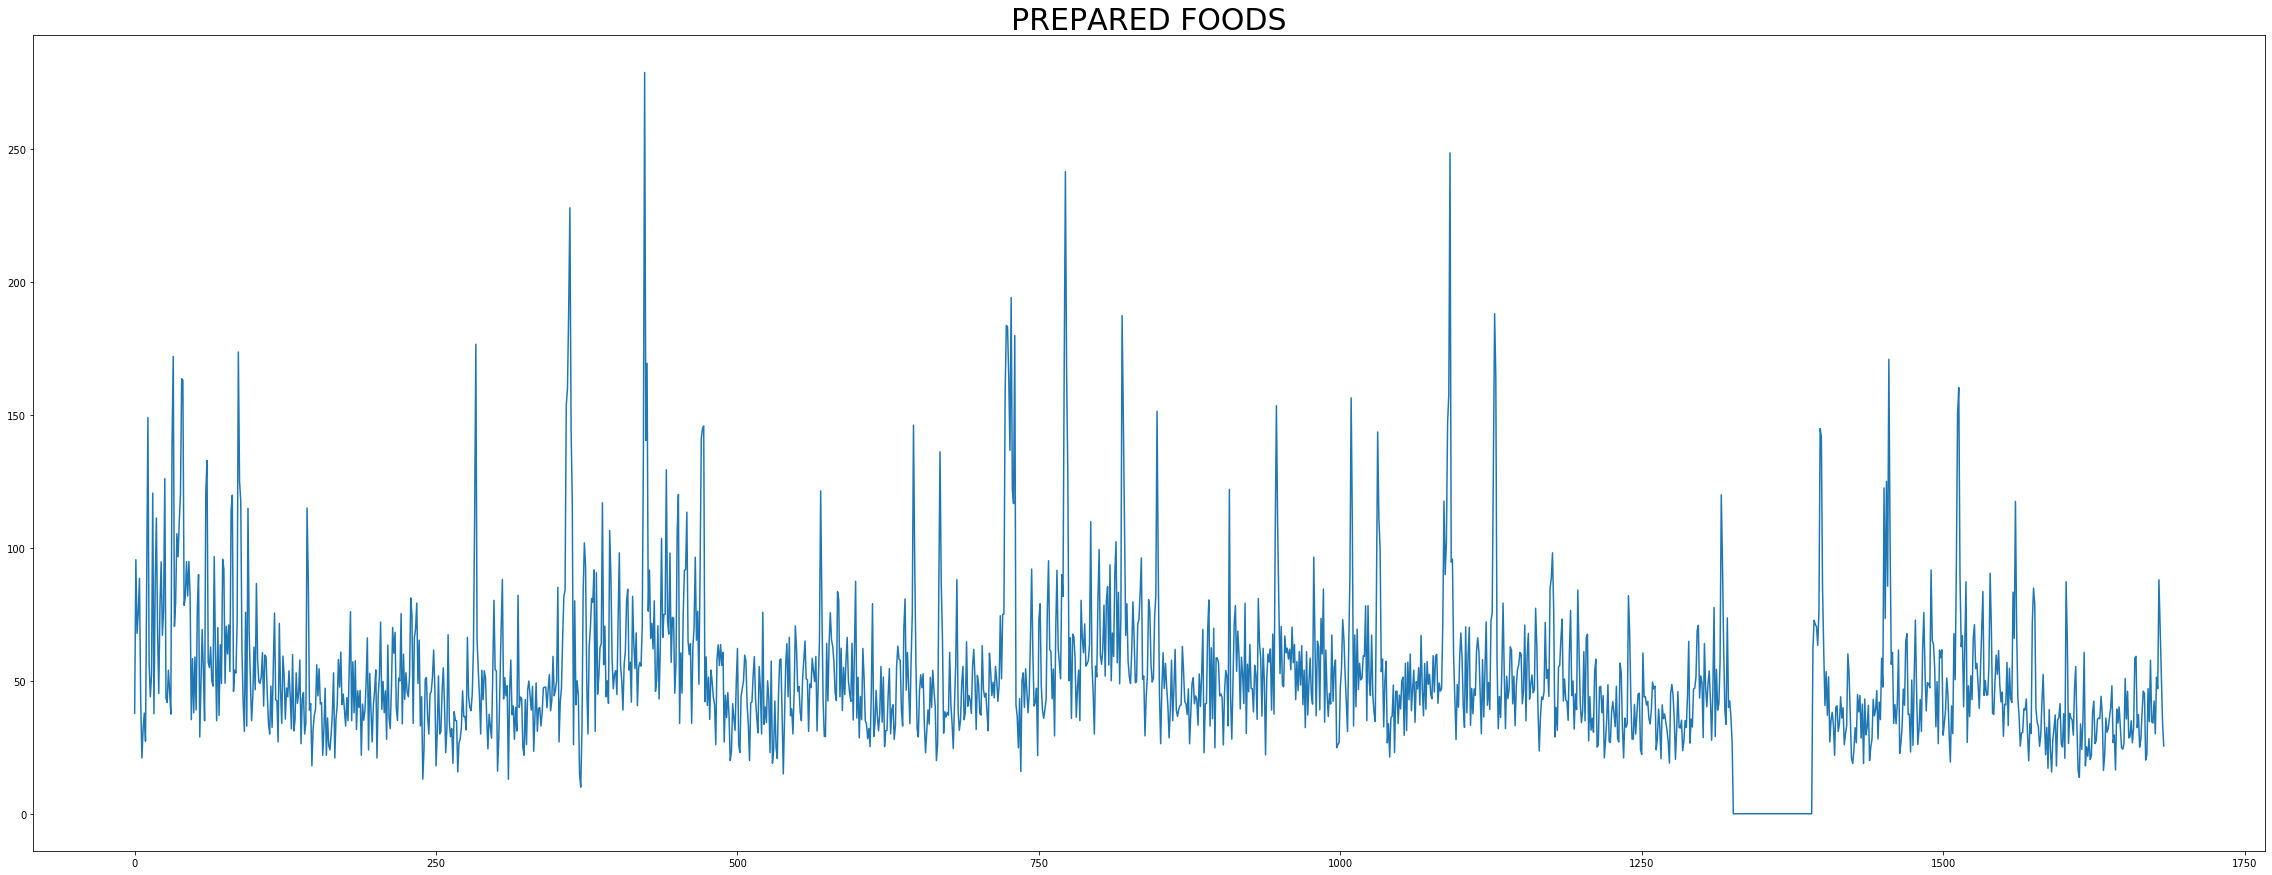

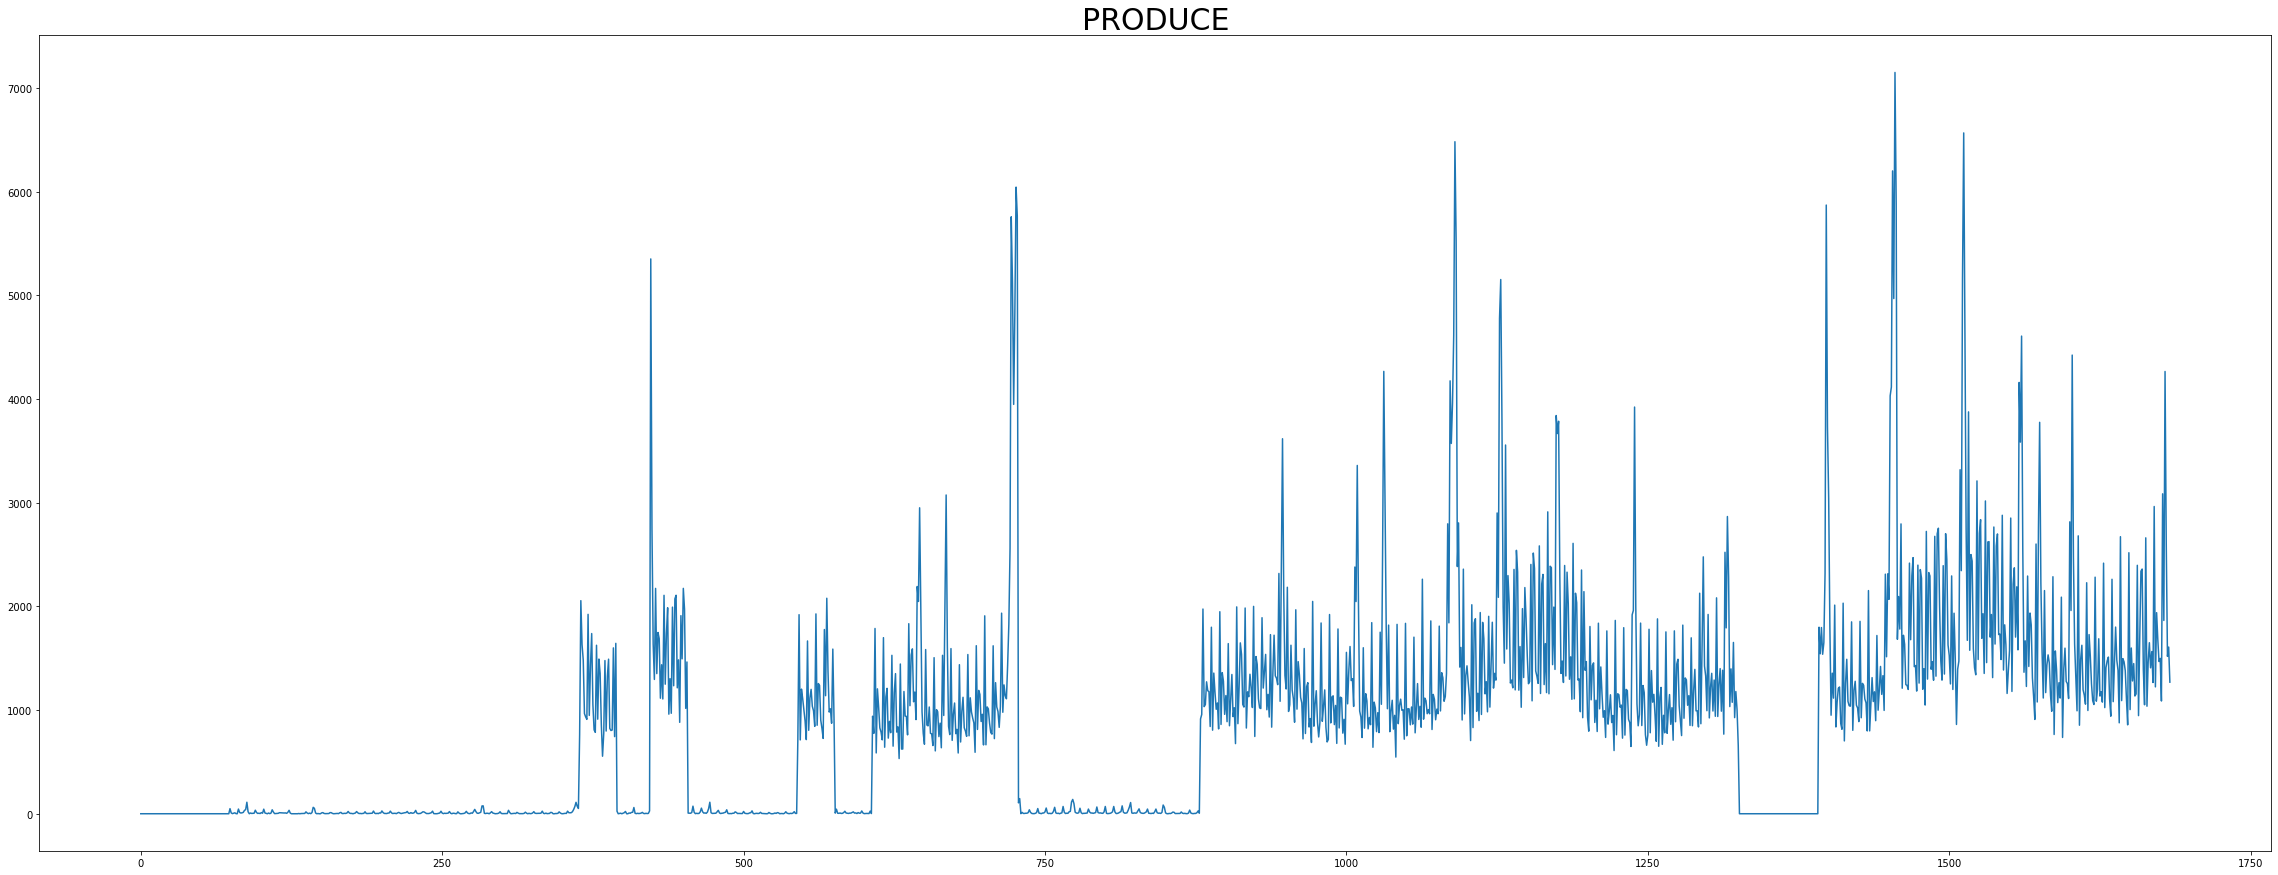

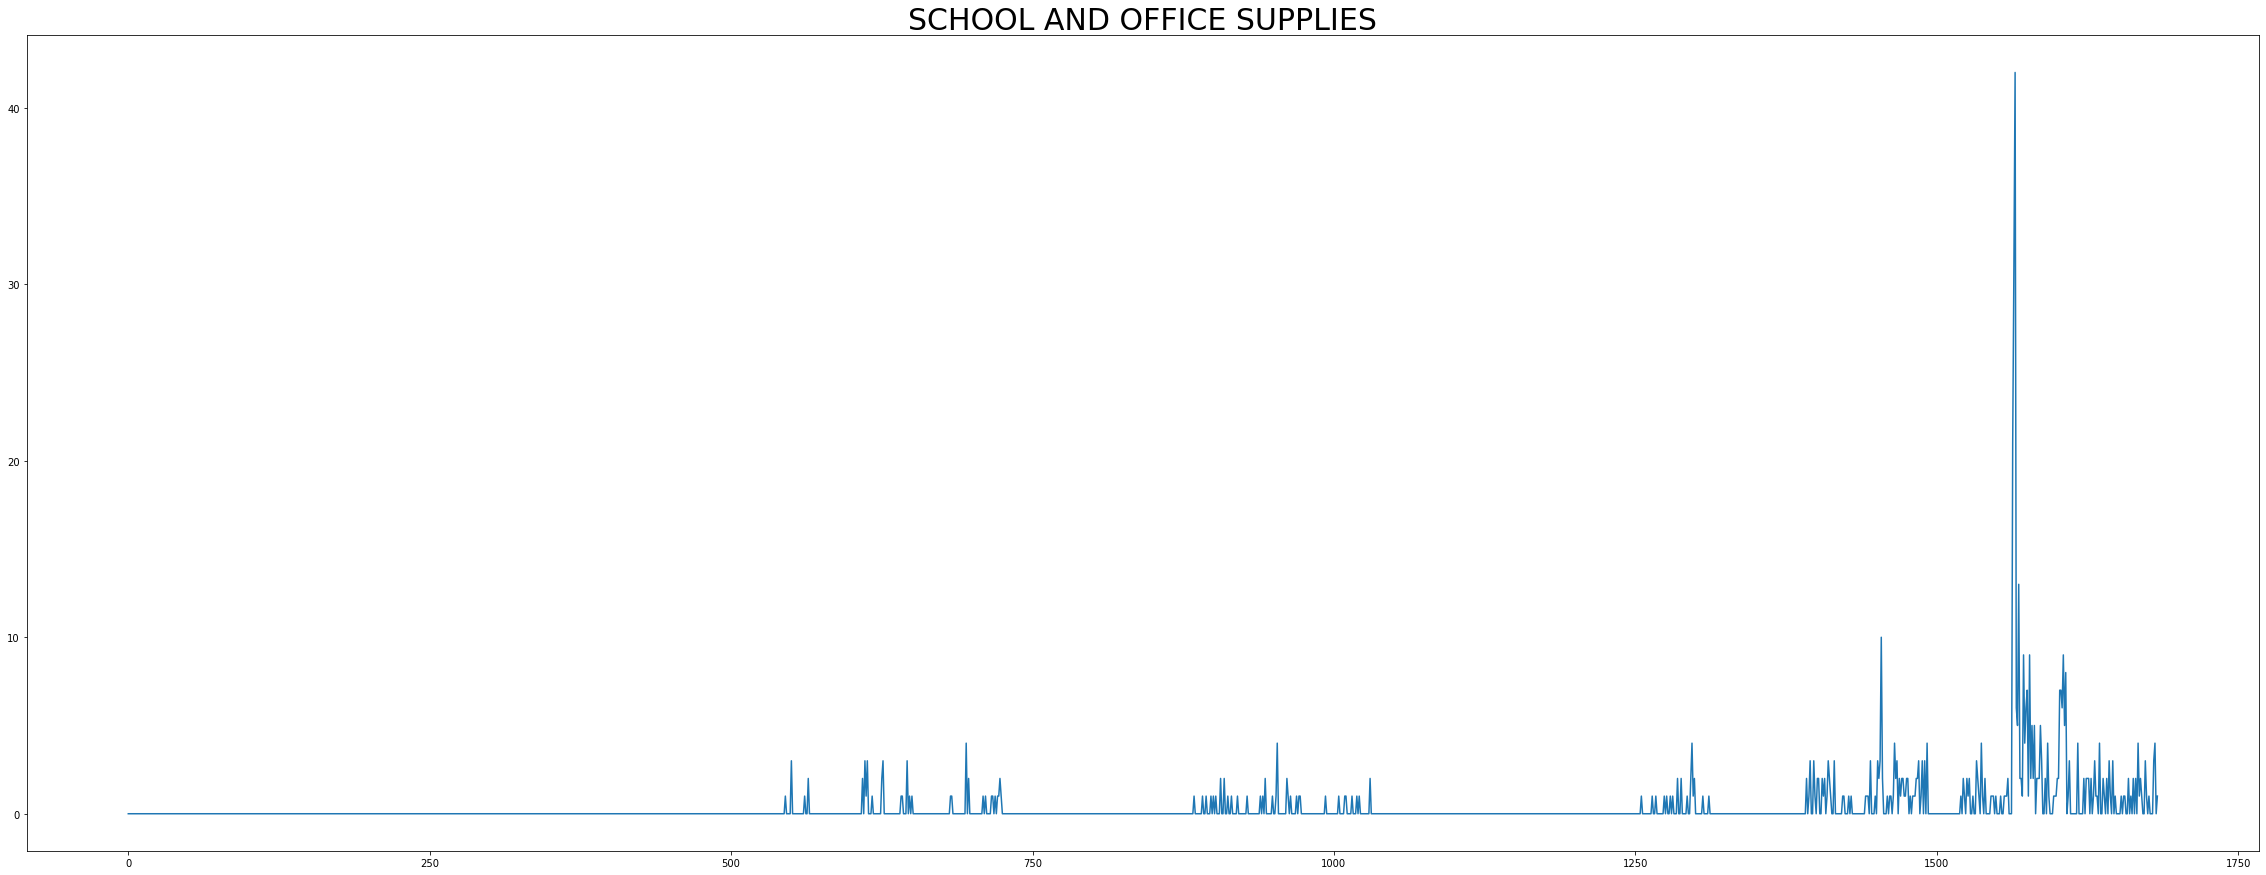

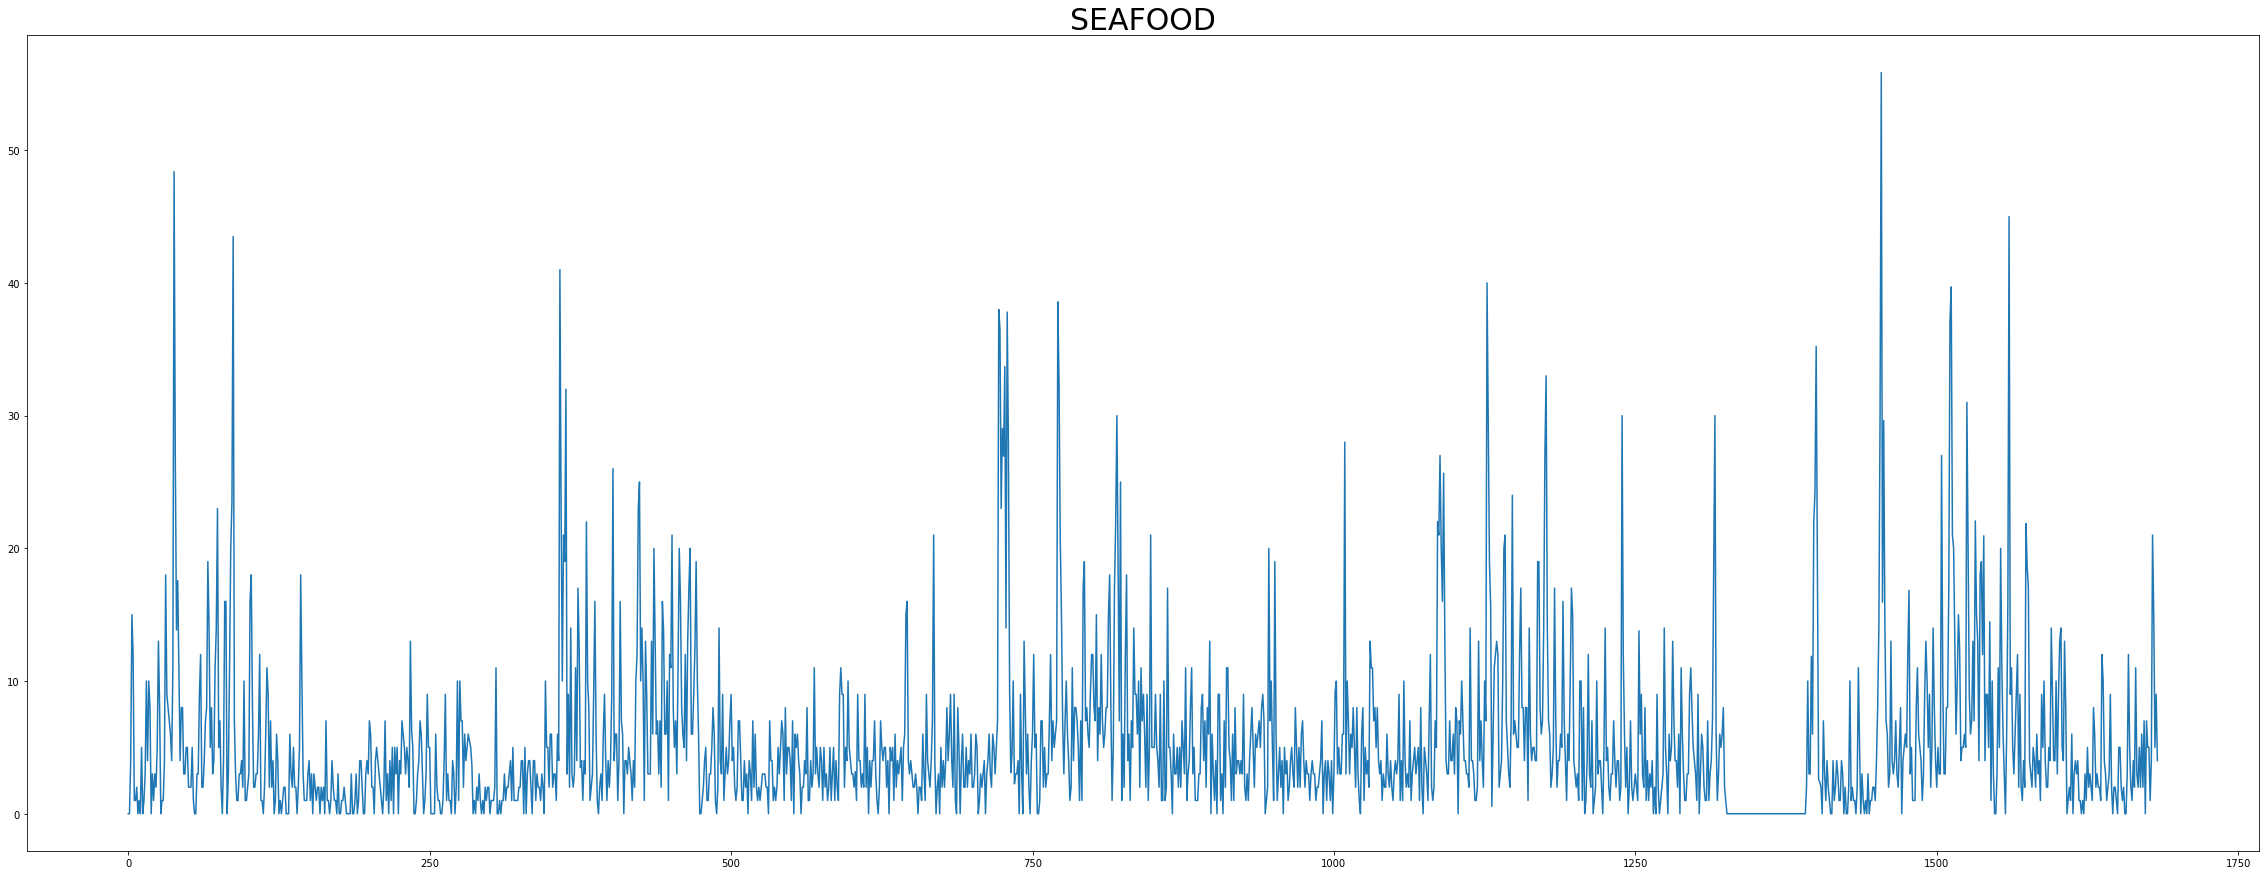

In [105]:
for i in all_category:
    plt.figure(figsize = (40,15))
    df = get_data(data = data, store_nos = [25], category = [i])
    plt.plot(df['time'], df['sales'])
    plt.title(i, fontsize = 30)
    plt.show()

In [115]:
list(df.columns)

['date', 'store_nbr', 'family', 'sales', 'year', 'month', 'day', 'time']

# MERGING DATAFRAMES

In [116]:
store.head()

store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4

In [117]:
holiday.head()

date     type    locale locale_name                    description  \
0  2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1  2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2  2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3  2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4  2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False

In [147]:
transactions.head(60)

date  store_nbr  transactions
0   2013-01-01         25           770
1   2013-01-02          1          2111
2   2013-01-02          2          2358
3   2013-01-02          3          3487
4   2013-01-02          4          1922
5   2013-01-02          5          1903
6   2013-01-02          6          2143
7   2013-01-02          7          1874
8   2013-01-02          8          3250
9   2013-01-02          9          2940
10  2013-01-02         10          1293
11  2013-01-02         11          3547
12  2013-01-02         12          1362
13  2013-01-02         13          1102
14  2013-01-02         14          2002
15  2013-01-02         15          1622
16  2013-01-02         16          1167
17  2013-01-02         17          1580
18  2013-01-02         18          1635
19  2013-01-02         19          1369
20  2013-01-02         23          1381
21  2013-01-02         24          2605
22  2013-01-02         25          1038
23  2013-01-02         26          1008
24  2013-01-02         27          1386
25  2013-01-02         28           950
26  2013-01-02         30           708
27  2013-01-02         31          1401
28  2013-01-02         32           776
29  2013-01-02         33          1163
30  2013-01-02         34          2724
31  2013-01-02         35           786
32  2013-01-02         37          1691
33  2013-01-02         38          1987
34  2013-01-02         39          1587
35  2013-01-02         40          1178
36  2013-01-02         41           915
37  2013-01-02         43          1385
38  2013-01-02         44          4821
39  2013-01-02         45          4208
40  2013-01-02         46          4886
41  2013-01-02         47          4161
42  2013-01-02         48          3397
43  2013-01-02         49          2346
44  2013-01-02         50          3077
45  2013-01-02         51          1985
46  2013-01-02         54           998
47  2013-01-03          1          1833
48  2013-01-03          2          2033
49  2013-01-03          3          3026
50  2013-01-03          4          1551
51  2013-01-03          5          1740
52  2013-01-03          6          1795
53  2013-01-03          7          1568
54  2013-01-03          8          2904
55  2013-01-03          9          2396
56  2013-01-03         10          1157
57  2013-01-03         11          2675
58  2013-01-03         12          1248
59  2013-01-03         13           916

In [63]:
oil.head(50)
oil = oil.dropna()
oil

date  dcoilwtico
1     2013-01-02       93.14
2     2013-01-03       92.97
3     2013-01-04       93.12
4     2013-01-07       93.20
5     2013-01-08       93.21
...          ...         ...
1213  2017-08-25       47.65
1214  2017-08-28       46.40
1215  2017-08-29       46.46
1216  2017-08-30       45.96
1217  2017-08-31       47.26

[1175 rows x 2 columns]

In [37]:
# FUNCTION TO MAKE DICTIONARIES
def make_dict(keys, values):
    dicts = {}
    for key,value in zip(keys, values):
        dicts[key] = value
    return(dicts)

In [152]:
# MERGED DATA - HOLIDAY & OIL PRICE
store_dict = make_dict(store['store_nbr'], store['city'])
cluster_dict = make_dict(store['store_nbr'], store['cluster'])
holiday_type_dict = make_dict(holiday['date'], holiday['type'])
holiday_locale_dict = make_dict(holiday['date'], holiday['locale'])
holiday_locale_name_dict = make_dict(holiday['date'], holiday['locale_name'])
oil_price_dict = make_dict(oil['date'], oil['dcoilwtico'])
trans_dict = transactions.set_index(['store_nbr', 'date'])['transactions'].to_dict()


data['city'] = data['store_nbr'].map(store_dict)
data['cluster'] = data['store_nbr'].map(cluster_dict)
data['type'] = data['date'].map(holiday_type_dict)
data['locale'] = data['date'].map(holiday_locale_dict)
data['locale_name'] = data['date'].map(holiday_locale_name_dict)
data['oil_price'] = data['date'].map(oil_price_dict)
data['transactions'] = data.apply(lambda row: trans_dict.get((row['store_nbr'], row['date']), None), axis=1)


data

id        date  store_nbr                      family     sales  \
0              0  2013-01-01          1                  AUTOMOTIVE     0.000   
1              1  2013-01-01          1                   BABY CARE     0.000   
2              2  2013-01-01          1                      BEAUTY     0.000   
3              3  2013-01-01          1                   BEVERAGES     0.000   
4              4  2013-01-01          1                       BOOKS     0.000   
...          ...         ...        ...                         ...       ...   
3000883  3000883  2017-08-15          9                     POULTRY   438.133   
3000884  3000884  2017-08-15          9              PREPARED FOODS   154.553   
3000885  3000885  2017-08-15          9                     PRODUCE  2419.729   
3000886  3000886  2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   121.000   
3000887  3000887  2017-08-15          9                     SEAFOOD    16.000   

         onpromotion  transactions   city  cluster     type    locale  \
0                  0           NaN  Quito       13  Holiday  National   
1                  0           NaN  Quito       13  Holiday  National   
2                  0           NaN  Quito       13  Holiday  National   
3                  0           NaN  Quito       13  Holiday  National   
4                  0           NaN  Quito       13  Holiday  National   
...              ...           ...    ...      ...      ...       ...   
3000883            0        2155.0  Quito        6  Holiday     Local   
3000884            1        2155.0  Quito        6  Holiday     Local   
3000885          148        2155.0  Quito        6  Holiday     Local   
3000886            8        2155.0  Quito        6  Holiday     Local   
3000887            0        2155.0  Quito        6  Holiday     Local   

        locale_name  oil_price  
0           Ecuador        NaN  
1           Ecuador        NaN  
2           Ecuador        NaN  
3           Ecuador        NaN  
4           Ecuador        NaN  
...             ...        ...  
3000883    Riobamba      47.57  
3000884    Riobamba      47.57  
3000885    Riobamba      47.57  
3000886    Riobamba      47.57  
3000887    Riobamba      47.57  

[3000888 rows x 13 columns]

In [153]:
holiday = [0] * len(data)
for i in range(data.shape[0]):
    if (data['locale_name'][i] == 'Ecuador') or (data['city'][i] == data['locale_name'][i]):
        holiday[i] = 1
    else:
        holiday[i] = 0
holiday

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [154]:
data['holiday_flag'] = holiday

In [155]:
data.isna().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
transactions     245784
city                  0
cluster               0
type            2551824
locale          2551824
locale_name     2551824
oil_price        928422
holiday_flag          0
dtype: int64

In [156]:
data.head()

id        date  store_nbr      family  sales  onpromotion  transactions  \
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0           NaN   
1   1  2013-01-01          1   BABY CARE    0.0            0           NaN   
2   2  2013-01-01          1      BEAUTY    0.0            0           NaN   
3   3  2013-01-01          1   BEVERAGES    0.0            0           NaN   
4   4  2013-01-01          1       BOOKS    0.0            0           NaN   

    city  cluster     type    locale locale_name  oil_price  holiday_flag  
0  Quito       13  Holiday  National     Ecuador        NaN             1  
1  Quito       13  Holiday  National     Ecuador        NaN             1  
2  Quito       13  Holiday  National     Ecuador        NaN             1  
3  Quito       13  Holiday  National     Ecuador        NaN             1  
4  Quito       13  Holiday  National     Ecuador        NaN             1

In [157]:
data.to_csv("C:\\Users\\ASUS\\Desktop\\merged_ts_data.csv", index = False)

In [95]:
data['holiday_flag'].value_counts()

0    2739957
1     260931
Name: holiday_flag, dtype: int64

In [167]:
sum(holiday['locale_name'].isin(['Ecuador', 'Salinas']))

180

In [171]:
holiday
holiday['date'] = pd.to_datetime(holiday['date'])
holiday_df = holiday[(holiday['date'].isin(d['date'].unique())) & (holiday['locale_name'].isin(['Ecuador', 'Salinas']))]

In [178]:
result_df = d.merge(holiday_df[['date','type','locale','locale_name']], on='date', how = 'outer')
result_df['type'].fillna('non-holiday', inplace=True)
result_df['locale'].fillna('N/A', inplace=True)

In [176]:
result_df = d.merge(holiday_df[['date', 'type', 'locale']].reset_index(drop=True), on = 'date', how = 'left')

In [154]:
result_df['date'].nunique()

1684

In [158]:
len(holiday_df['date'])
holiday_df['date'].unique()

array(['2013-01-01T00:00:00.000000000', '2013-01-05T00:00:00.000000000',
       '2013-01-12T00:00:00.000000000', '2013-02-11T00:00:00.000000000',
       '2013-02-12T00:00:00.000000000', '2013-03-02T00:00:00.000000000',
       '2013-04-01T00:00:00.000000000', '2013-04-12T00:00:00.000000000',
       '2013-04-14T00:00:00.000000000', '2013-04-21T00:00:00.000000000',
       '2013-04-29T00:00:00.000000000', '2013-05-01T00:00:00.000000000',
       '2013-05-11T00:00:00.000000000', '2013-05-12T00:00:00.000000000',
       '2013-05-24T00:00:00.000000000', '2013-06-23T00:00:00.000000000',
       '2013-06-25T00:00:00.000000000', '2013-07-03T00:00:00.000000000',
       '2013-07-23T00:00:00.000000000', '2013-07-24T00:00:00.000000000',
       '2013-07-25T00:00:00.000000000', '2013-08-05T00:00:00.000000000',
       '2013-08-10T00:00:00.000000000', '2013-08-15T00:00:00.000000000',
       '2013-08-24T00:00:00.000000000', '2013-09-28T00:00:00.000000000',
       '2013-10-07T00:00:00.000000000', '2013-10-09

In [142]:
result_df

date  store_nbr   family  sales  year  month  day  time  \
0    2013-01-01         25  SEAFOOD    0.0  2013      1    1     0   
1    2013-01-02         25  SEAFOOD    0.0  2013      1    2     1   
2    2013-01-03         25  SEAFOOD    4.0  2013      1    3     2   
3    2013-01-04         25  SEAFOOD   15.0  2013      1    4     3   
4    2013-01-05         25  SEAFOOD   12.0  2013      1    5     4   
...         ...        ...      ...    ...   ...    ...  ...   ...   
1709 2017-08-11         25  SEAFOOD   21.0  2017      8   11  1679   
1710 2017-08-12         25  SEAFOOD   15.0  2017      8   12  1680   
1711 2017-08-13         25  SEAFOOD    5.0  2017      8   13  1681   
1712 2017-08-14         25  SEAFOOD    9.0  2017      8   14  1682   
1713 2017-08-15         25  SEAFOOD    4.0  2017      8   15  1683   

             type    locale  
0         Holiday  National  
1     non-holiday       N/A  
2     non-holiday       N/A  
3     non-holiday       N/A  
4        Work Day  National  
...           ...       ...  
1709     Transfer  National  
1710  non-holiday       N/A  
1711  non-holiday       N/A  
1712  non-holiday       N/A  
1713      Holiday     Local  

[1714 rows x 10 columns]

In [132]:
d

date  store_nbr   family  sales  year  month  day  time
0    2013-01-01         25  SEAFOOD    0.0  2013      1    1     0
1    2013-01-02         25  SEAFOOD    0.0  2013      1    2     1
2    2013-01-03         25  SEAFOOD    4.0  2013      1    3     2
3    2013-01-04         25  SEAFOOD   15.0  2013      1    4     3
4    2013-01-05         25  SEAFOOD   12.0  2013      1    5     4
...         ...        ...      ...    ...   ...    ...  ...   ...
1679 2017-08-11         25  SEAFOOD   21.0  2017      8   11  1679
1680 2017-08-12         25  SEAFOOD   15.0  2017      8   12  1680
1681 2017-08-13         25  SEAFOOD    5.0  2017      8   13  1681
1682 2017-08-14         25  SEAFOOD    9.0  2017      8   14  1682
1683 2017-08-15         25  SEAFOOD    4.0  2017      8   15  1683

[1684 rows x 8 columns]

In [133]:
len(result_df) == len(d)

False

In [96]:
data.head()

id        date  store_nbr      family  sales  onpromotion   city  cluster  \
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0  Quito       13   
1   1  2013-01-01          1   BABY CARE    0.0            0  Quito       13   
2   2  2013-01-01          1      BEAUTY    0.0            0  Quito       13   
3   3  2013-01-01          1   BEVERAGES    0.0            0  Quito       13   
4   4  2013-01-01          1       BOOKS    0.0            0  Quito       13   

     locale     type locale_name  oil_price  holiday_flag  
0  National  Holiday     Ecuador        NaN             1  
1  National  Holiday     Ecuador        NaN             1  
2  National  Holiday     Ecuador        NaN             1  
3  National  Holiday     Ecuador        NaN             1  
4  National  Holiday     Ecuador        NaN             1